In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
# Importing basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
%matplotlib inline

In [ ]:
data = pd.read_excel('drive/MyDrive/Great_Learning/Capstone/CCD.xlsx', sheet_name = 'Data for DSBA')

In [ ]:
data.head()

AccountID  Churn Tenure  ...  Day_Since_CC_connect  cashback Login_device
0      20000      1      4  ...                     5    159.93       Mobile
1      20001      1      0  ...                     0     120.9       Mobile
2      20002      1      0  ...                     3       NaN       Mobile
3      20003      1      0  ...                     3    134.07       Mobile
4      20004      1      0  ...                     3     129.6       Mobile

[5 rows x 19 columns]

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AccountID                11260 non-null  int64  
 1   Churn                    11260 non-null  int64  
 2   Tenure                   11158 non-null  object 
 3   City_Tier                11148 non-null  float64
 4   CC_Contacted_LY          11158 non-null  float64
 5   Payment                  11151 non-null  object 
 6   Gender                   11152 non-null  object 
 7   Service_Score            11162 non-null  float64
 8   Account_user_count       11148 non-null  object 
 9   account_segment          11163 non-null  object 
 10  CC_Agent_Score           11144 non-null  float64
 11  Marital_Status           11048 non-null  object 
 12  rev_per_month            11158 non-null  object 
 13  Complain_ly              10903 non-null  float64
 14  rev_growth_yoy        

In [ ]:
data.isnull().sum()

AccountID                    0
Churn                        0
Tenure                     102
City_Tier                  112
CC_Contacted_LY            102
Payment                    109
Gender                     108
Service_Score               98
Account_user_count         112
account_segment             97
CC_Agent_Score             116
Marital_Status             212
rev_per_month              102
Complain_ly                357
rev_growth_yoy               0
coupon_used_for_payment      0
Day_Since_CC_connect       357
cashback                   471
Login_device               221
dtype: int64

In [ ]:
data.shape

(11260, 19)

In [ ]:
char = list(string.punctuation)
var_list = list(data.columns)
for i in var_list:
    data[i]=data[i].apply(lambda x: np.nan if x in char else x)

In [ ]:
data['Churn'] = data['Churn'].map({1:'Yes',0:'No'})
data['City_Tier'] = data['City_Tier'].map({1:'Tier-1',2:'Tier-2',3:'Tier-3'})
data['Complain_ly'] = data['Complain_ly'].map({1:'Yes',0:'No'})

In [ ]:
data.head()

AccountID Churn  Tenure  ... Day_Since_CC_connect  cashback Login_device
0      20000   Yes     4.0  ...                  5.0    159.93       Mobile
1      20001   Yes     0.0  ...                  0.0    120.90       Mobile
2      20002   Yes     0.0  ...                  3.0       NaN       Mobile
3      20003   Yes     0.0  ...                  3.0    134.07       Mobile
4      20004   Yes     0.0  ...                  3.0    129.60       Mobile

[5 rows x 19 columns]

In [ ]:
cat = list(data.dtypes[data.dtypes == 'object'].index)
num = list(data.dtypes[data.dtypes != 'object'].index)

In [ ]:
for i in cat:
    print('Unique Categories in {}'.format(i.upper()))
    print(data[i].unique())
    print()

Unique Categories in CHURN
['Yes' 'No']

Unique Categories in CITY_TIER
['Tier-3' 'Tier-1' nan 'Tier-2']

Unique Categories in PAYMENT
['Debit Card' 'UPI' 'Credit Card' 'Cash on Delivery' 'E wallet' nan]

Unique Categories in GENDER
['Female' 'Male' 'F' nan 'M']

Unique Categories in ACCOUNT_SEGMENT
['Super' 'Regular Plus' 'Regular' 'HNI' 'Regular +' nan 'Super Plus'
 'Super +']

Unique Categories in MARITAL_STATUS
['Single' 'Divorced' 'Married' nan]

Unique Categories in COMPLAIN_LY
['Yes' 'No' nan]

Unique Categories in LOGIN_DEVICE
['Mobile' 'Computer' '&&&&' nan]



In [ ]:
data['Gender'] = np.where(data['Gender'] == 'M','Male',data['Gender'])
data['Gender'] = np.where(data['Gender'] == 'F','Female',data['Gender'])
data['account_segment'] = np.where(data['account_segment'] == 'Regular +','Regular Plus',data['account_segment'])
data['account_segment'] = np.where(data['account_segment'] == 'Super +','Super Plus',data['account_segment'])
data['Login_device'] = np.where(data['Login_device'] == '&&&&',np.nan,data['Login_device'])

In [ ]:
data.isnull().sum()

AccountID                    0
Churn                        0
Tenure                     218
City_Tier                  112
CC_Contacted_LY            102
Payment                    109
Gender                     108
Service_Score               98
Account_user_count         444
account_segment             97
CC_Agent_Score             116
Marital_Status             212
rev_per_month              791
Complain_ly                357
rev_growth_yoy               3
coupon_used_for_payment      3
Day_Since_CC_connect       358
cashback                   473
Login_device               760
dtype: int64

In [ ]:
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
imputer_num = KNNImputer(n_neighbors=3)
data_num = pd.DataFrame(imputer_num.fit_transform(data[num]),columns = data[num].columns)
imputer_cat = SimpleImputer(strategy = 'most_frequent')
data_cat = pd.DataFrame(imputer_cat.fit_transform(data[cat]),columns = data[cat].columns)
data2 = data_num.join(data_cat)
data2.head()

AccountID  Tenure  CC_Contacted_LY  ...  Marital_Status  Complain_ly  Login_device
0    20000.0     4.0              6.0  ...          Single          Yes        Mobile
1    20001.0     0.0              8.0  ...          Single          Yes        Mobile
2    20002.0     0.0             30.0  ...          Single          Yes        Mobile
3    20003.0     0.0             15.0  ...          Single           No        Mobile
4    20004.0     0.0             12.0  ...          Single           No        Mobile

[5 rows x 19 columns]

In [ ]:
data2.isnull().sum()

AccountID                  0
Tenure                     0
CC_Contacted_LY            0
Service_Score              0
Account_user_count         0
CC_Agent_Score             0
rev_per_month              0
rev_growth_yoy             0
coupon_used_for_payment    0
Day_Since_CC_connect       0
cashback                   0
Churn                      0
City_Tier                  0
Payment                    0
Gender                     0
account_segment            0
Marital_Status             0
Complain_ly                0
Login_device               0
dtype: int64

In [ ]:
data2.duplicated().sum()

0

In [ ]:
num.remove('cashback')
for i in num:
    data2[i] = np.round(data2[i],0)
data2['Service_Score'] = np.where(data2['Service_Score'] == 0,1,data2['Service_Score'])

In [ ]:
data2.head()

AccountID  Tenure  CC_Contacted_LY  ...  Marital_Status  Complain_ly  Login_device
0    20000.0     4.0              6.0  ...          Single          Yes        Mobile
1    20001.0     0.0              8.0  ...          Single          Yes        Mobile
2    20002.0     0.0             30.0  ...          Single          Yes        Mobile
3    20003.0     0.0             15.0  ...          Single           No        Mobile
4    20004.0     0.0             12.0  ...          Single           No        Mobile

[5 rows x 19 columns]

In [ ]:
data2.to_excel('drive/MyDrive/Great_Learning/Capstone/ReData.xlsx')

In [ ]:
#Dropping AccountID variable
data2.drop('AccountID',axis=1,inplace=True)
#Separating the Categorical and Numerical variables
cat = list(data2.dtypes[data.dtypes == 'object'].index)
num = list(data2.dtypes[data.dtypes != 'object'].index)

In [ ]:
data2.describe(include='all')

Tenure  CC_Contacted_LY  ...  Complain_ly  Login_device
count   11260.000000     11260.000000  ...        11260         11260
unique           NaN              NaN  ...            2             2
top              NaN              NaN  ...           No        Mobile
freq             NaN              NaN  ...         8149          8242
mean       11.015187        17.860213  ...          NaN           NaN
std        12.815381         8.826459  ...          NaN           NaN
min         0.000000         4.000000  ...          NaN           NaN
25%         2.000000        11.000000  ...          NaN           NaN
50%         9.000000        16.000000  ...          NaN           NaN
75%        16.000000        23.000000  ...          NaN           NaN
max        99.000000       132.000000  ...          NaN           NaN

[11 rows x 18 columns]

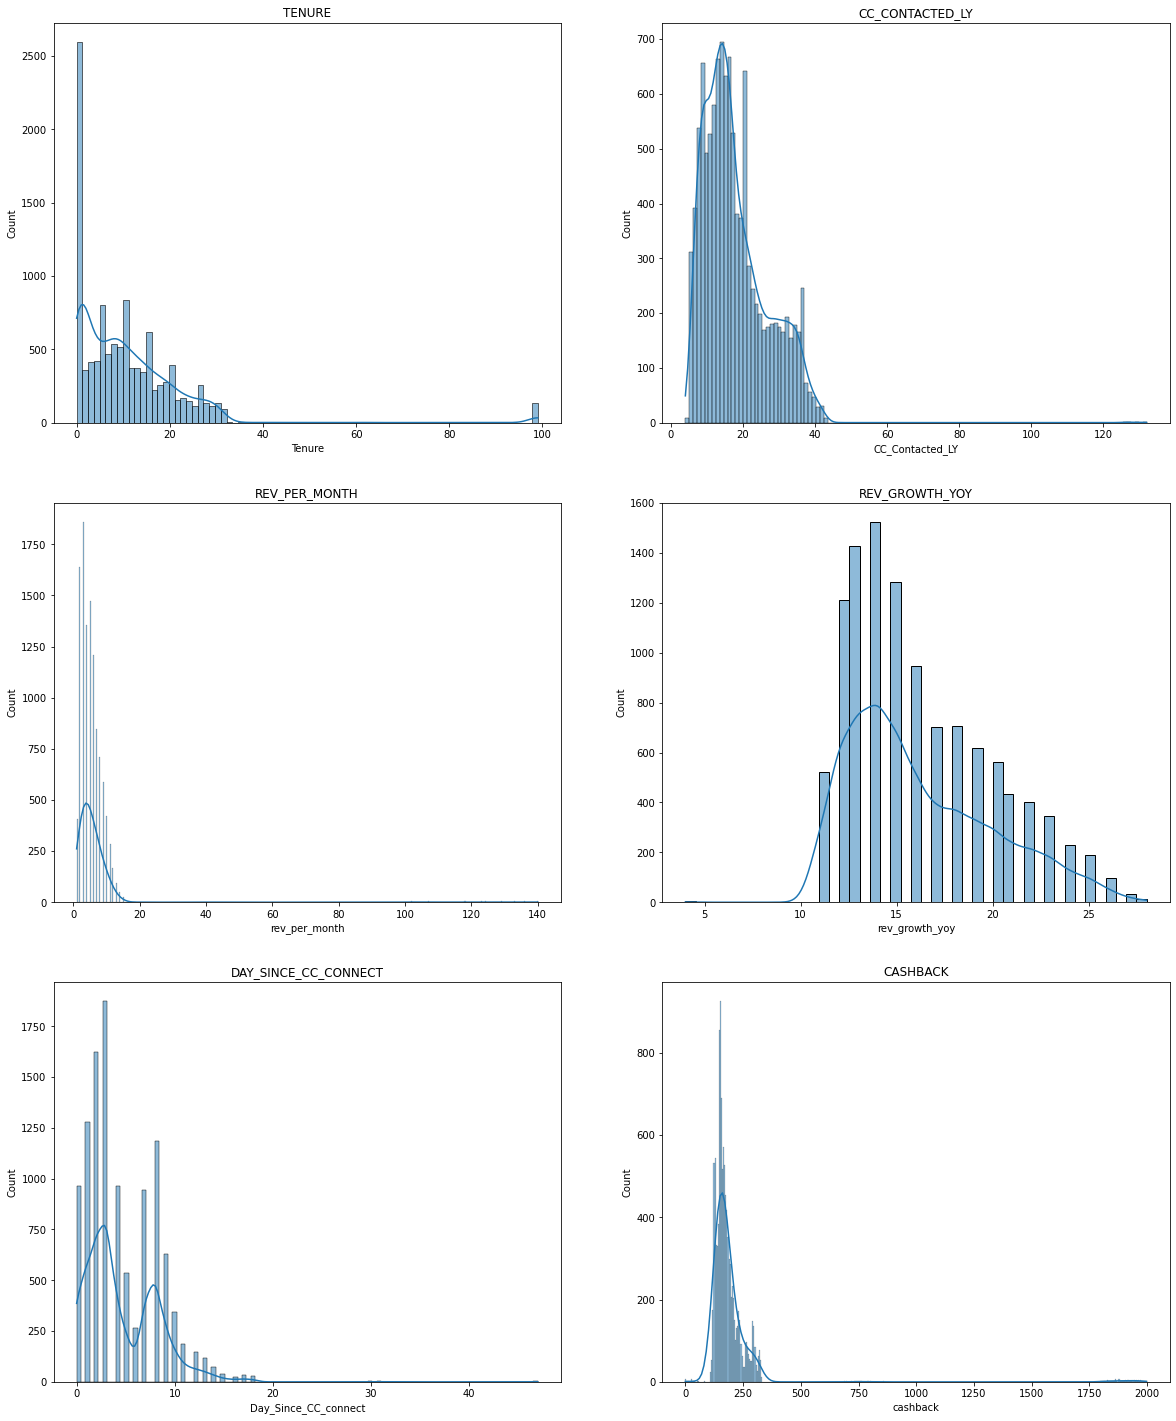

In [ ]:
#Univariate analysis of the numerical variable - histograms
col_list = ['Tenure','CC_Contacted_LY','rev_per_month','rev_growth_yoy','Day_Since_CC_connect','cashback']
fig,axes = plt.subplots(3,2,figsize=(20,25))
#plt.subplots_adjust(hspace=0.3,wspace=0.2)
for i,j in zip(col_list,axes.flatten()):
    sns.histplot(x=i,data = data2,ax=j,kde=True)
    j.set_title(i.upper())

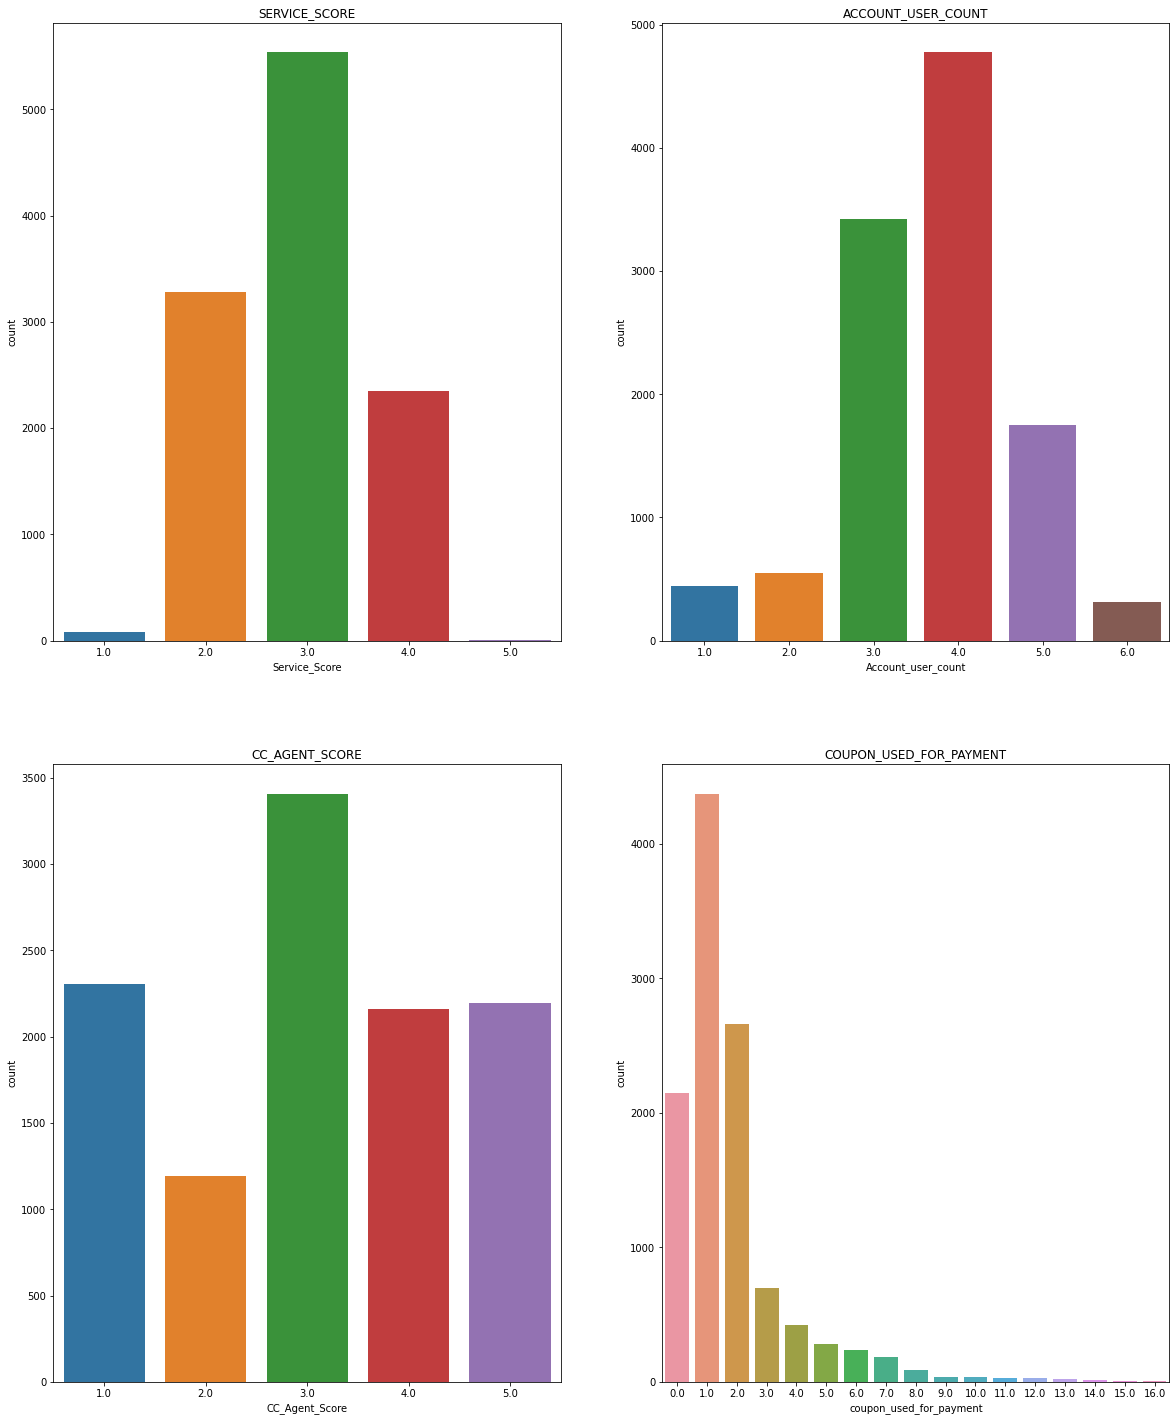

In [ ]:
#Univariate analysis of the numerical variable - Countplots
col_list2 = ['Service_Score','Account_user_count','CC_Agent_Score','coupon_used_for_payment']
fig,axes = plt.subplots(2,2,figsize=(20,25))
#plt.subplots_adjust(hspace=0.3,wspace=0.2)
for i,j in zip(col_list2,axes.flatten()):
    sns.countplot(x=i,data = data2,ax=j)
    j.set_title(i.upper())

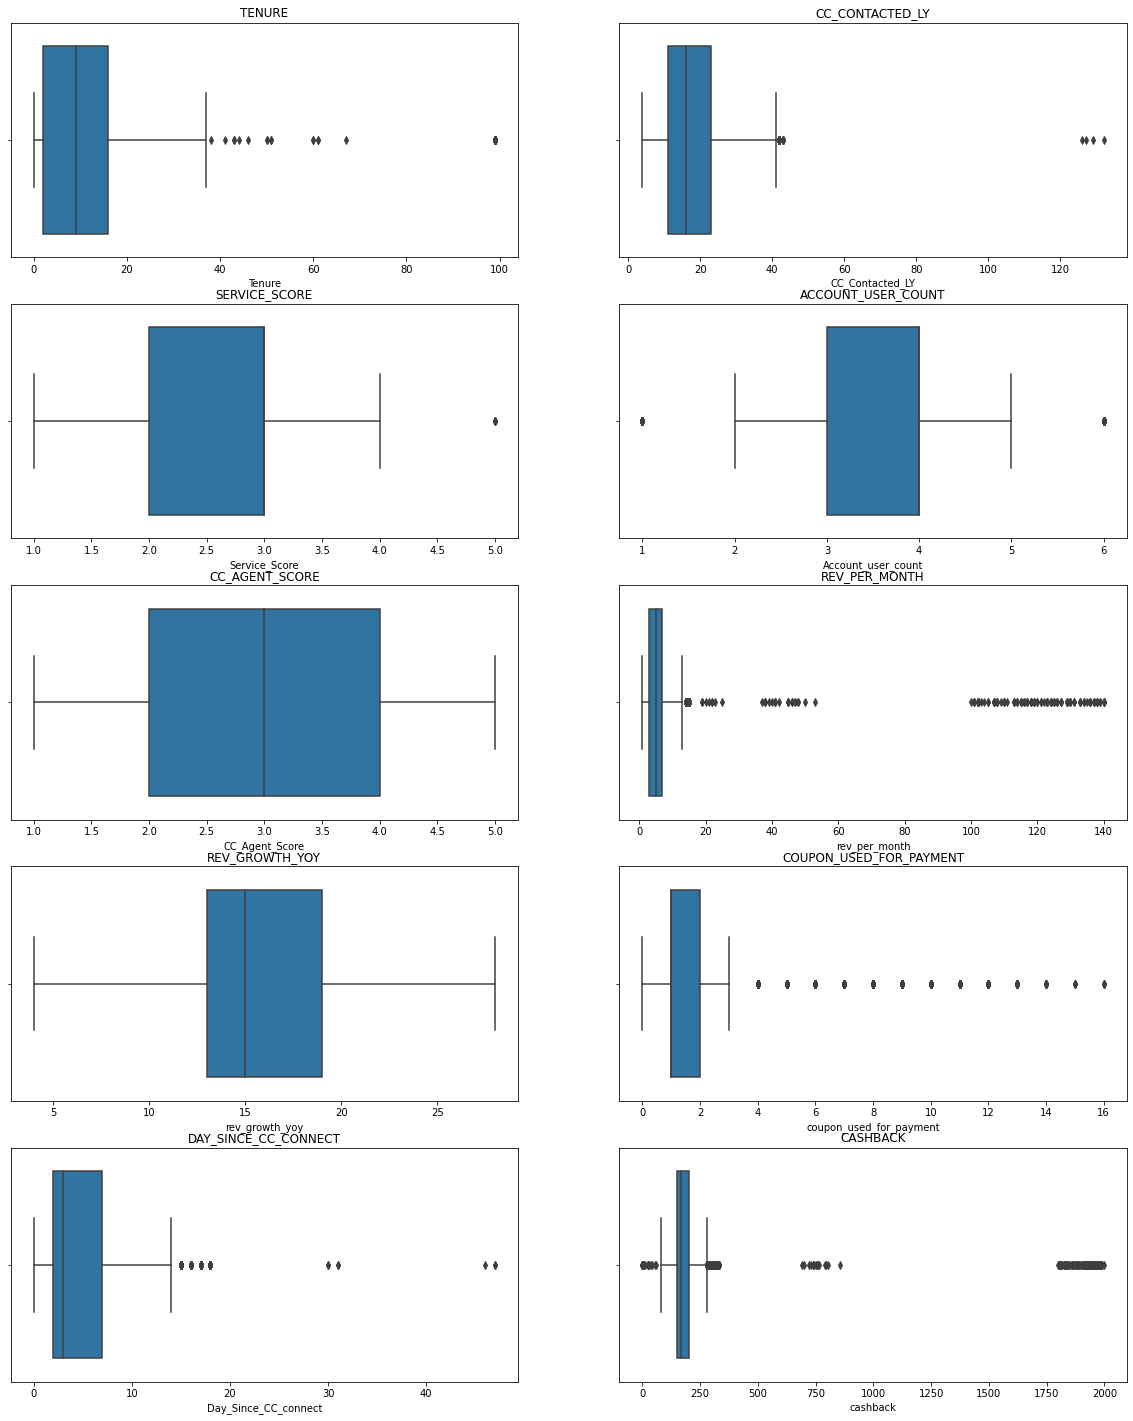

In [ ]:
#Univariate analysis of the numerical variable - Boxplots
fig,axes = plt.subplots(5,2,figsize=(20,25))
#plt.subplots_adjust(hspace=0.3,wspace=0.2)
for i,j in zip(num,axes.flatten()):
    sns.boxplot(x=i,data = data2,ax=j)
    j.set_title(i.upper())

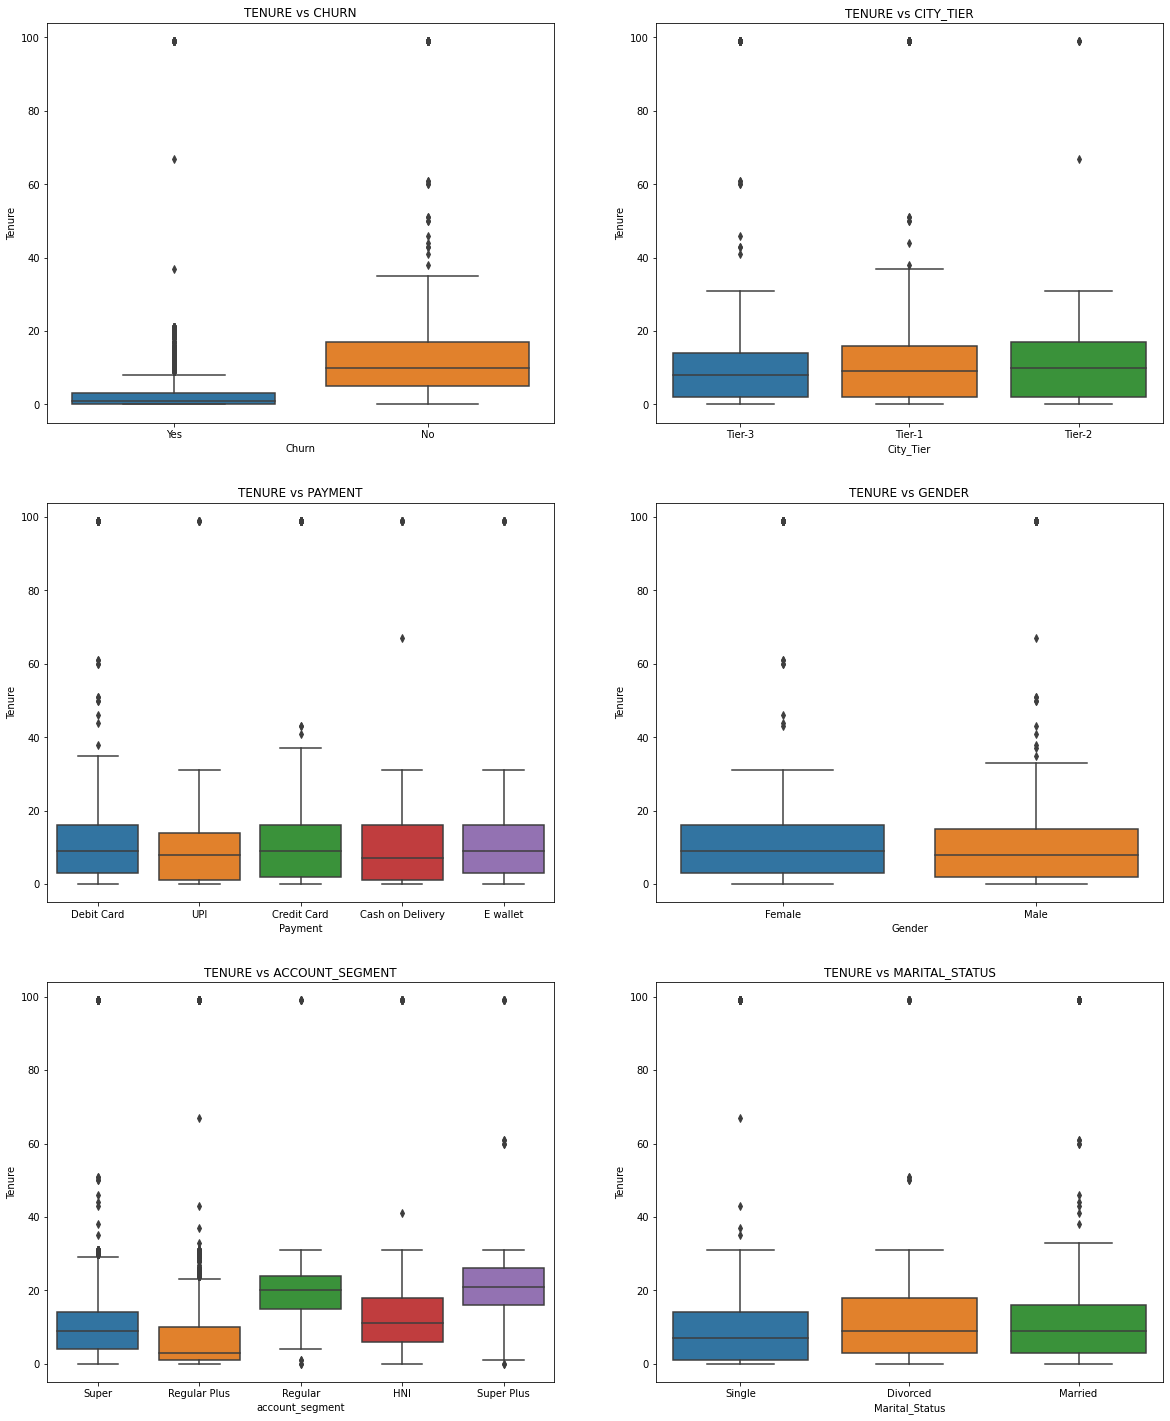

In [ ]:
# Tenure with all the categorical variables - boxplot
fig,axes = plt.subplots(3,2,figsize = (20,25))
#plt.subplots_adjust(wspace=0.2,hspace=0.3)
for i,j in zip(cat,axes.flatten()):
    sns.boxplot(y='Tenure',x = i,data=data2,ax=j)
    j.set_title('TENURE vs {}'.format(i.upper()))

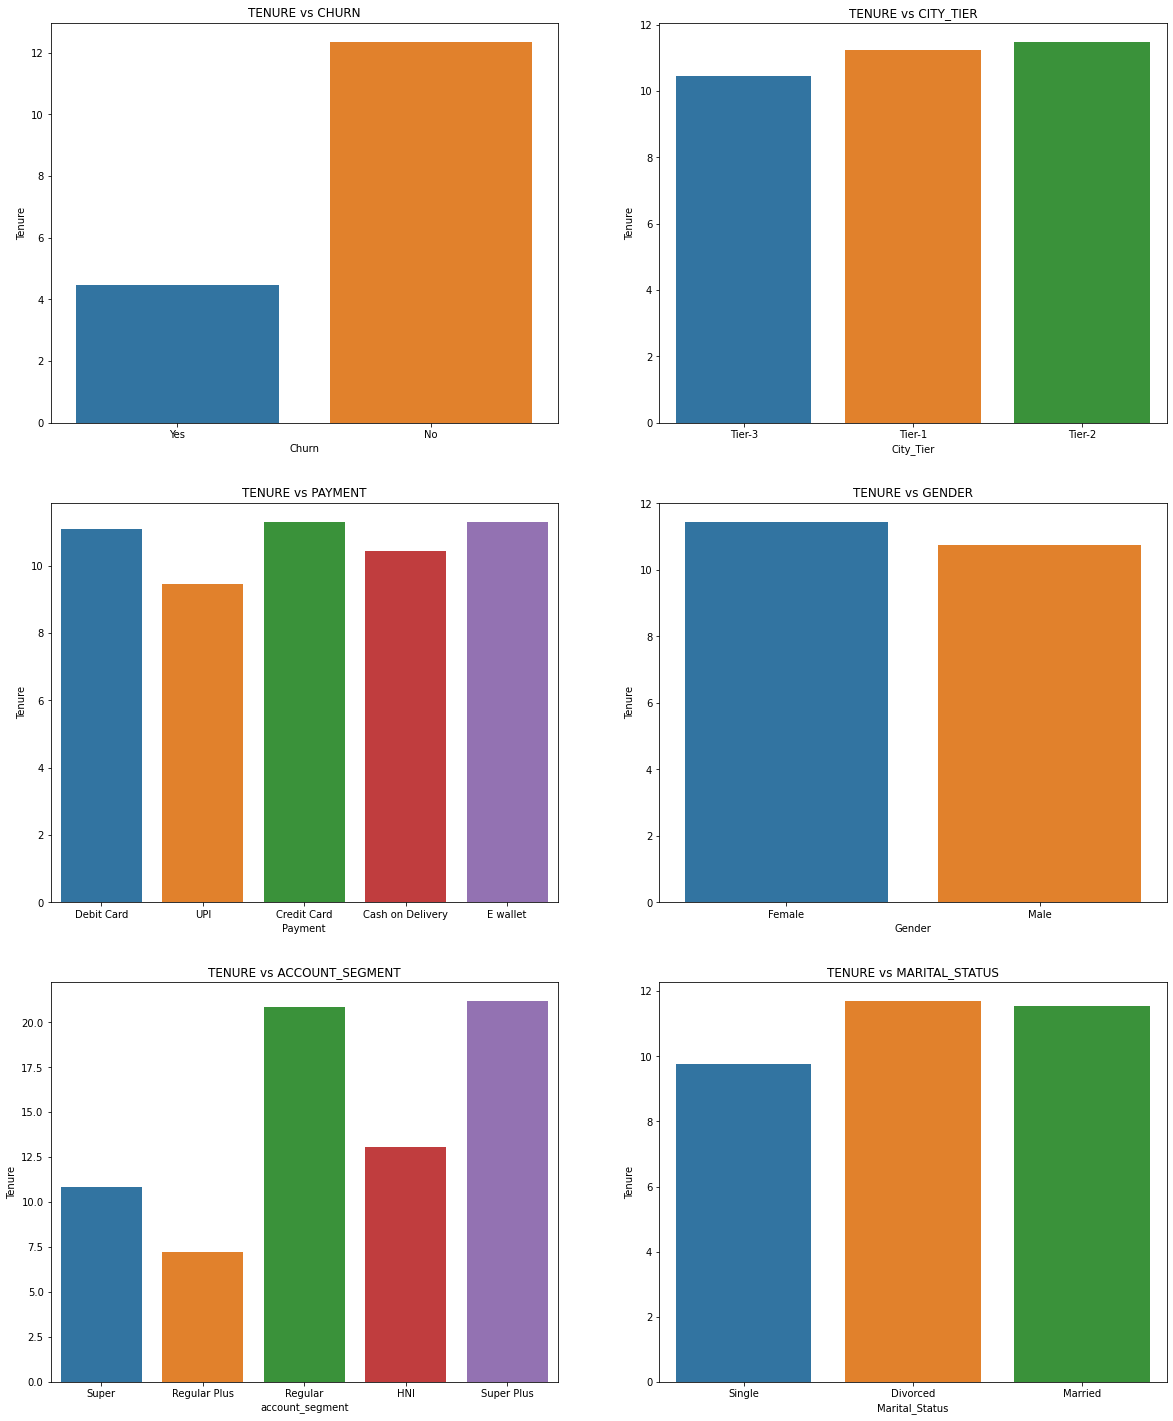

In [ ]:
# Tenure with all the categorical variables - barplot
fig,axes = plt.subplots(3,2,figsize = (20,25))
#plt.subplots_adjust(wspace=0.2,hspace=0.3)
for i,j in zip(cat,axes.flatten()):
    sns.barplot(y='Tenure',x = i,data=data2,ax=j,ci=None)
    j.set_title('TENURE vs {}'.format(i.upper()))

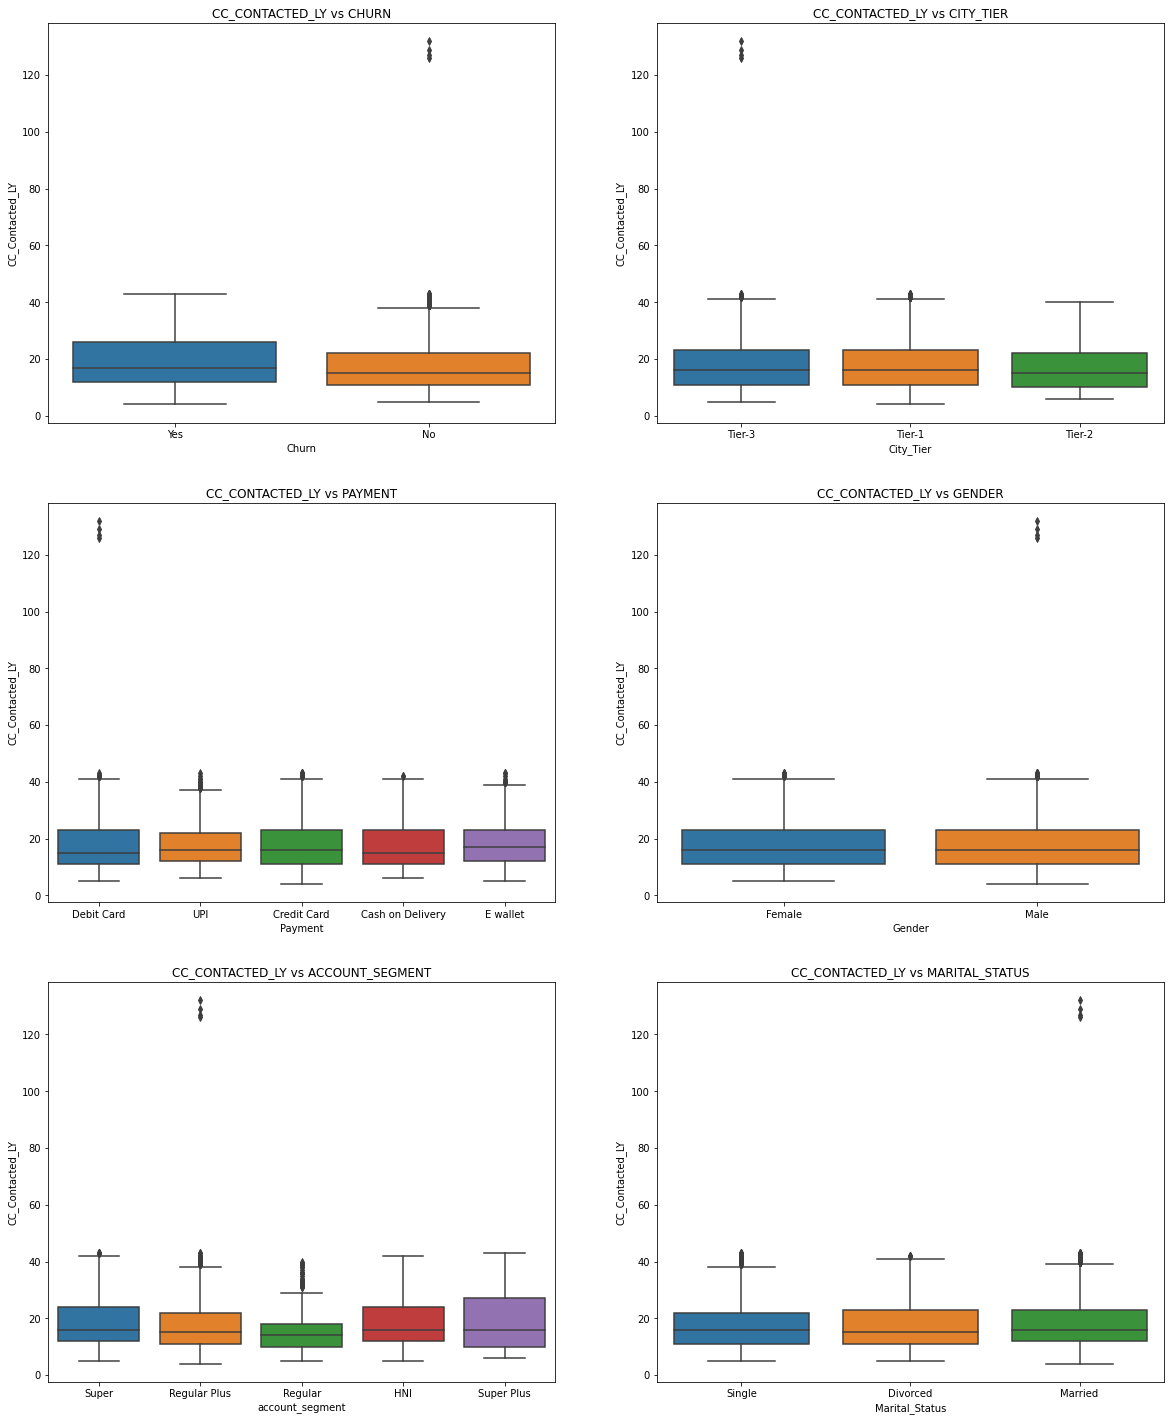

In [ ]:
# CC_Contacted_LY with all the categorical variables - boxplot
fig,axes = plt.subplots(3,2,figsize = (20,25))
#plt.subplots_adjust(wspace=0.2,hspace=0.3)
for i,j in zip(cat,axes.flatten()):
    sns.boxplot(y='CC_Contacted_LY',x = i,data=data2,ax=j)
    j.set_title('CC_CONTACTED_LY vs {}'.format(i.upper()))

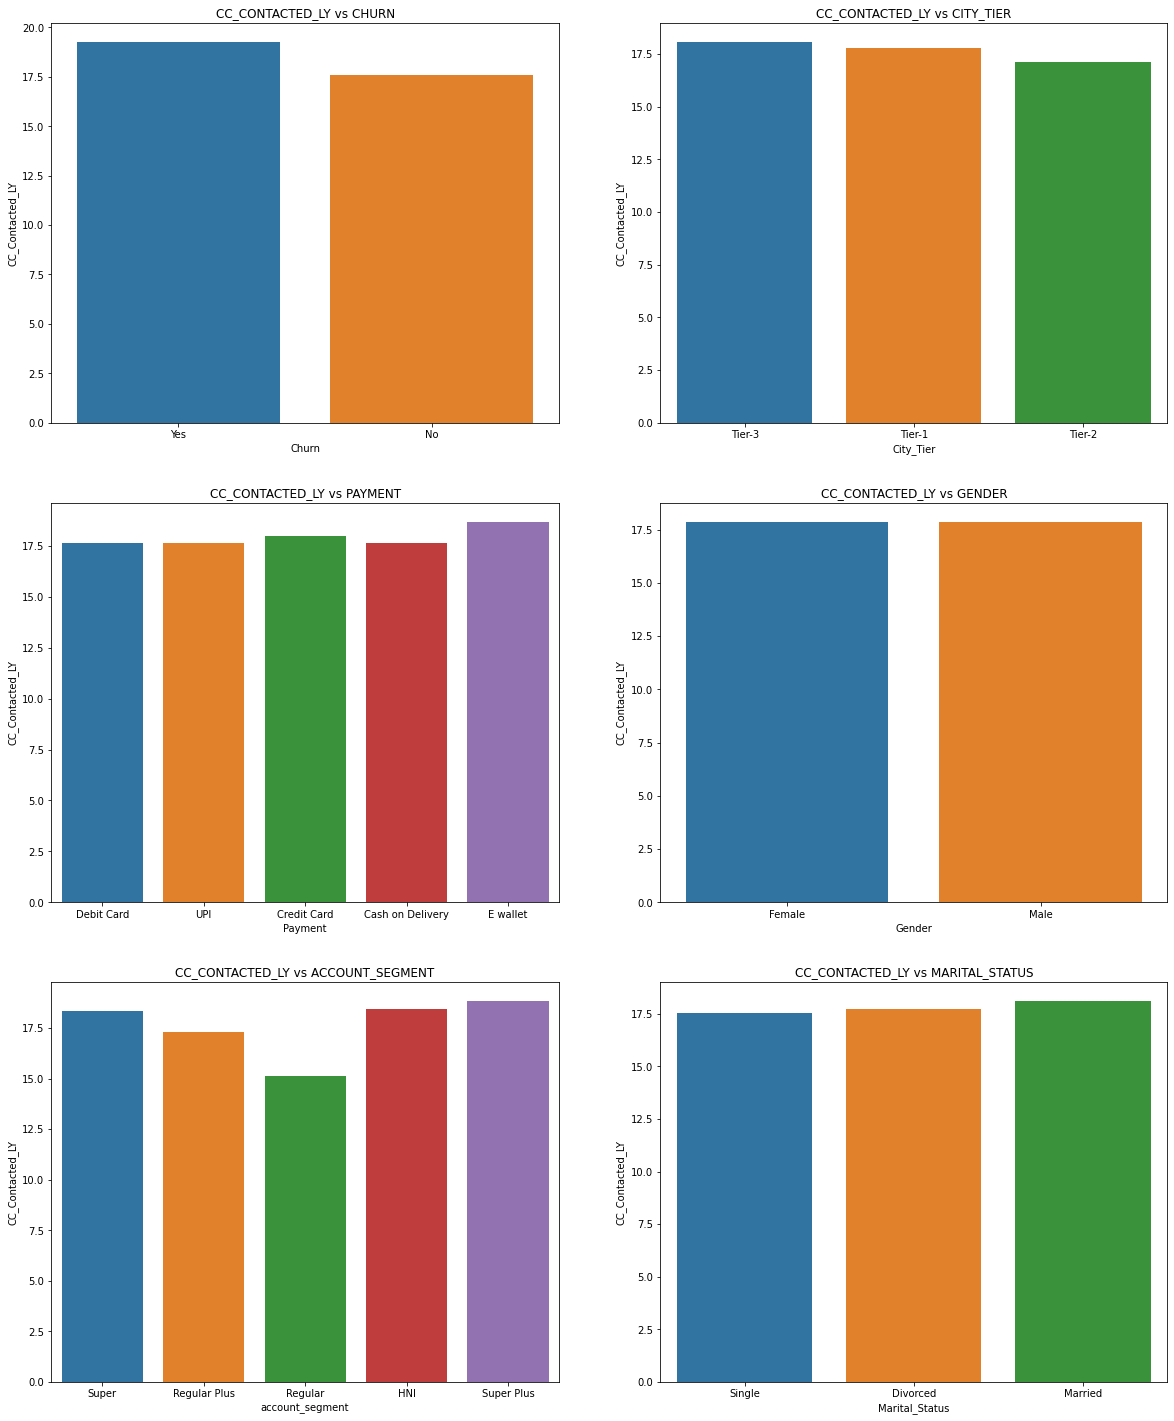

In [ ]:
# CC_Contacted_LY with all the categorical variables - barplot
fig,axes = plt.subplots(3,2,figsize = (20,25))
#plt.subplots_adjust(wspace=0.2,hspace=0.3)
for i,j in zip(cat,axes.flatten()):
    sns.barplot(y='CC_Contacted_LY',x = i,data=data2,ax=j,ci=None)
    j.set_title('CC_CONTACTED_LY vs {}'.format(i.upper()))

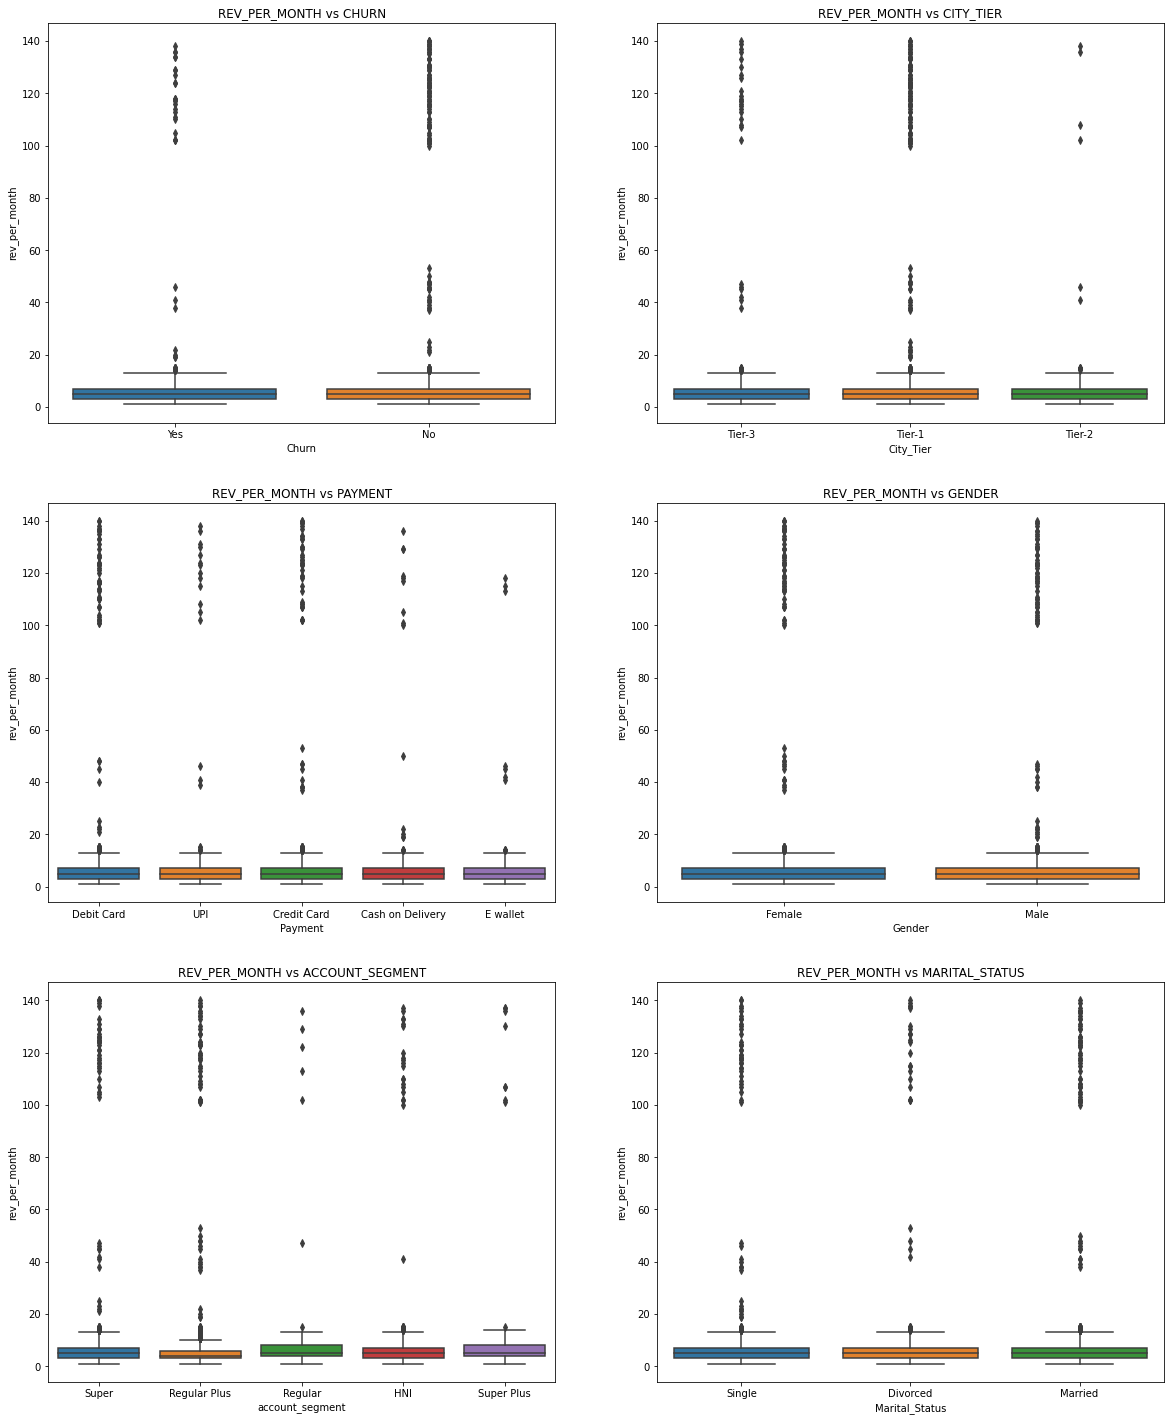

In [ ]:
# Rev_per_month with all the categorical variables - boxplot
fig,axes = plt.subplots(3,2,figsize = (20,25))
#plt.subplots_adjust(wspace=0.2,hspace=0.3)
for i,j in zip(cat,axes.flatten()):
    sns.boxplot(y='rev_per_month',x = i,data=data2,ax=j)
    j.set_title('REV_PER_MONTH vs {}'.format(i.upper()))

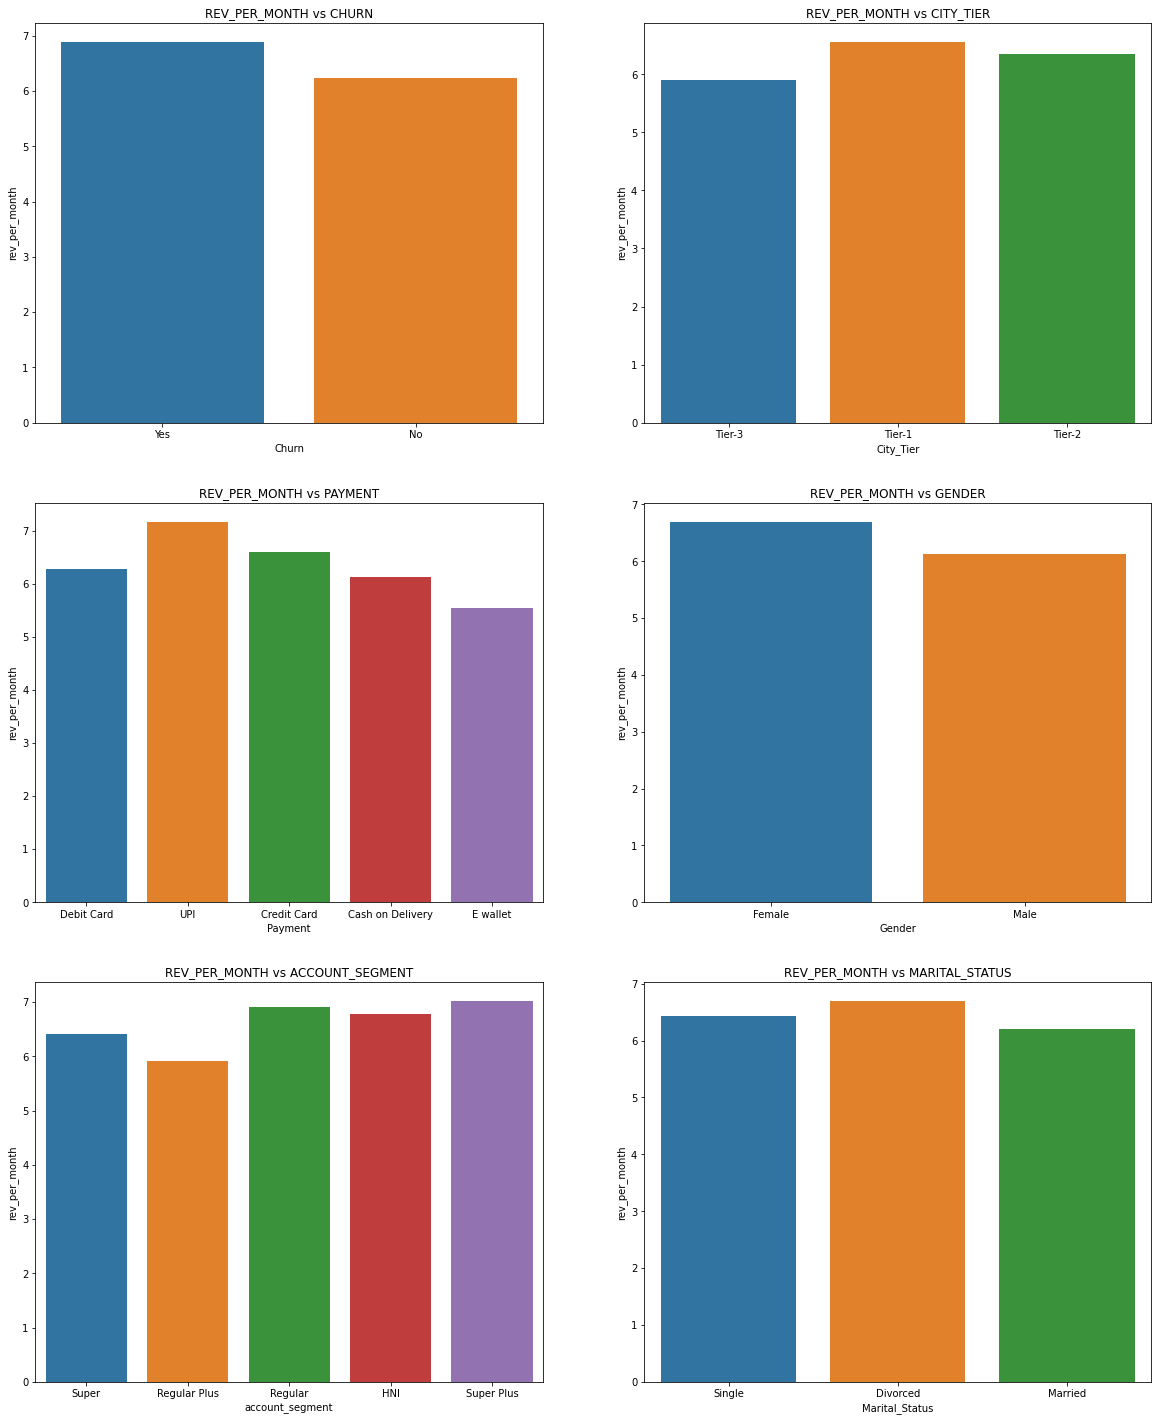

In [ ]:
# rev_per_month with all the categorical variables - barplot
fig,axes = plt.subplots(3,2,figsize = (20,25))
#plt.subplots_adjust(wspace=0.2,hspace=0.3)
for i,j in zip(cat,axes.flatten()):
    sns.barplot(y='rev_per_month',x = i,data=data2,ax=j,ci=None)
    j.set_title('REV_PER_MONTH vs {}'.format(i.upper()))

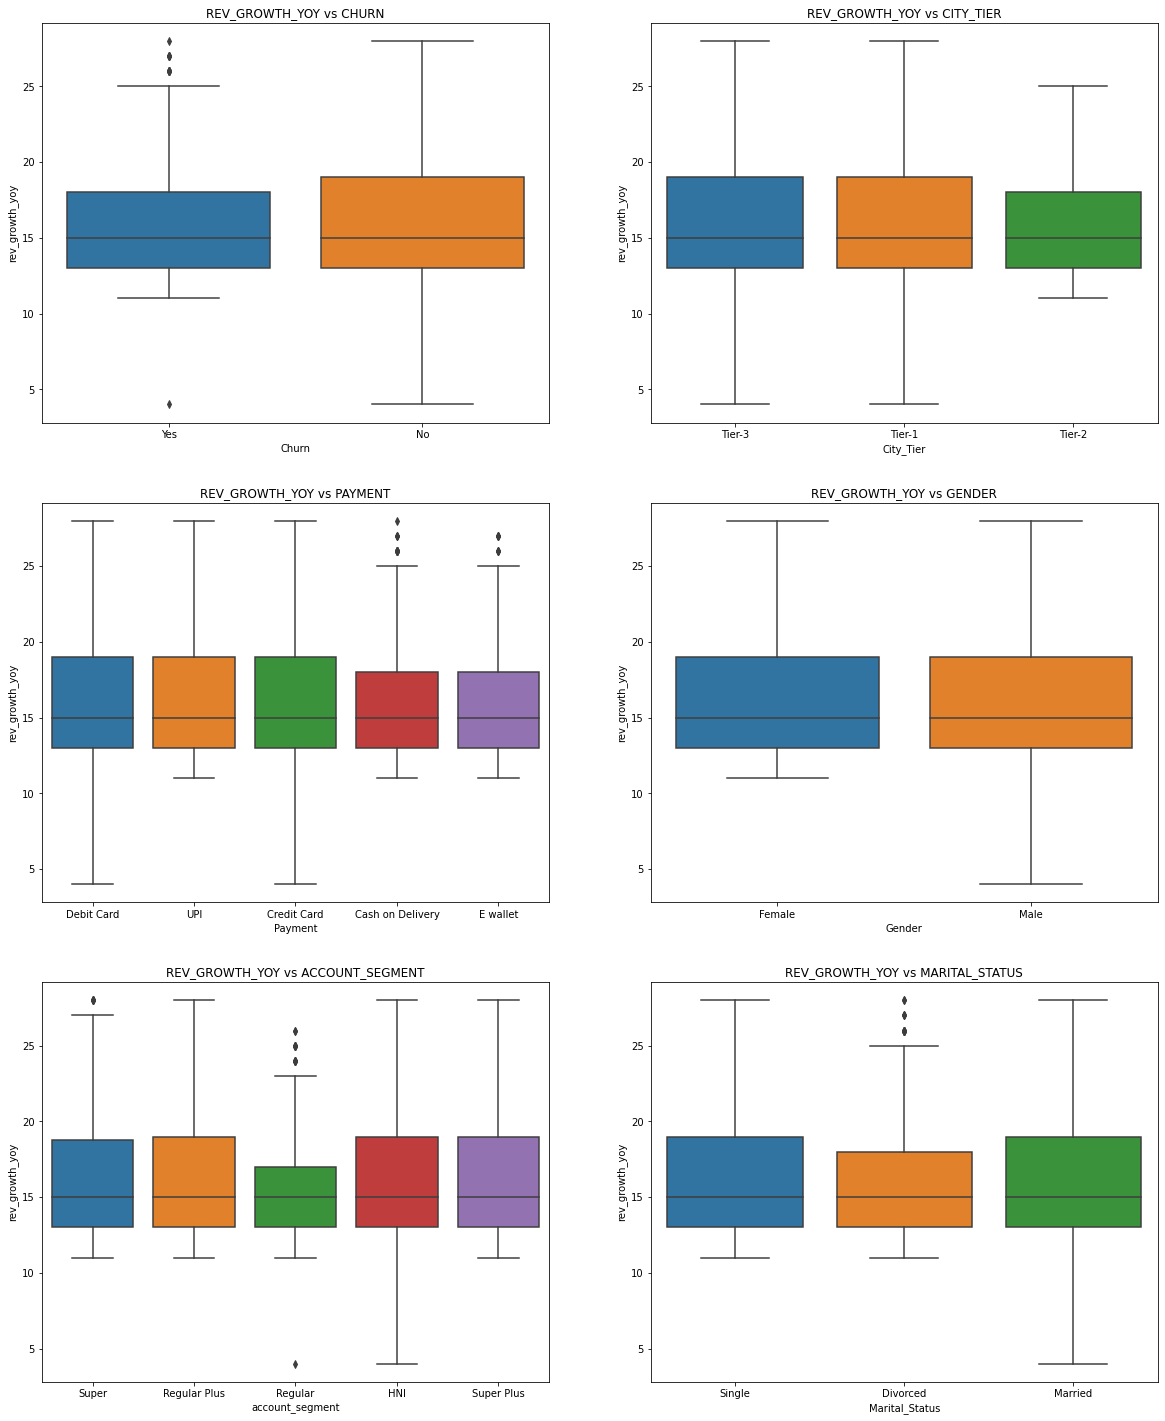

In [ ]:
# Rev_growth_yoy with all the categorical variables - boxplot
fig,axes = plt.subplots(3,2,figsize = (20,25))
#plt.subplots_adjust(wspace=0.2,hspace=0.3)
for i,j in zip(cat,axes.flatten()):
    sns.boxplot(y='rev_growth_yoy',x = i,data=data2,ax=j)
    j.set_title('REV_GROWTH_YOY vs {}'.format(i.upper()))

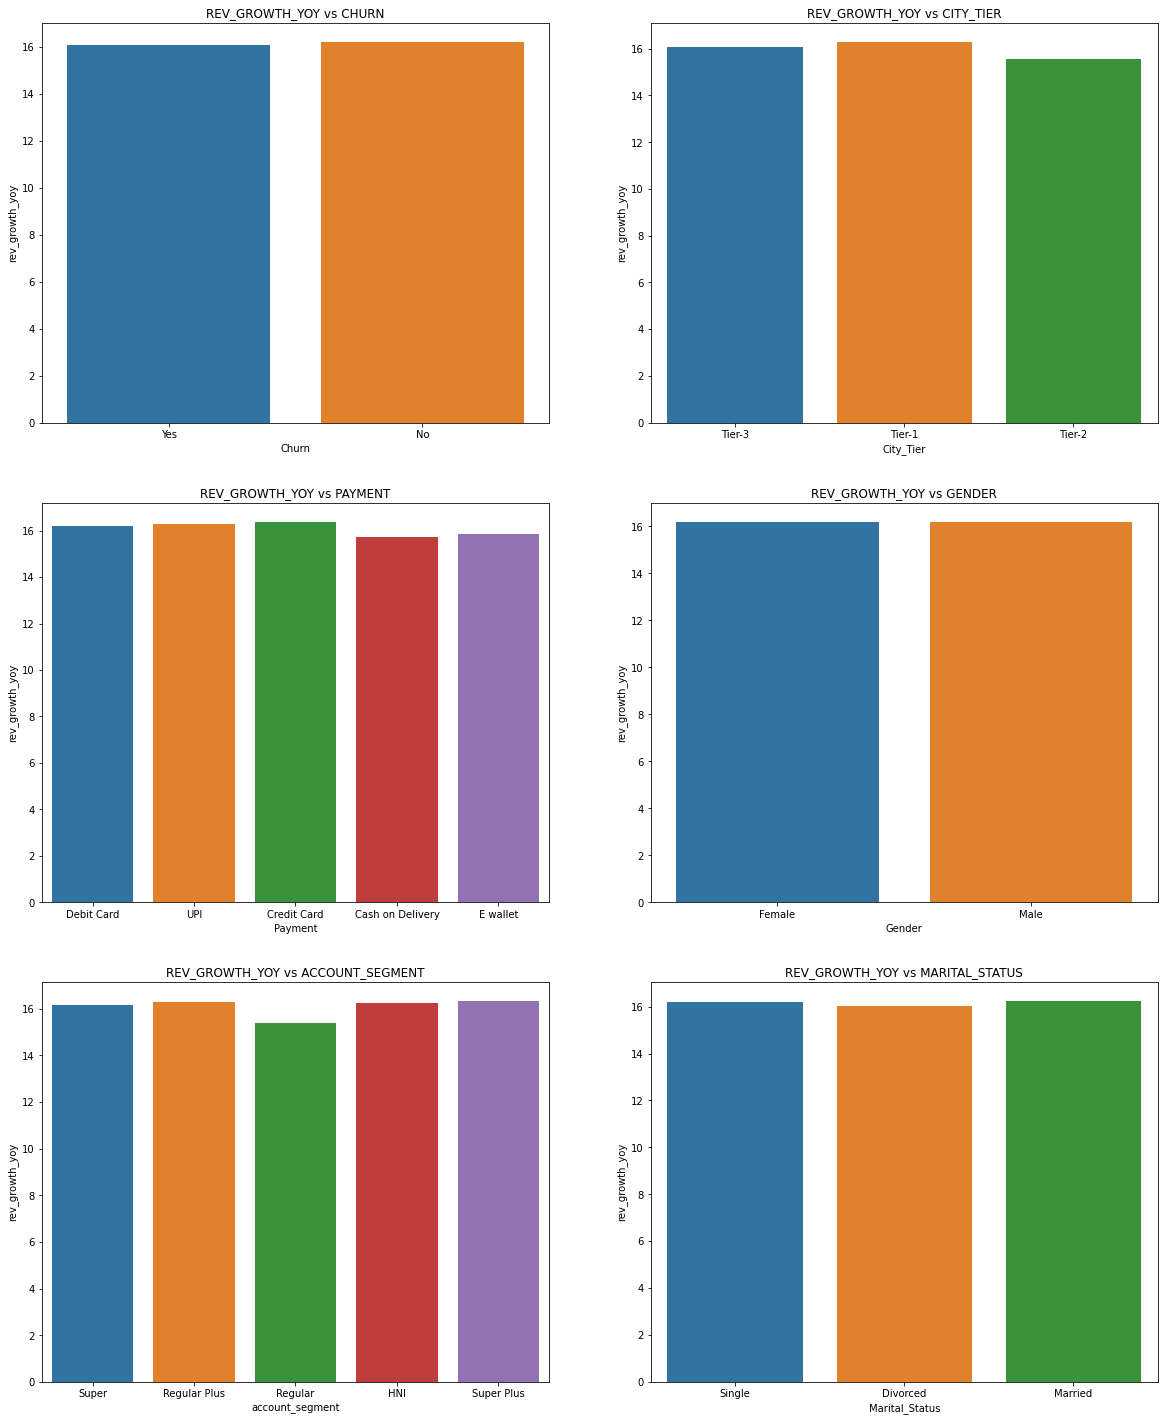

In [ ]:
# rev_growth_yoy with all the categorical variables - barplot
fig,axes = plt.subplots(3,2,figsize = (20,25))
#plt.subplots_adjust(wspace=0.2,hspace=0.3)
for i,j in zip(cat,axes.flatten()):
    sns.barplot(y='rev_growth_yoy',x = i,data=data2,ax=j,ci=None)
    j.set_title('REV_GROWTH_YOY vs {}'.format(i.upper()))

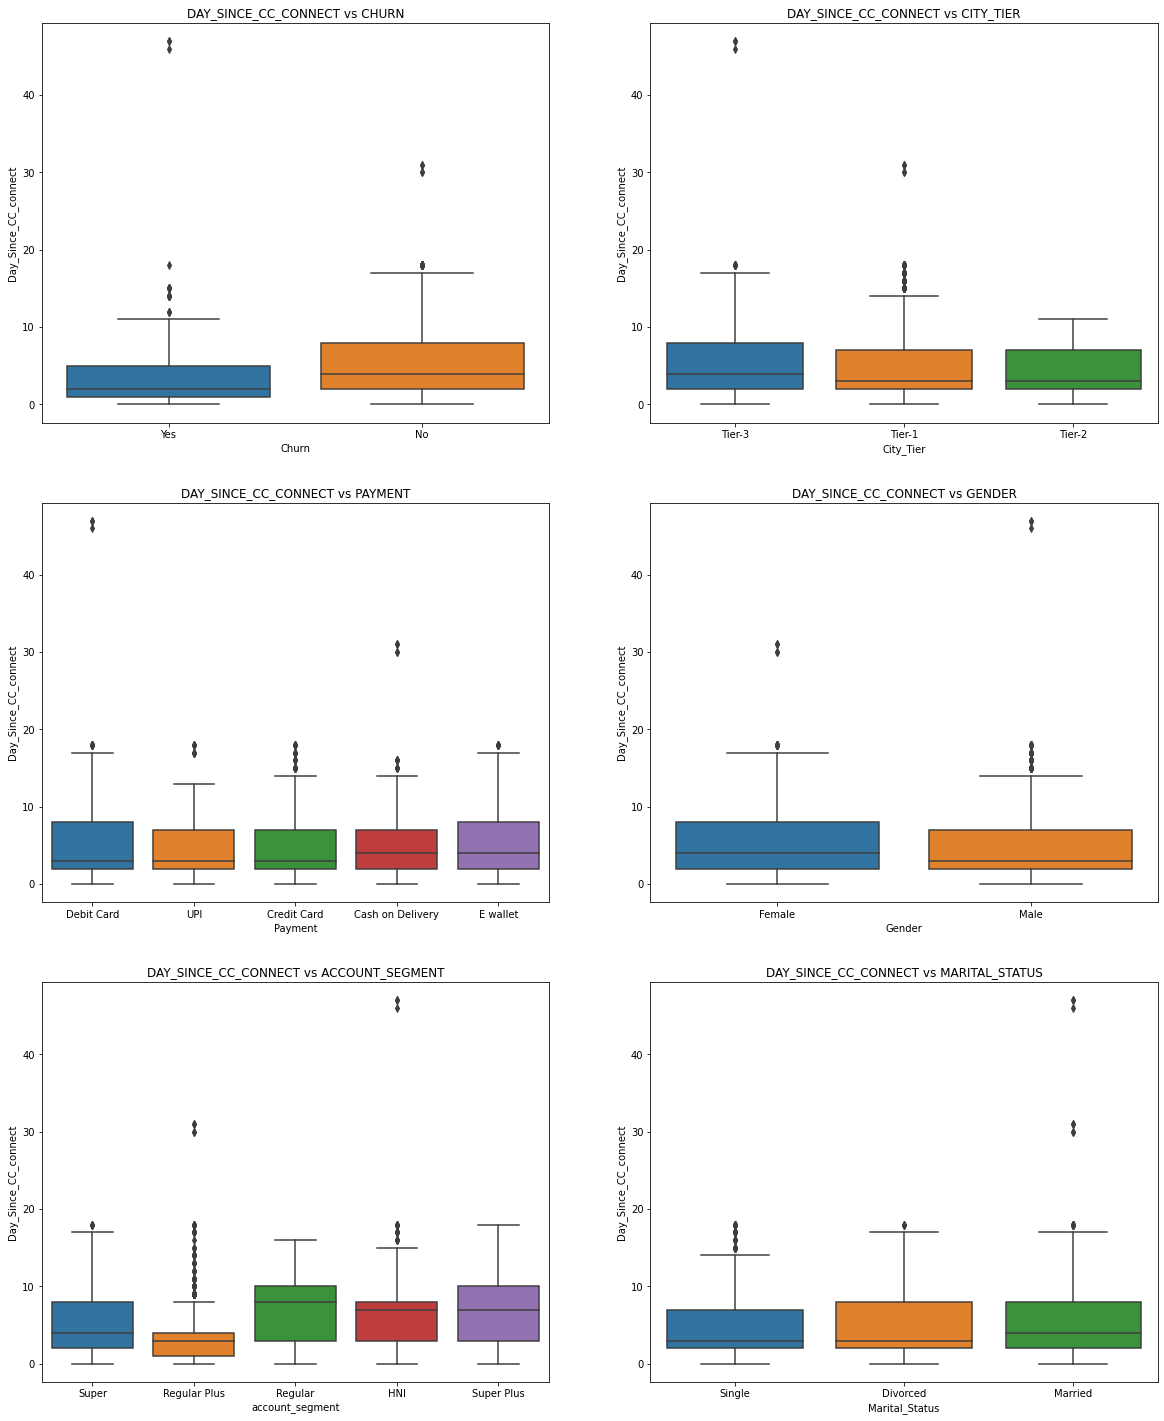

In [ ]:
 # Day_Since_CC_connect with all the categorical variables - boxplot
fig,axes = plt.subplots(3,2,figsize = (20,25))
#plt.subplots_adjust(wspace=0.2,hspace=0.3)
for i,j in zip(cat,axes.flatten()):
    sns.boxplot(y='Day_Since_CC_connect',x = i,data=data2,ax=j)
    j.set_title('DAY_SINCE_CC_CONNECT vs {}'.format(i.upper()))

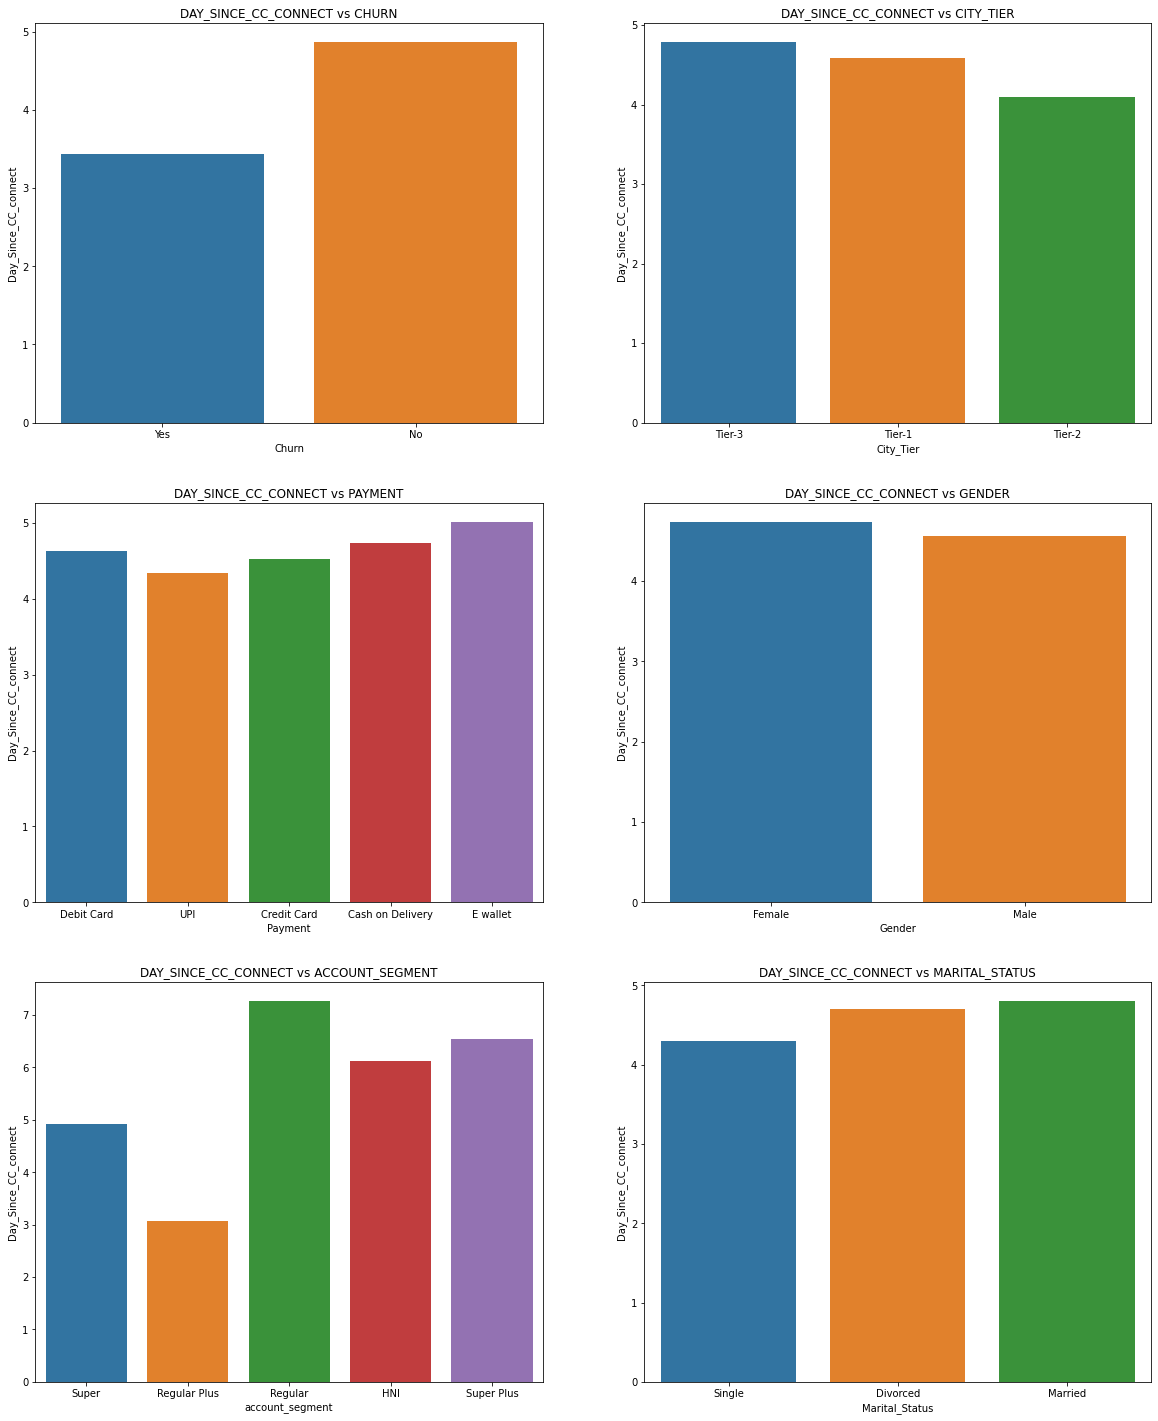

In [ ]:
# rev_growth_yoy with all the categorical variables - barplot
fig,axes = plt.subplots(3,2,figsize = (20,25))
#plt.subplots_adjust(wspace=0.2,hspace=0.3)
for i,j in zip(cat,axes.flatten()):
    sns.barplot(y='Day_Since_CC_connect',x = i,data=data2,ax=j,ci=None)
    j.set_title('DAY_SINCE_CC_CONNECT vs {}'.format(i.upper()))

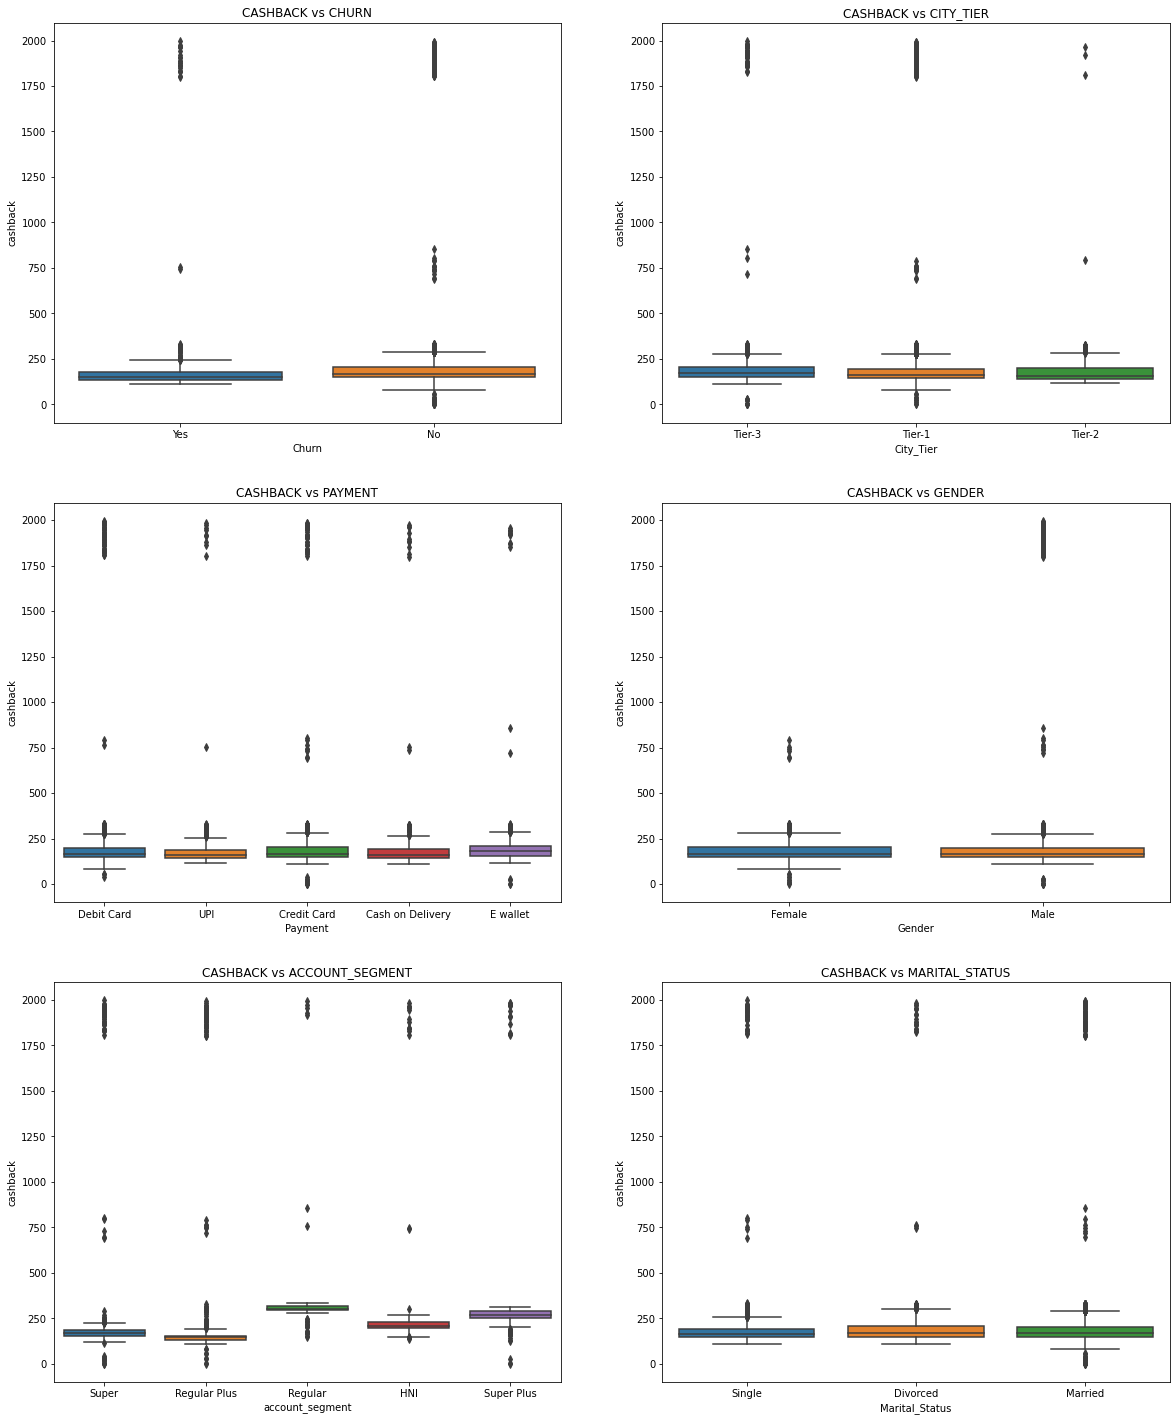

In [ ]:
 # Cashback with all the categorical variables - boxplot
fig,axes = plt.subplots(3,2,figsize = (20,25))
#plt.subplots_adjust(wspace=0.2,hspace=0.3)
for i,j in zip(cat,axes.flatten()):
    sns.boxplot(y='cashback',x = i,data=data2,ax=j)
    j.set_title('CASHBACK vs {}'.format(i.upper()))

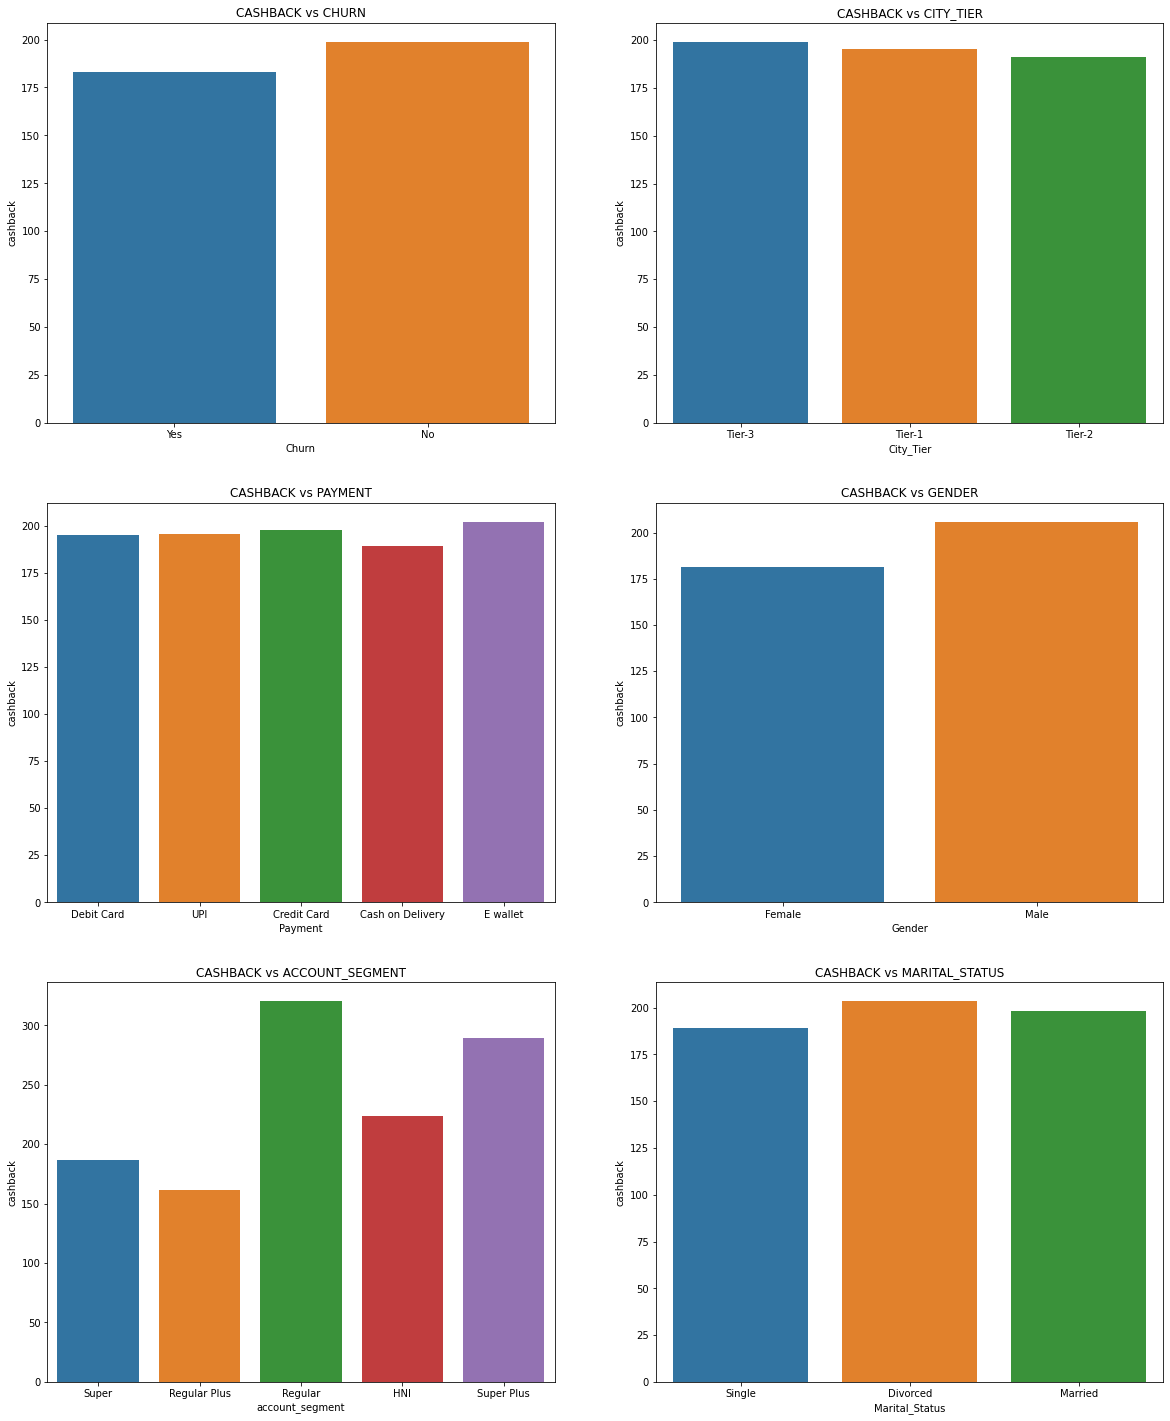

In [ ]:
# Cashback with all the categorical variables - barplot
fig,axes = plt.subplots(3,2,figsize = (20,25))
#plt.subplots_adjust(wspace=0.2,hspace=0.3)
for i,j in zip(cat,axes.flatten()):
    sns.barplot(y='cashback',x = i,data=data2,ax=j,ci=None)
    j.set_title('CASHBACK vs {}'.format(i.upper()))

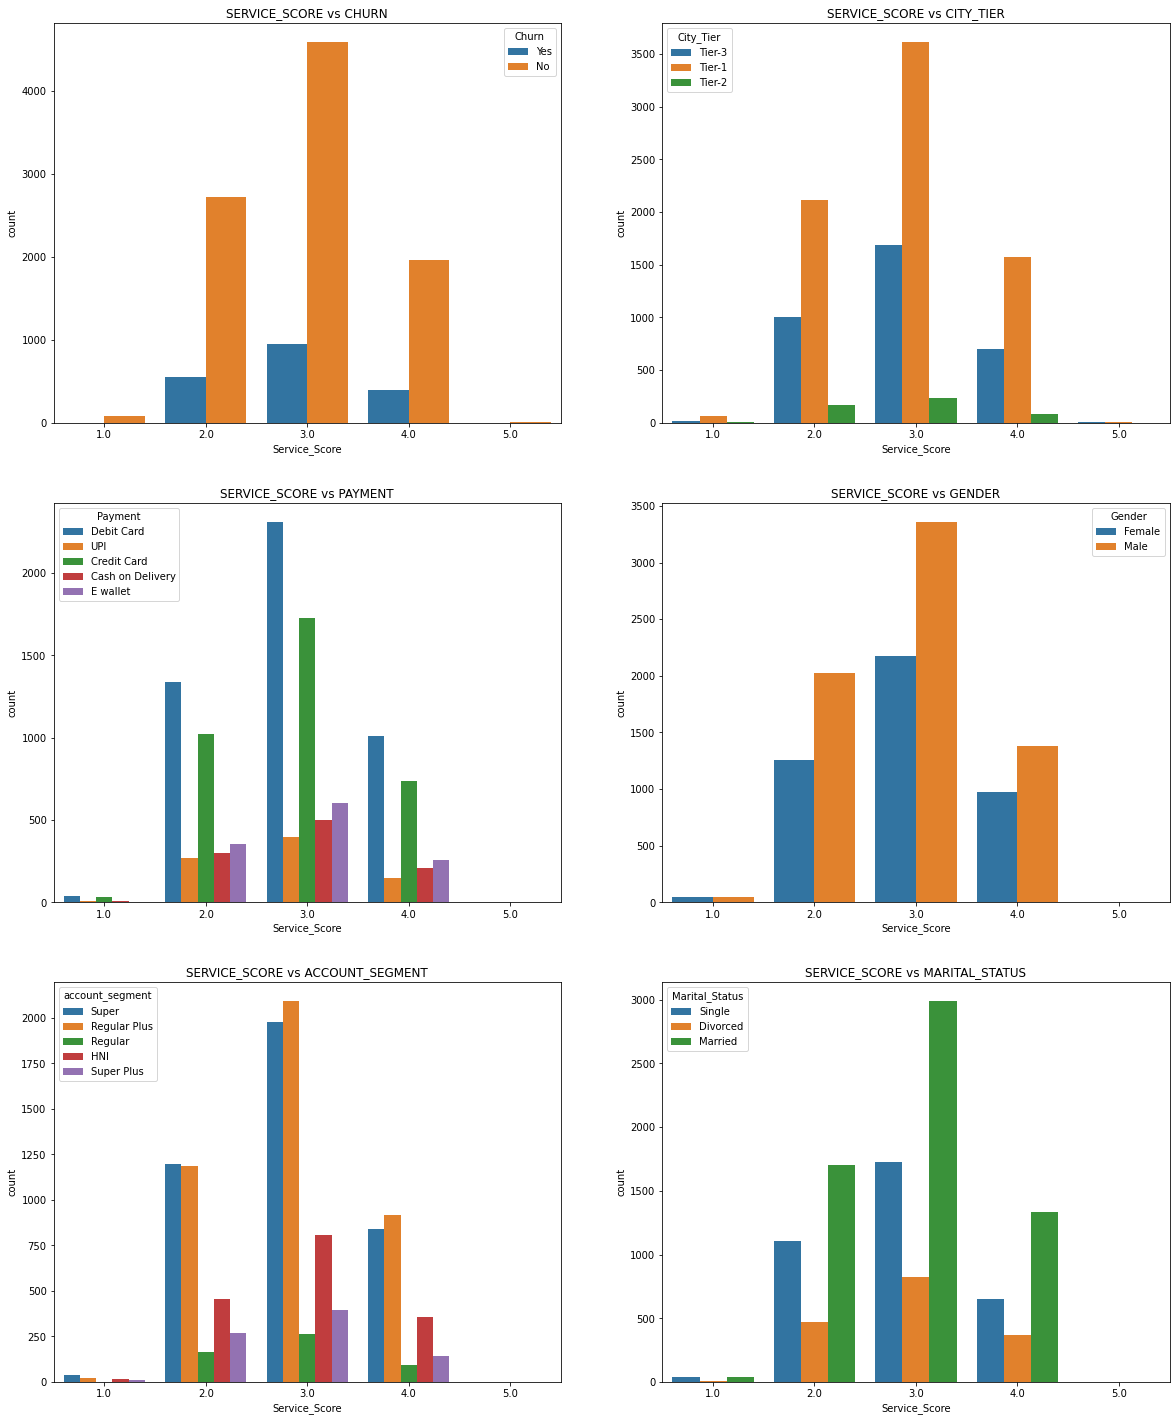

In [ ]:
#Service Score with the categorical variables
fig,axes = plt.subplots(3,2,figsize = (20,25))
#plt.subplots_adjust(wspace=0.2,hspace=0.3)
for i,j in zip(cat,axes.flatten()):
    sns.countplot(x='Service_Score',hue = i,data=data2,ax=j)
    j.set_title('SERVICE_SCORE vs {}'.format(i.upper()))

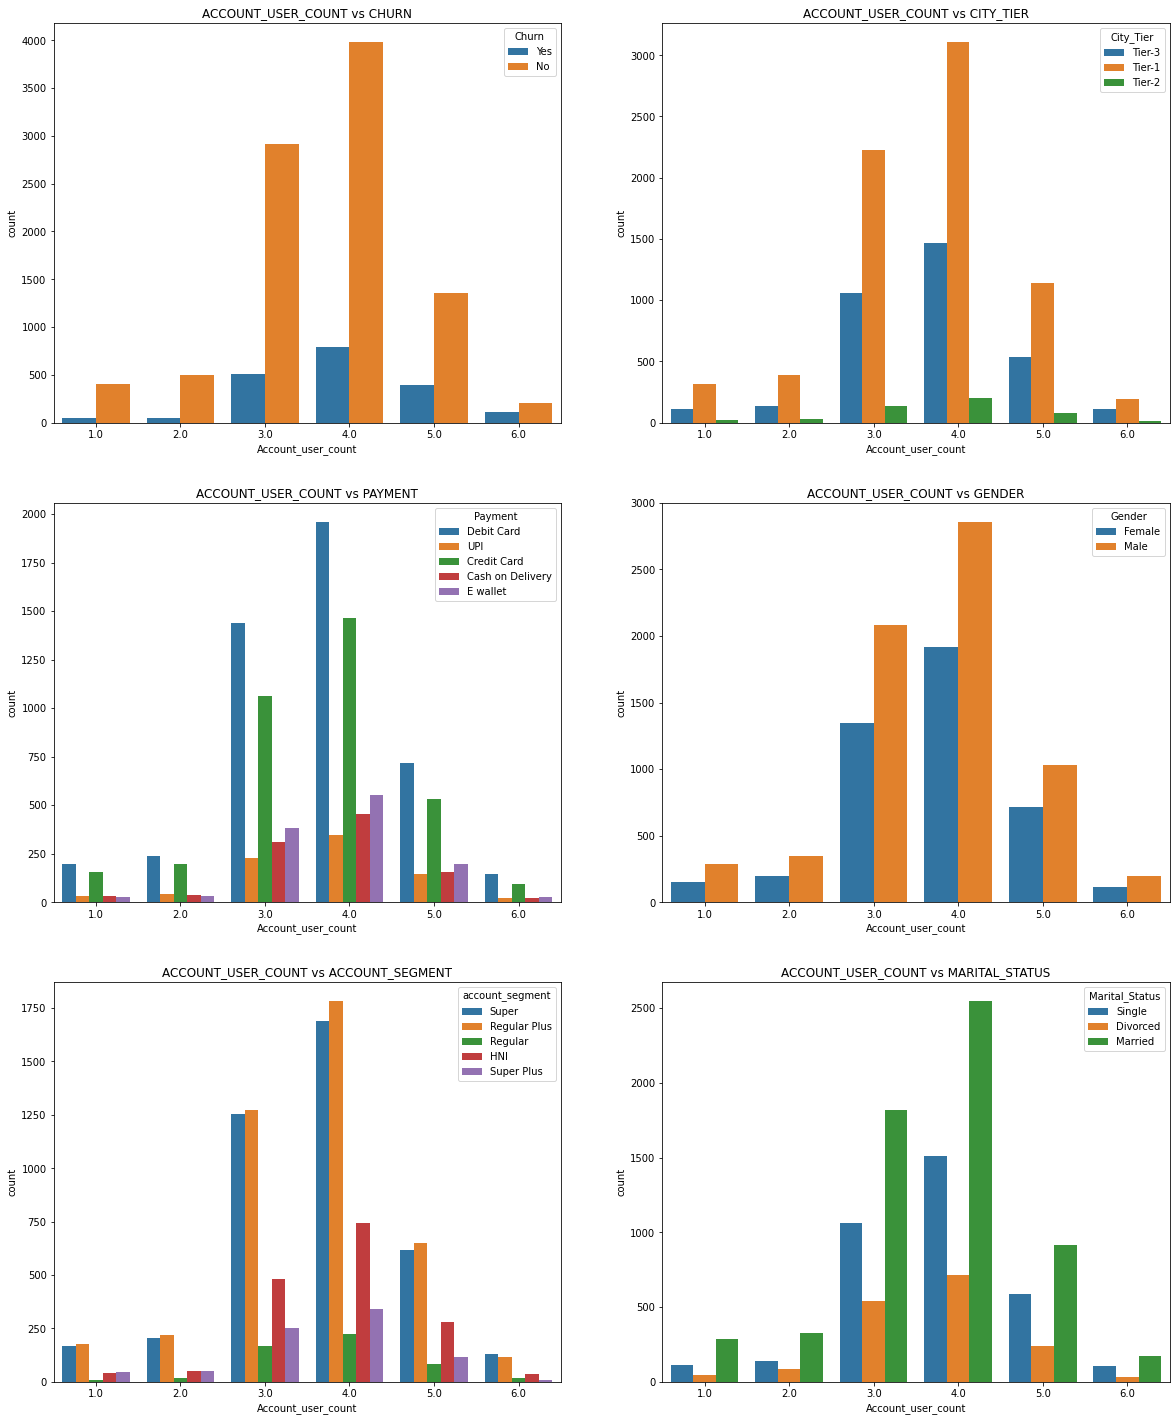

In [ ]:
#Account User Counts with the categorical variables
fig,axes = plt.subplots(3,2,figsize = (20,25))
#plt.subplots_adjust(wspace=0.2,hspace=0.3)
for i,j in zip(cat,axes.flatten()):
    sns.countplot(x='Account_user_count',hue = i,data=data2,ax=j)
    j.set_title('ACCOUNT_USER_COUNT vs {}'.format(i.upper()))

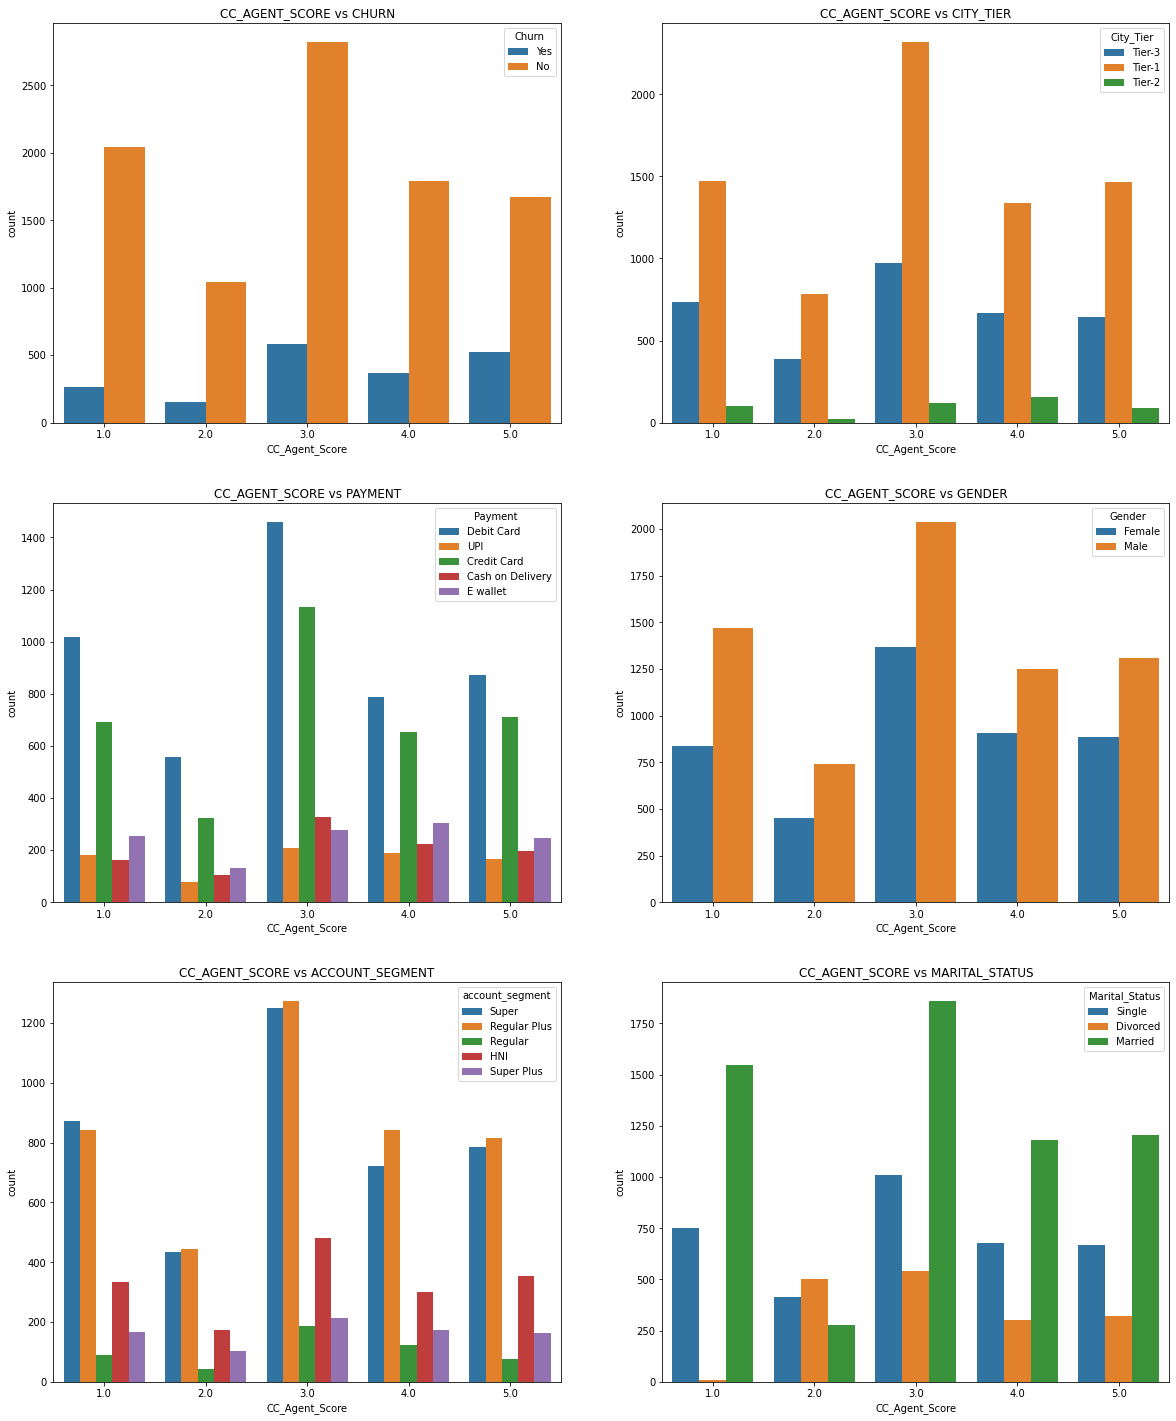

In [ ]:
#CC agent score with the categorical variables
fig,axes = plt.subplots(3,2,figsize = (20,25))
#plt.subplots_adjust(wspace=0.2,hspace=0.3)
for i,j in zip(cat,axes.flatten()):
    sns.countplot(x='CC_Agent_Score',hue = i,data=data2,ax=j)
    j.set_title('CC_AGENT_SCORE vs {}'.format(i.upper()))

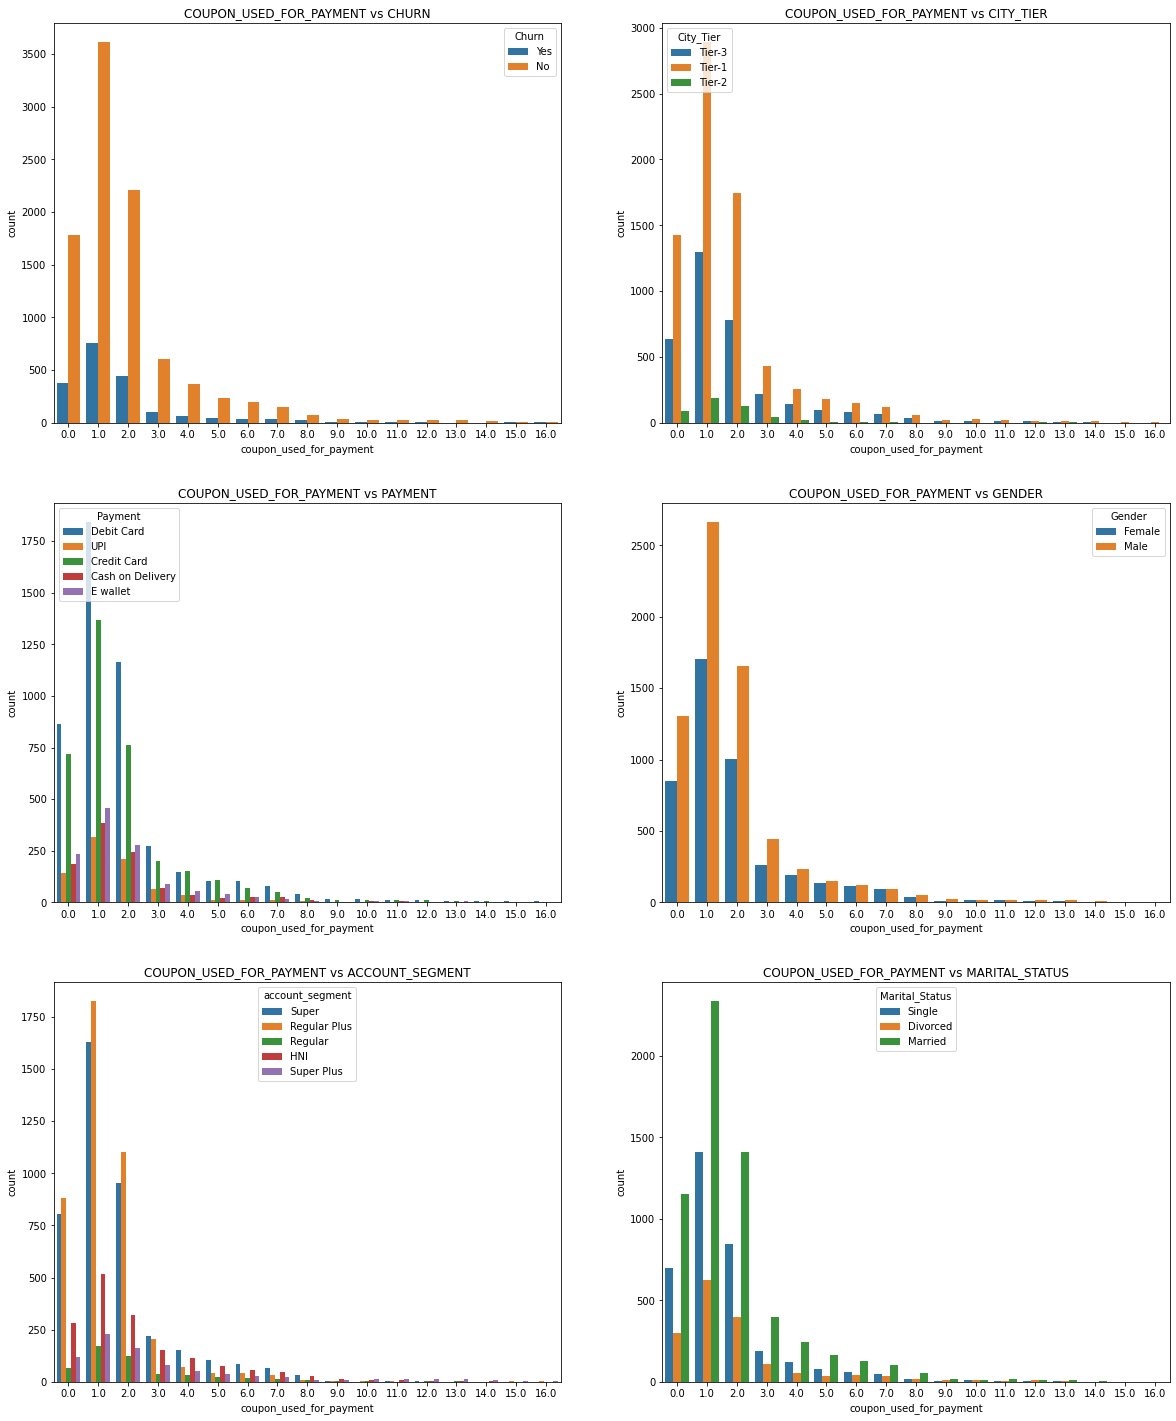

In [ ]:
#Coupon used for payment  with the categorical variables
fig,axes = plt.subplots(3,2,figsize = (20,25))
#plt.subplots_adjust(wspace=0.2,hspace=0.3)
for i,j in zip(cat,axes.flatten()):
    sns.countplot(x='coupon_used_for_payment',hue = i,data=data2,ax=j)
    j.set_title('COUPON_USED_FOR_PAYMENT vs {}'.format(i.upper()))

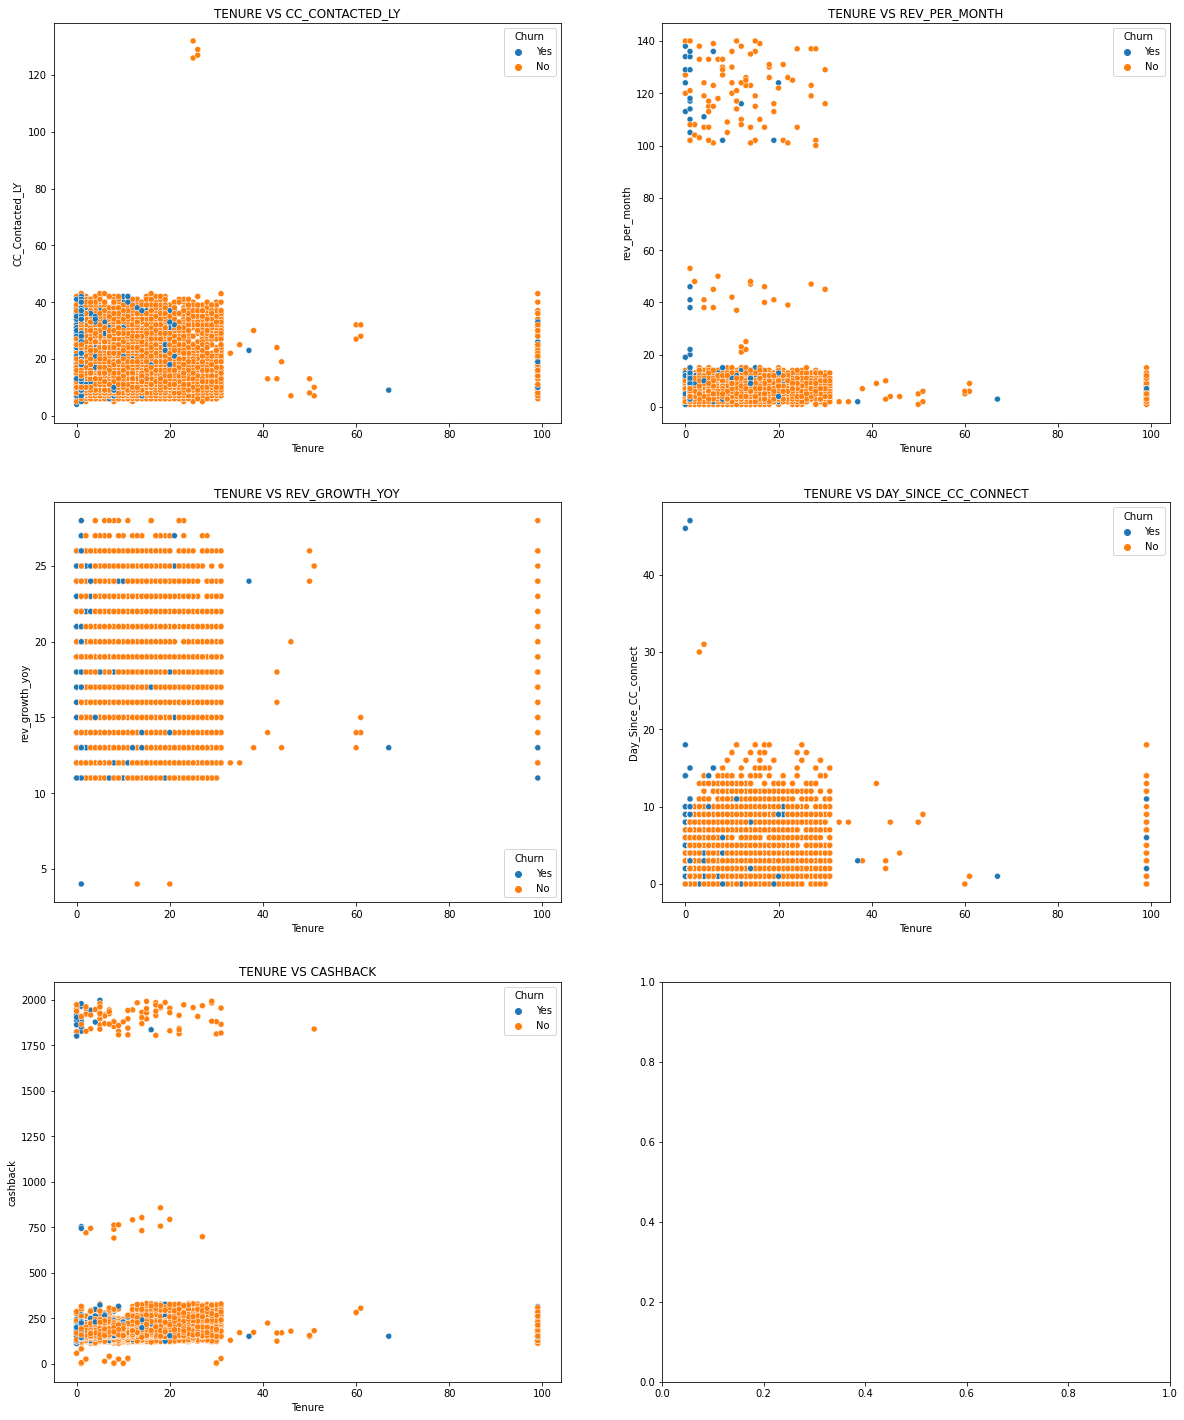

In [ ]:
# Tenure vs num variables
x = 'Tenure'
y = [i for i in col_list if i != x]
fig,axes = plt.subplots(3,2,figsize = (20,25))
for i,j in zip(y,axes.flatten()):
    sns.scatterplot(x = x,y = i,data = data2,ax = j,hue = 'Churn')
    j.set_title('{} VS {}'.format(x.upper(),i.upper()))

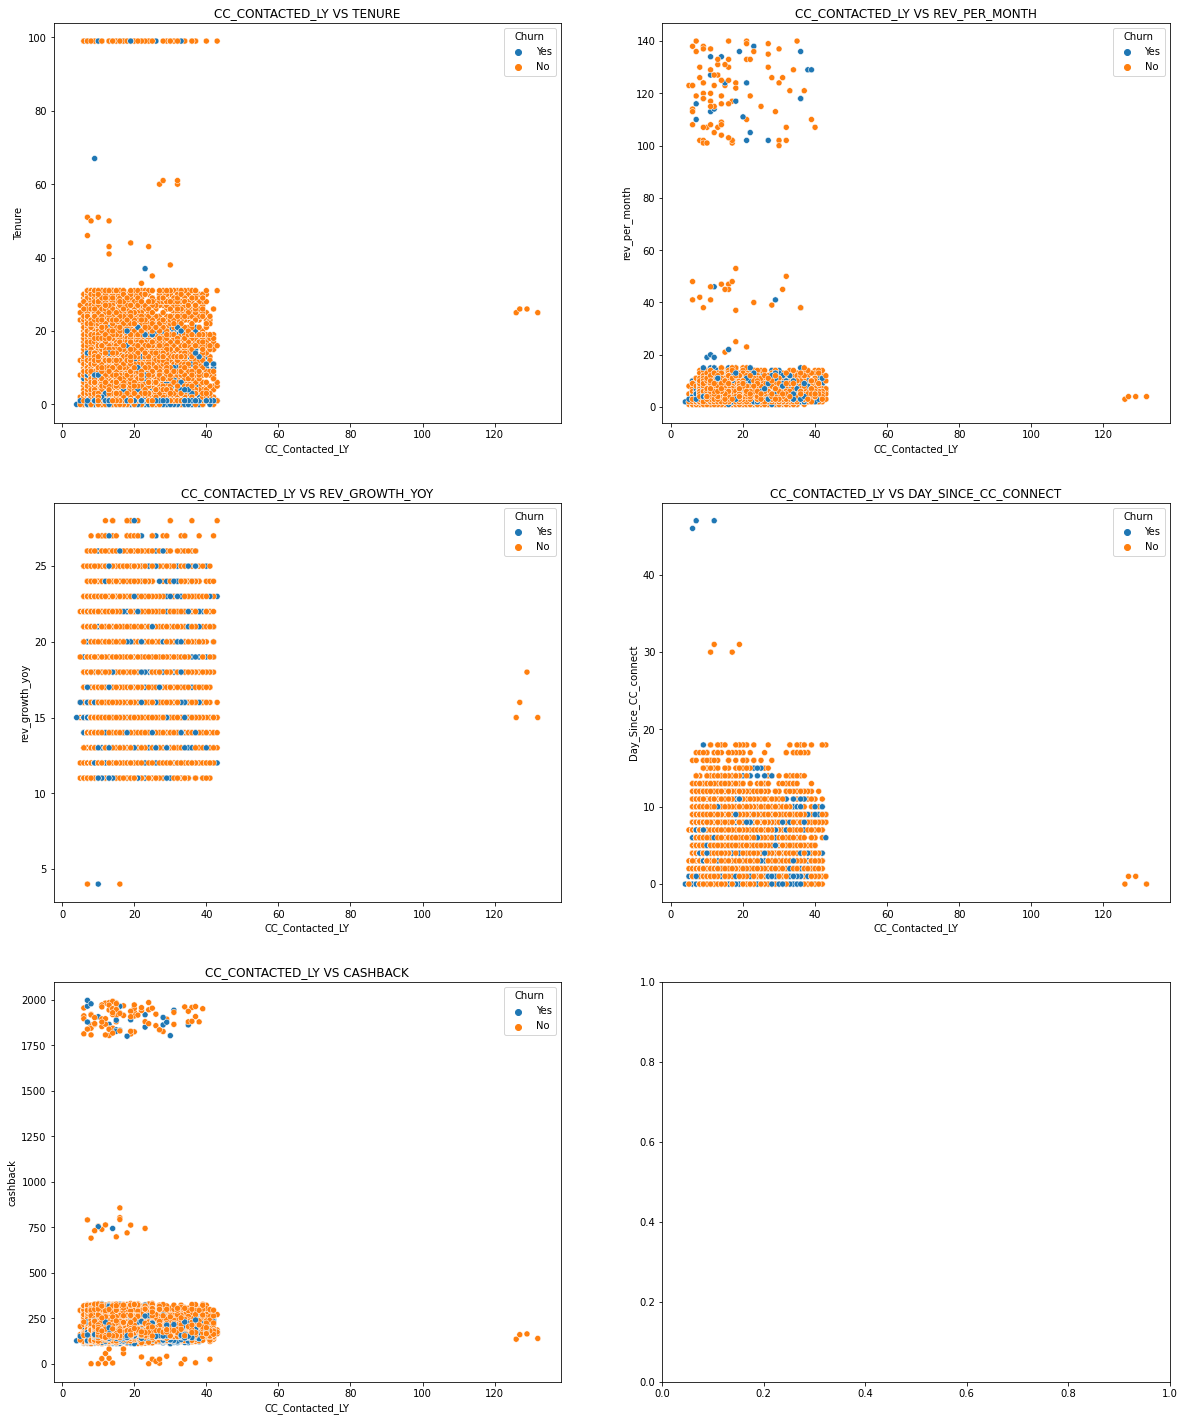

In [ ]:
# CC_Contacted_Ly vs num variables
x = 'CC_Contacted_LY'
y = [i for i in col_list if i != x]
fig,axes = plt.subplots(3,2,figsize = (20,25))
for i,j in zip(y,axes.flatten()):
    sns.scatterplot(x = x,y = i,data = data2,ax = j,hue = 'Churn')
    j.set_title('{} VS {}'.format(x.upper(),i.upper()))

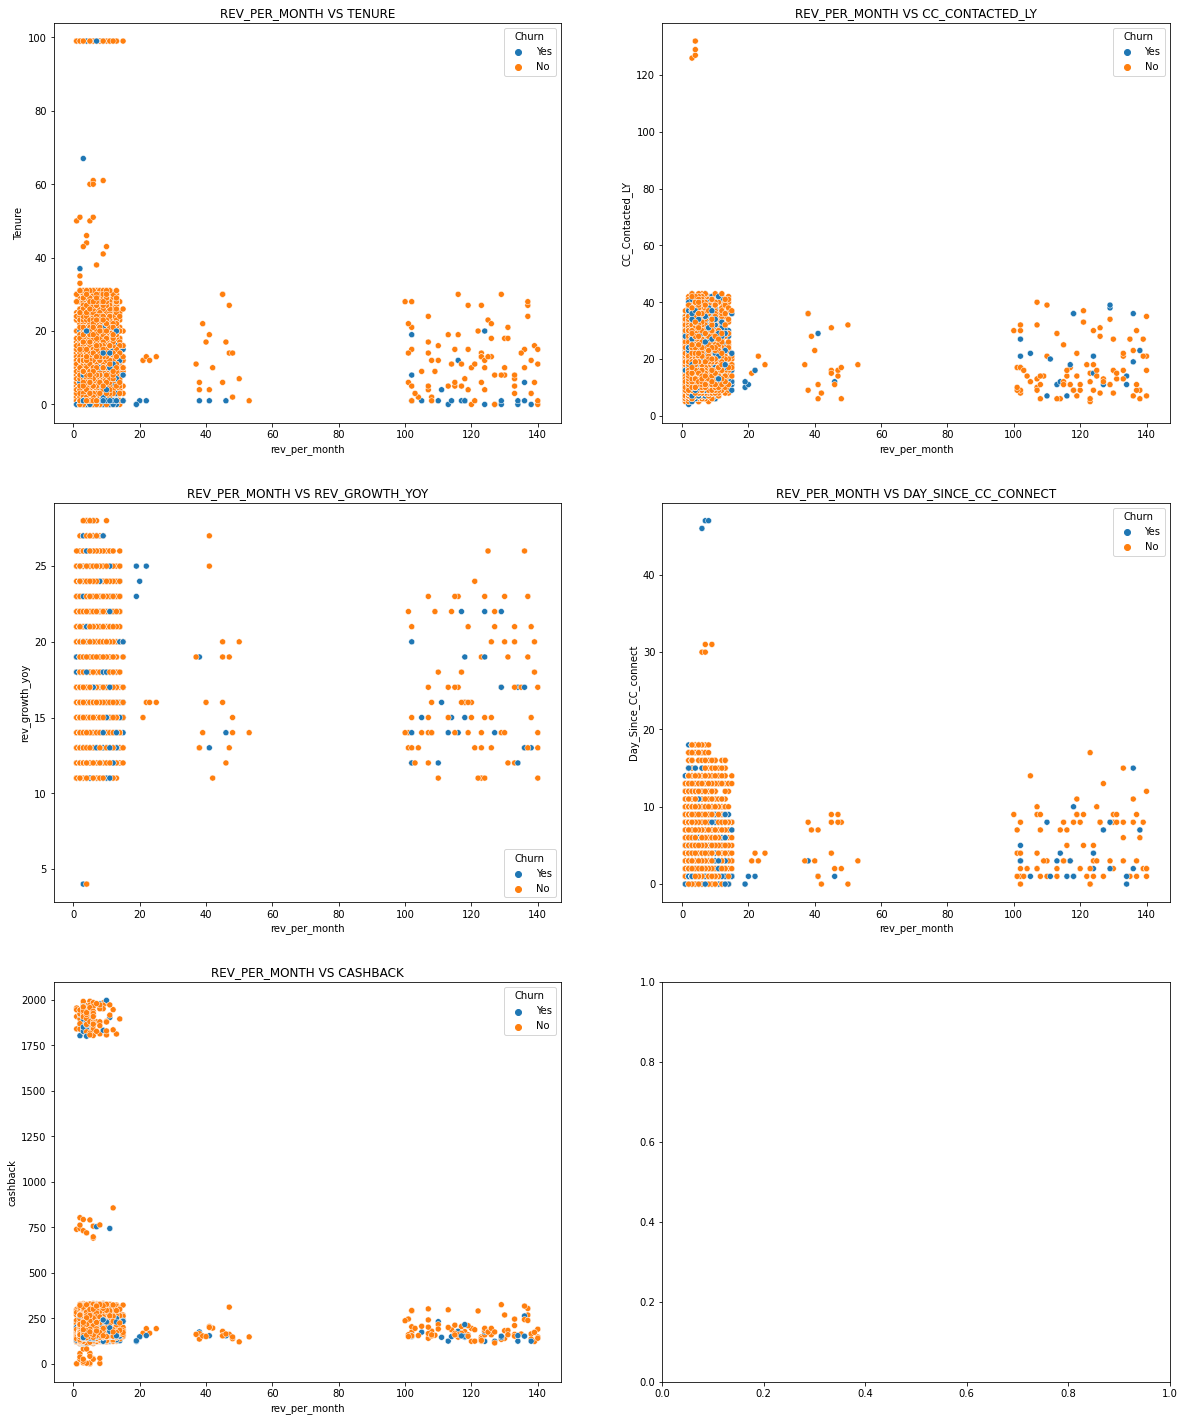

In [ ]:
# rev_per_month vs num variables
x = 'rev_per_month'
y = [i for i in col_list if i != x]
fig,axes = plt.subplots(3,2,figsize = (20,25))
for i,j in zip(y,axes.flatten()):
    sns.scatterplot(x = x,y = i,data = data2,ax = j,hue = 'Churn')
    j.set_title('{} VS {}'.format(x.upper(),i.upper()))

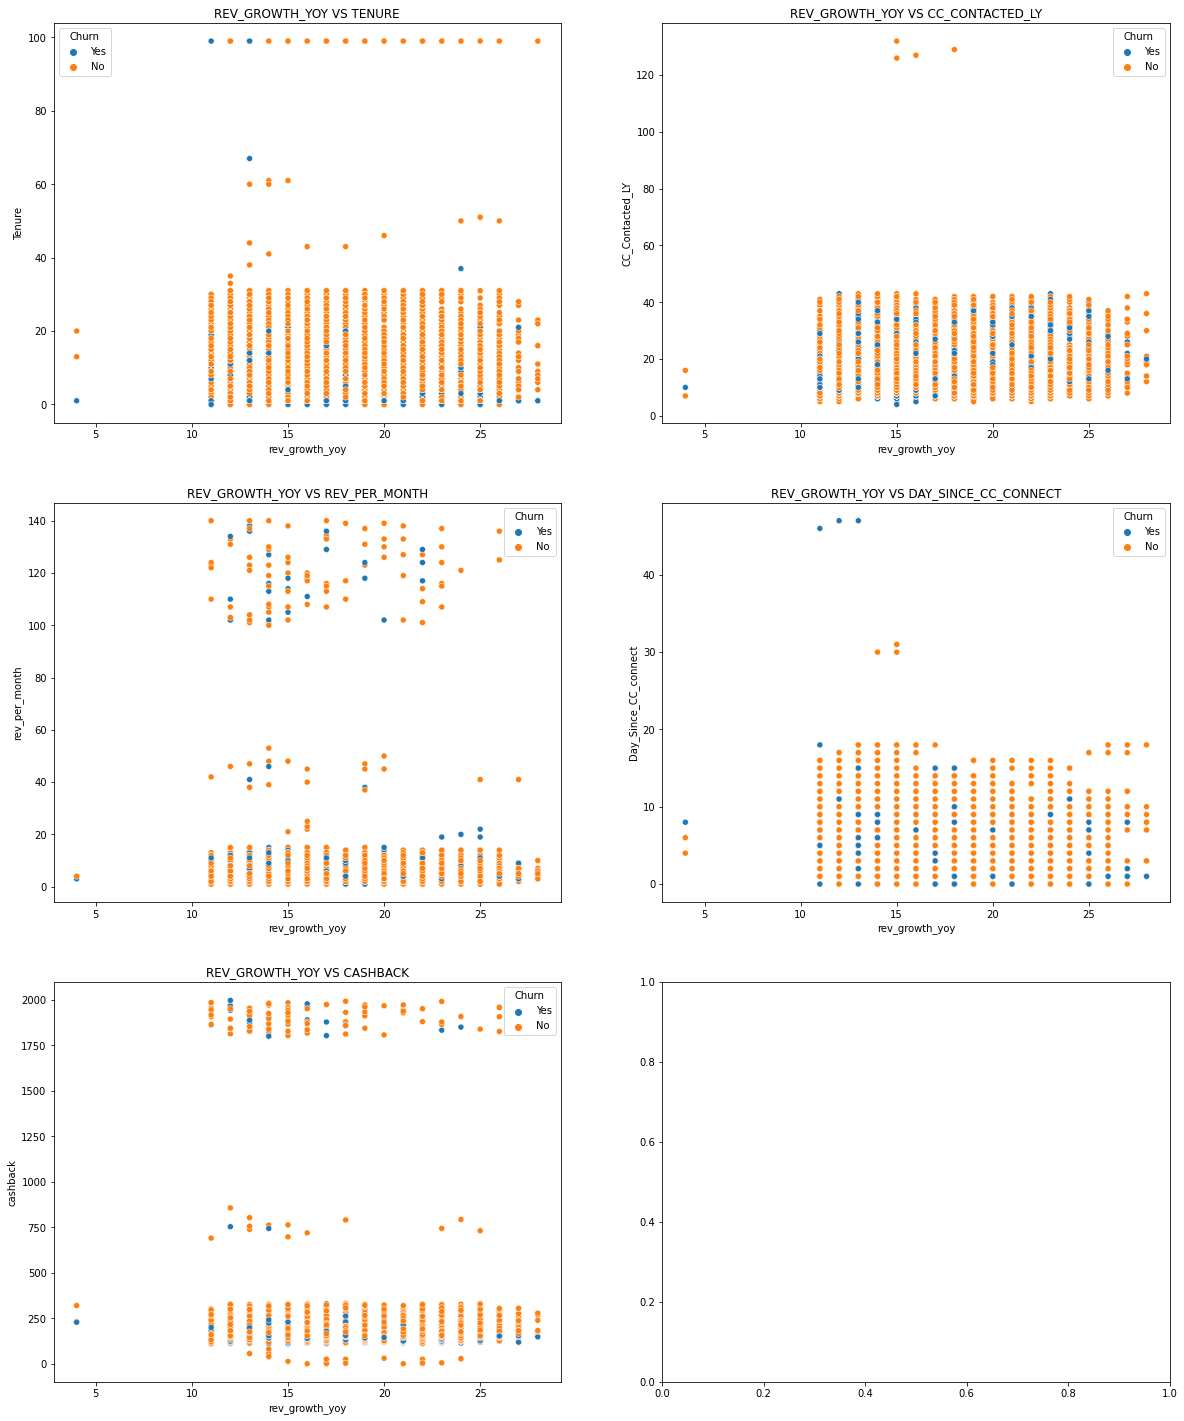

In [ ]:
# rev_growth_yoy vs num variables
x = 'rev_growth_yoy'
y = [i for i in col_list if i != x]
fig,axes = plt.subplots(3,2,figsize = (20,25))
for i,j in zip(y,axes.flatten()):
    sns.scatterplot(x = x,y = i,data = data2,ax = j,hue = 'Churn')
    j.set_title('{} VS {}'.format(x.upper(),i.upper()))

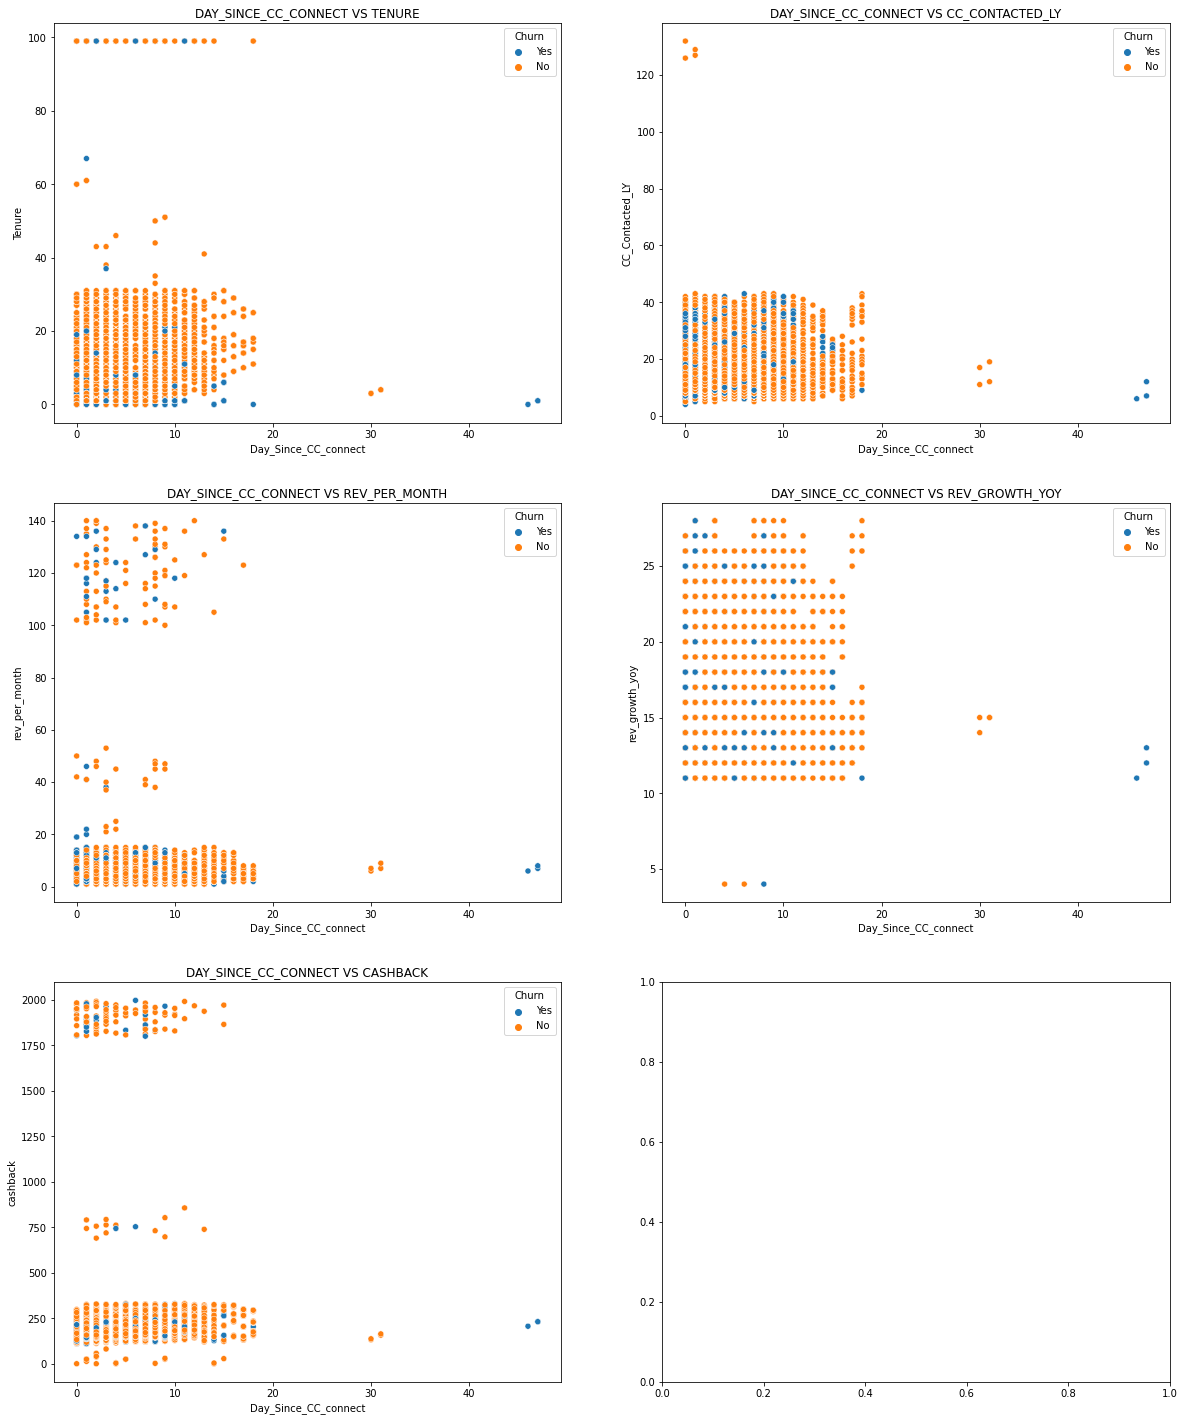

In [ ]:
# Day since CC connect vs num variables
x = 'Day_Since_CC_connect'
y = [i for i in col_list if i != x]
fig,axes = plt.subplots(3,2,figsize = (20,25))
for i,j in zip(y,axes.flatten()):
    sns.scatterplot(x = x,y = i,data = data2,ax = j,hue = 'Churn')
    j.set_title('{} VS {}'.format(x.upper(),i.upper()))

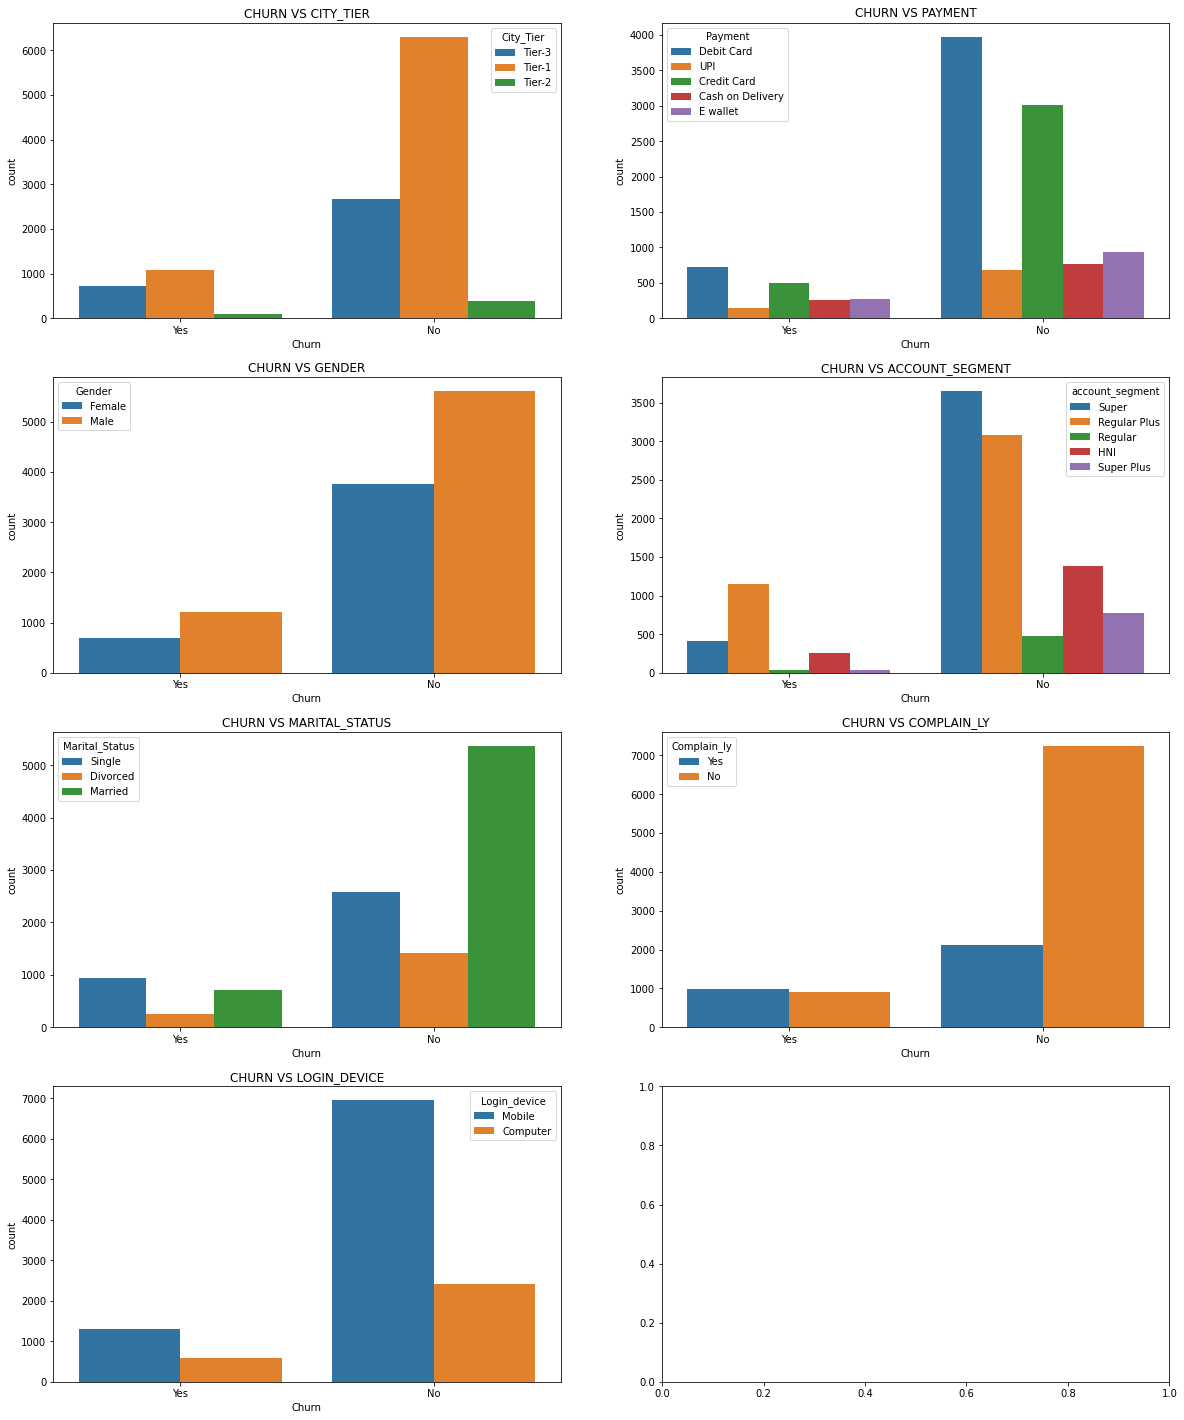

In [ ]:
#Churn comp
x = 'Churn'
y = [i for i in cat if i != x]
fig,axes = plt.subplots(4,2,figsize = (20,25))
for i,j in zip(y,axes.flatten()):
    sns.countplot(x = x,data = data2,ax = j,hue = i)
    j.set_title('{} VS {}'.format(x.upper(),i.upper()))

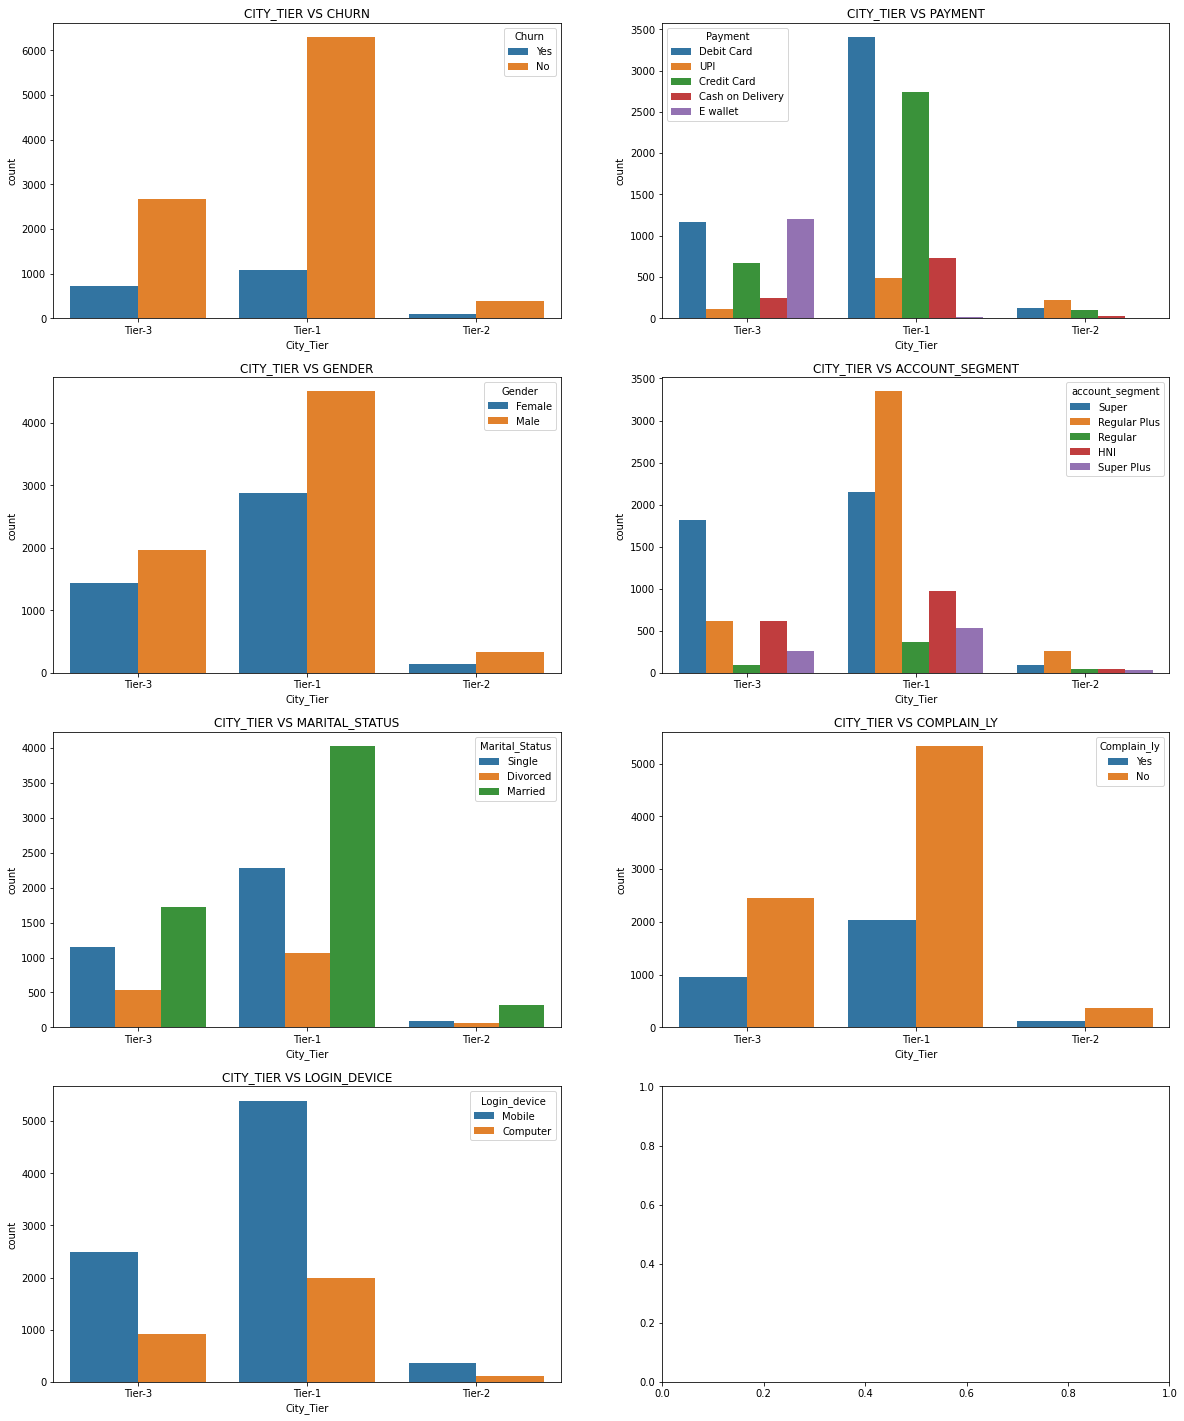

In [ ]:
x = 'City_Tier'
y = [i for i in cat if i != x]
fig,axes = plt.subplots(4,2,figsize = (20,25))
for i,j in zip(y,axes.flatten()):
    sns.countplot(x = x,data = data2,ax = j,hue = i)
    j.set_title('{} VS {}'.format(x.upper(),i.upper()))

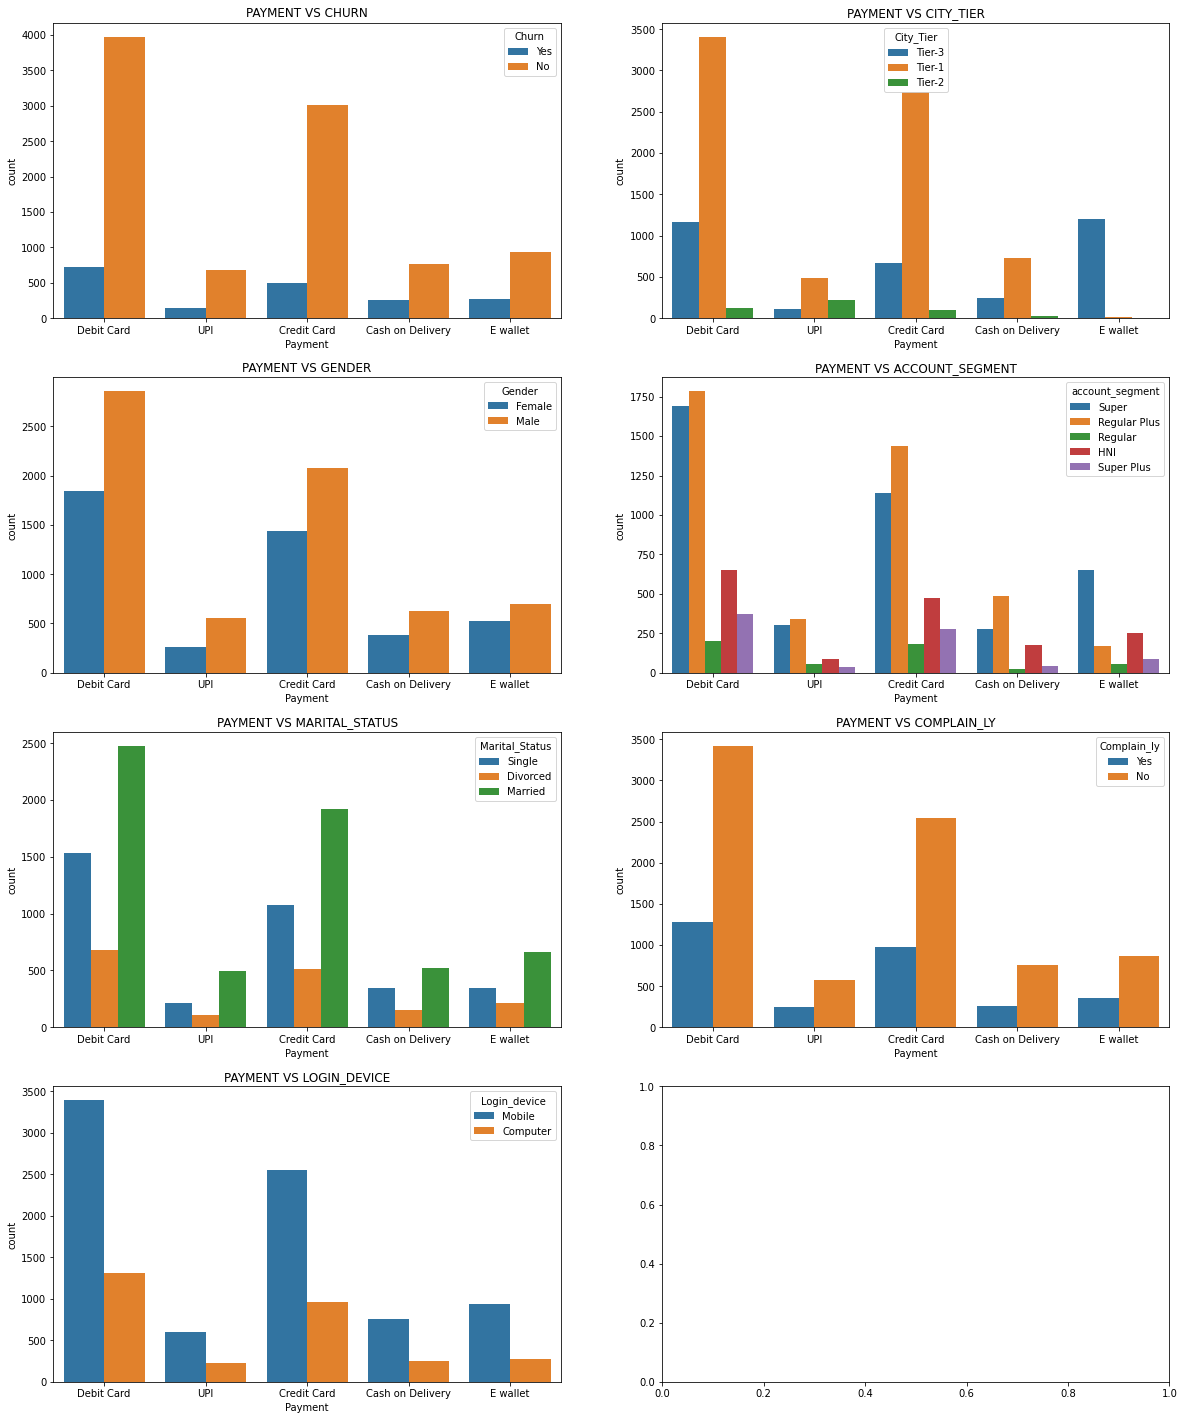

In [ ]:
x = 'Payment'
y = [i for i in cat if i != x]
fig,axes = plt.subplots(4,2,figsize = (20,25))
for i,j in zip(y,axes.flatten()):
    sns.countplot(x = x,data = data2,ax = j,hue = i)
    j.set_title('{} VS {}'.format(x.upper(),i.upper()))

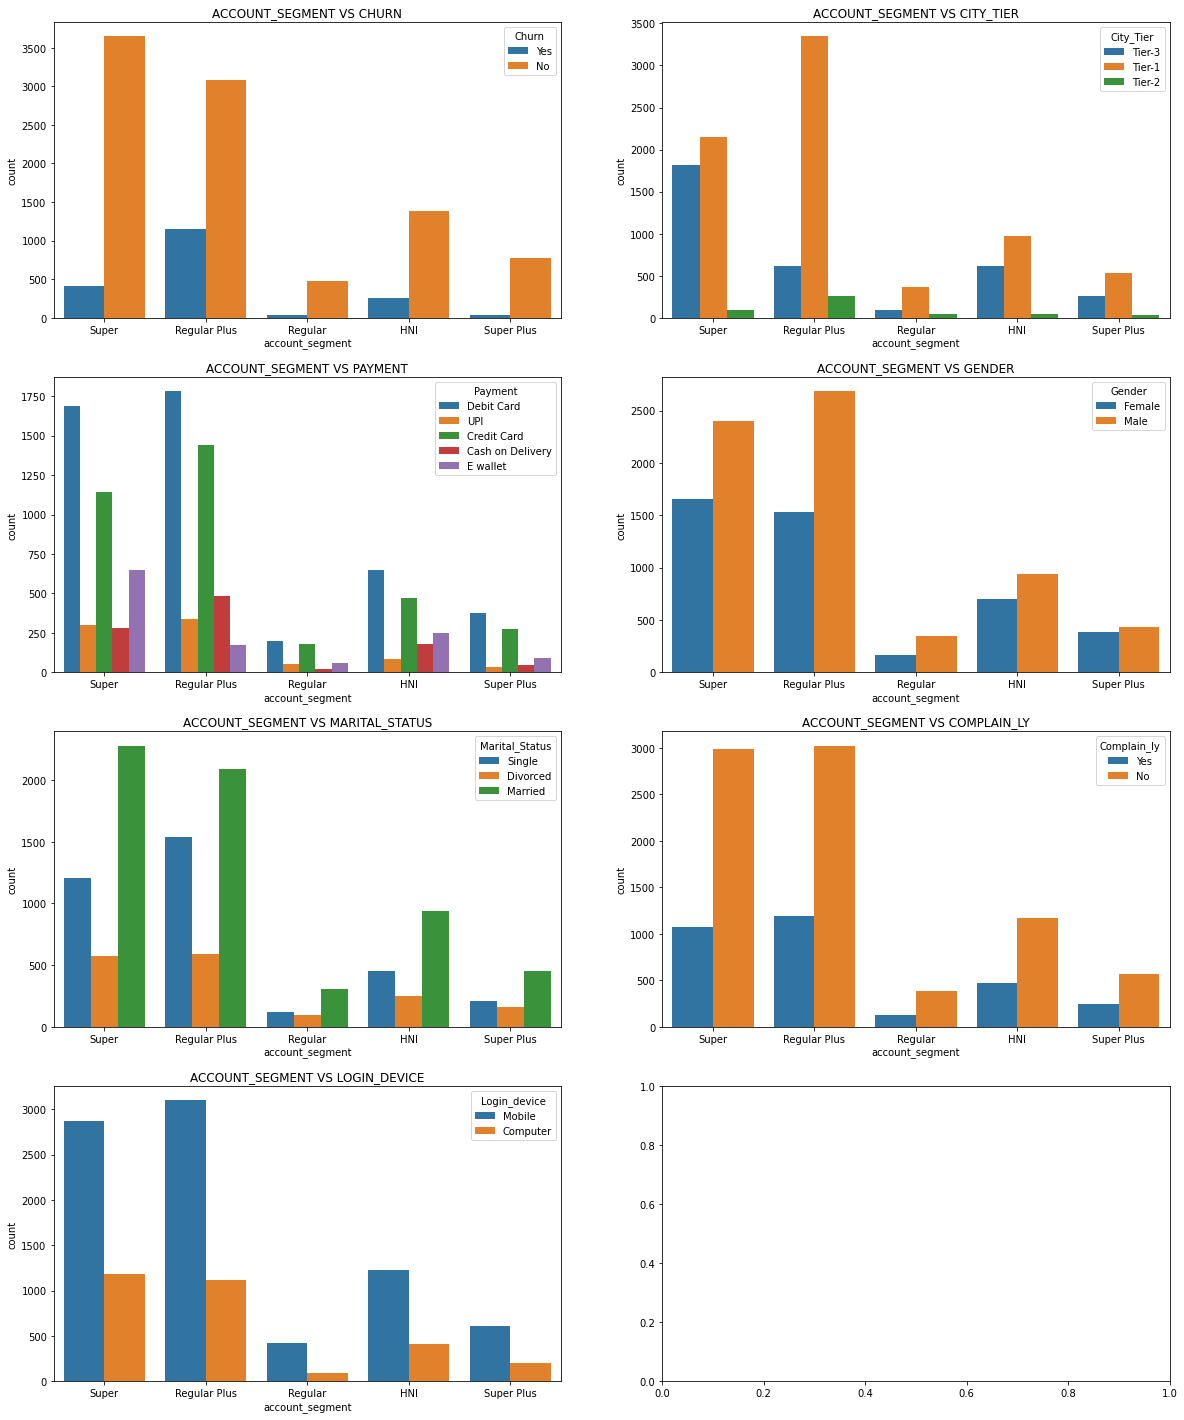

In [ ]:
x = 'account_segment'
y = [i for i in cat if i != x]
fig,axes = plt.subplots(4,2,figsize = (20,25))
for i,j in zip(y,axes.flatten()):
    sns.countplot(x = x,data = data2,ax = j,hue = i)
    j.set_title('{} VS {}'.format(x.upper(),i.upper()))

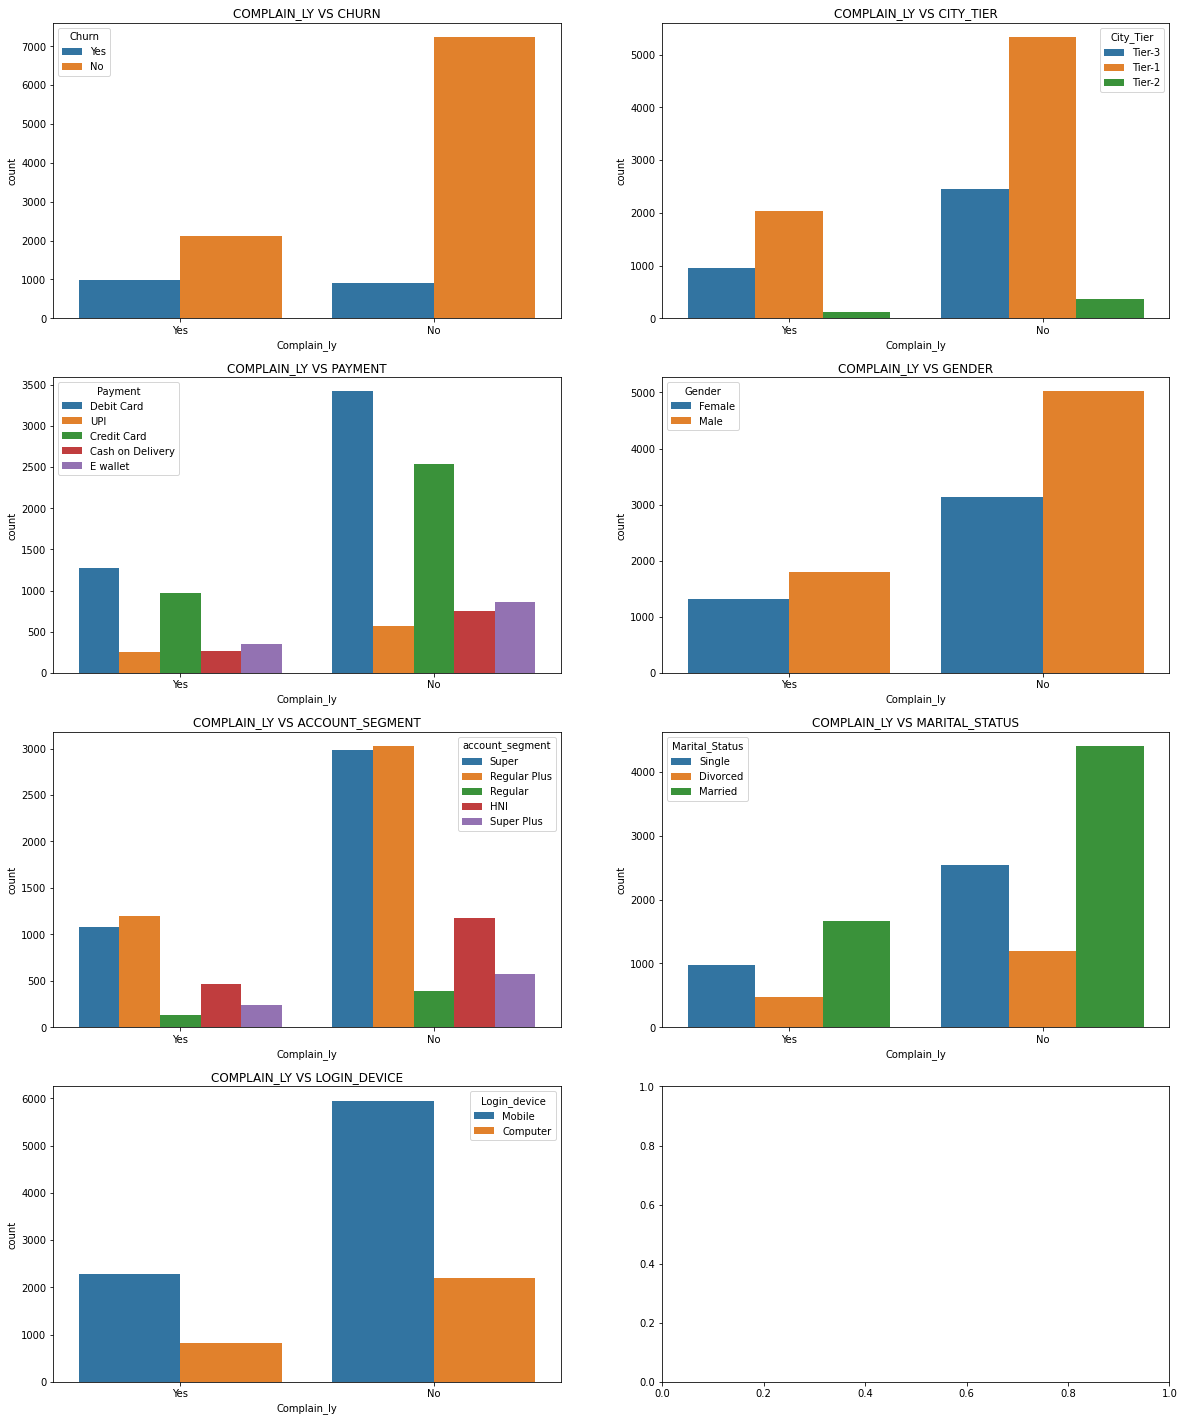

In [ ]:
x = 'Complain_ly'
y = [i for i in cat if i != x]
fig,axes = plt.subplots(4,2,figsize = (20,25))
for i,j in zip(y,axes.flatten()):
    sns.countplot(x = x,data = data2,ax = j,hue = i)
    j.set_title('{} VS {}'.format(x.upper(),i.upper()))

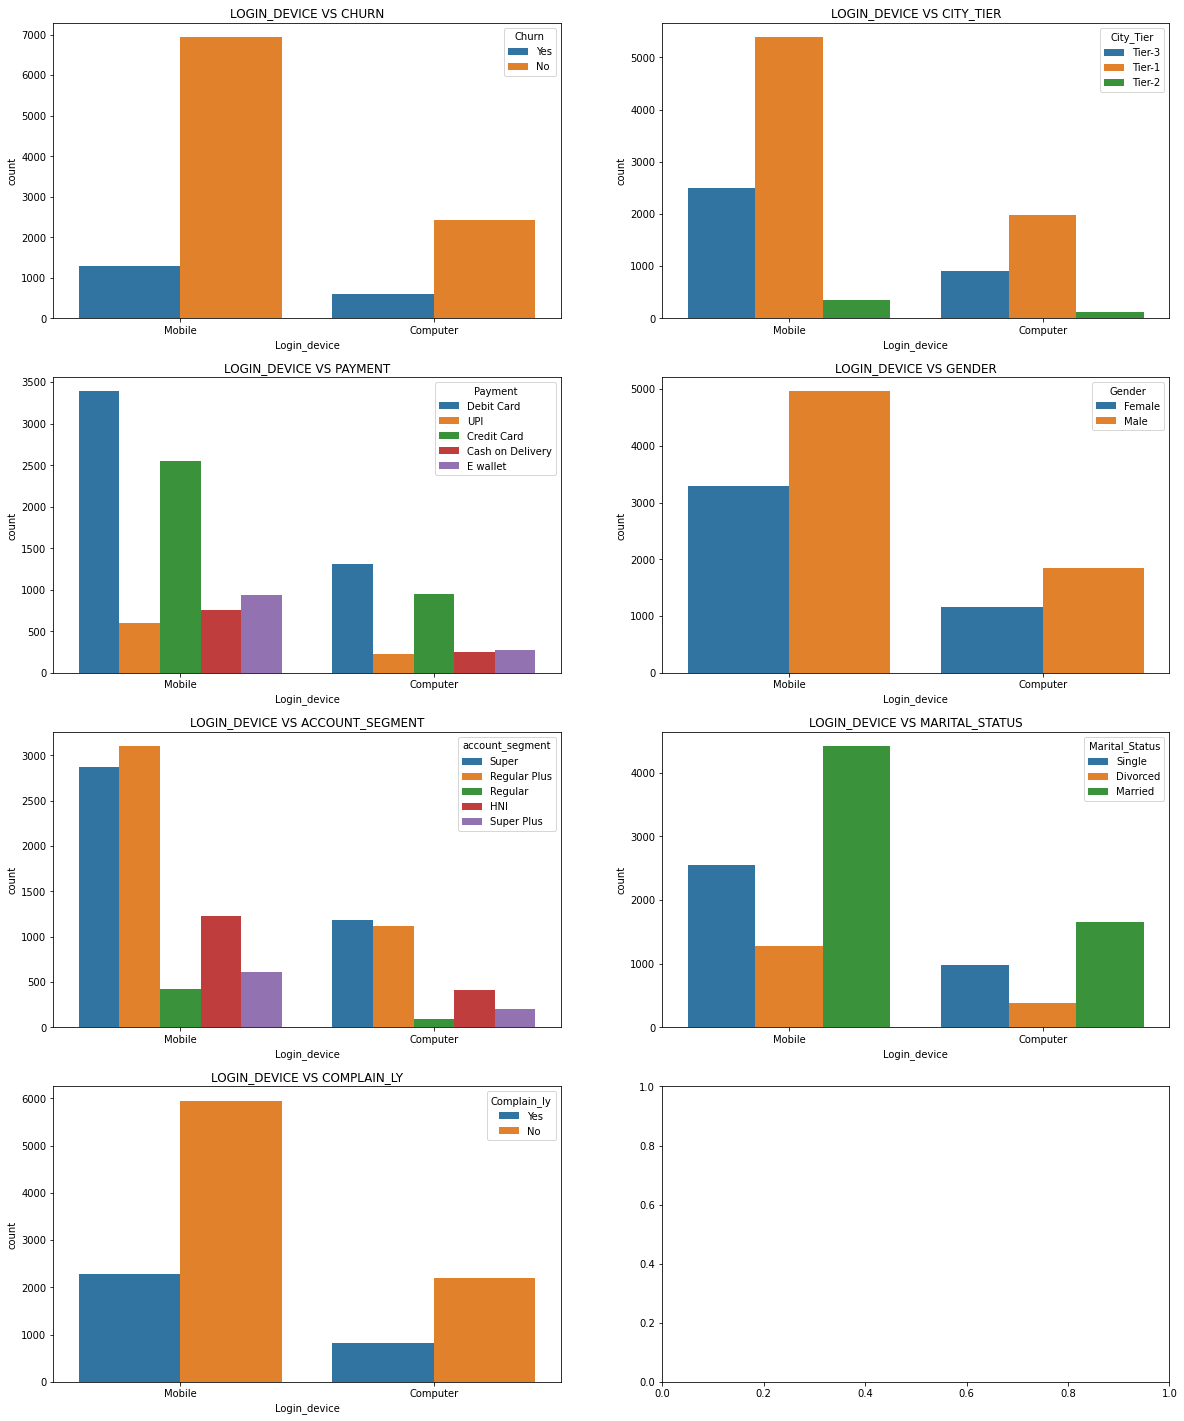

In [ ]:
x = 'Login_device'
y = [i for i in cat if i != x]
fig,axes = plt.subplots(4,2,figsize = (20,25))
for i,j in zip(y,axes.flatten()):
    sns.countplot(x = x,data = data2,ax = j,hue = i)
    j.set_title('{} VS {}'.format(x.upper(),i.upper()))

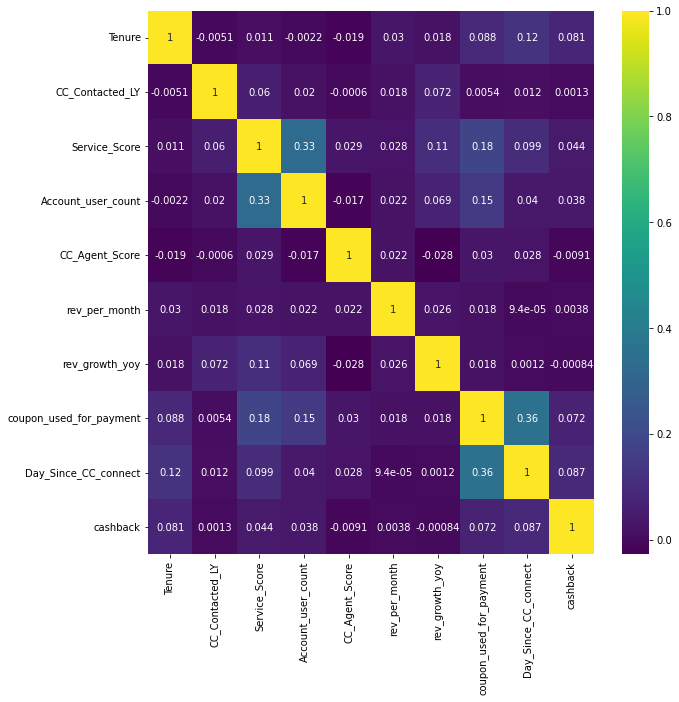

In [ ]:
# Correlation plot
fig,axes = plt.subplots(figsize=(10,10))
sns.heatmap(data2.corr(),annot = True,cmap = 'viridis')

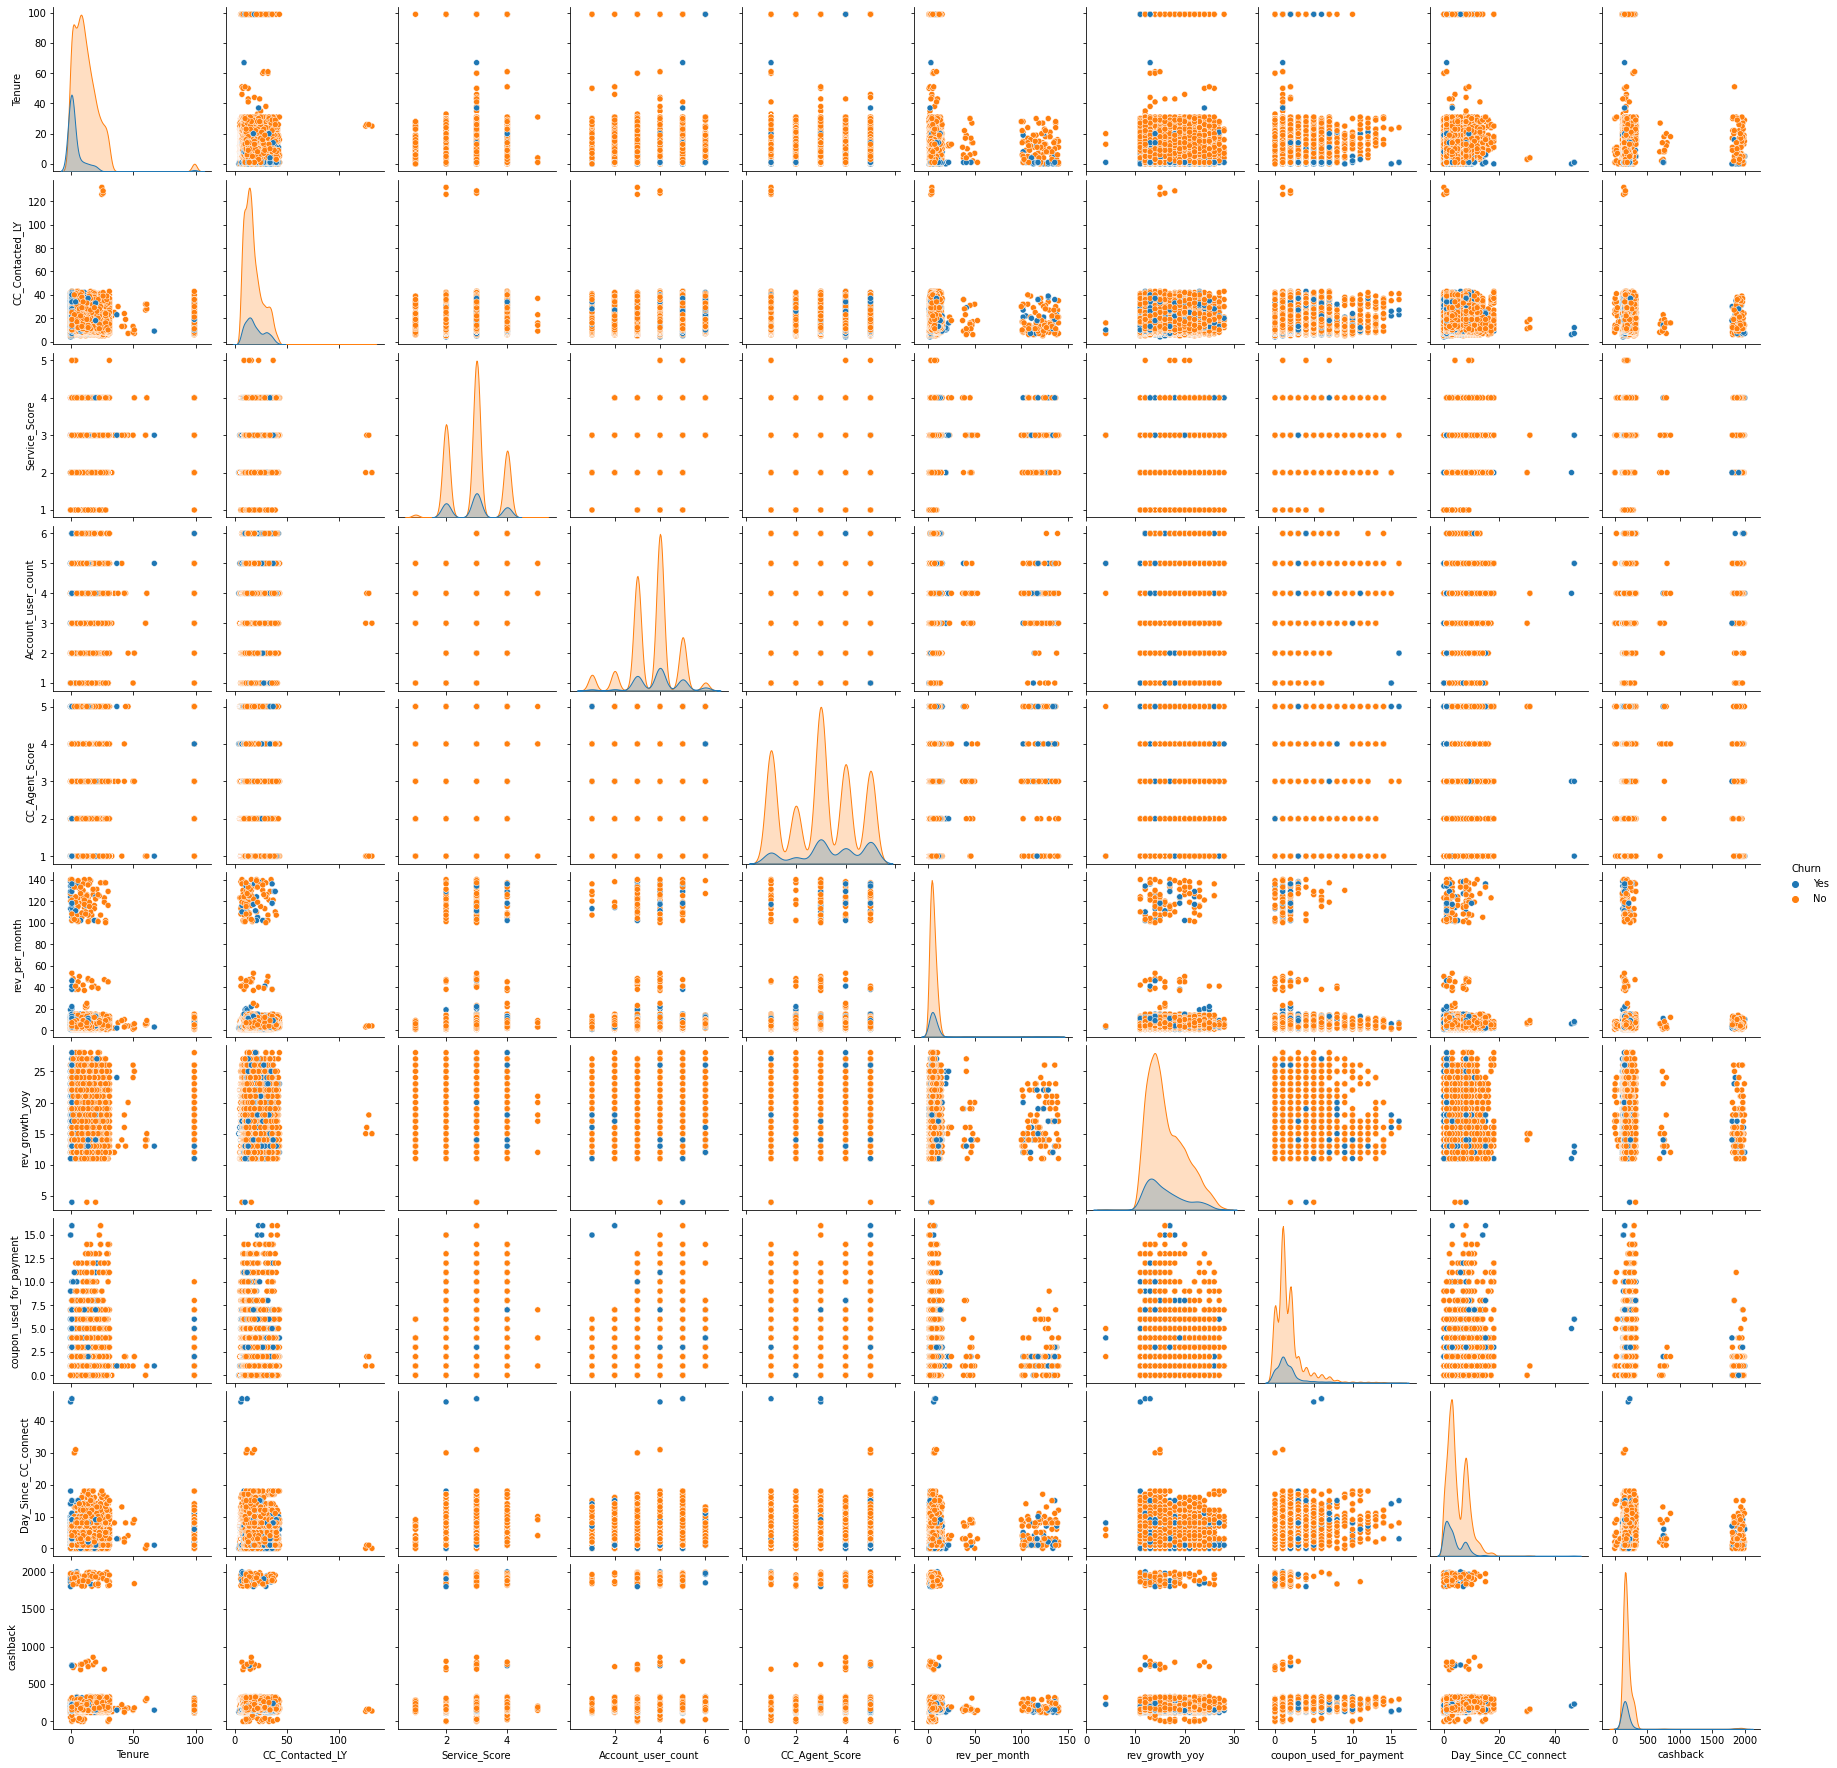

In [ ]:
# Pairplot
sns.pairplot(data2,hue='Churn')

In [ ]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
data2_num_std = pd.DataFrame(std_scaler.fit_transform(data2[col_list]),columns = list(data2[col_list].columns))

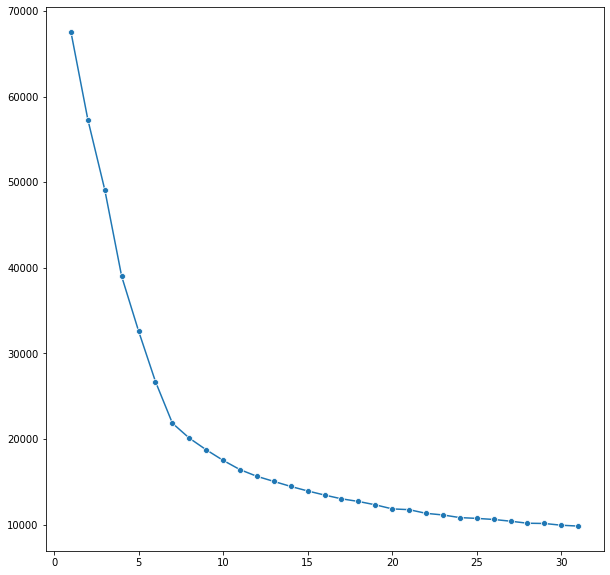

In [ ]:
from sklearn.cluster import KMeans
SSD = []

for i in range(1,32):
    km = KMeans(n_clusters = i)
    km = km.fit(data2_num_std)
    SSD.append(km.inertia_)
fig,axes = plt.subplots(figsize=(10,10))
sns.lineplot(y = SSD,x = range(1,32),sort=False,marker = 'o')

Text(0.5, 1.0, 'Silhouette Score Plot')

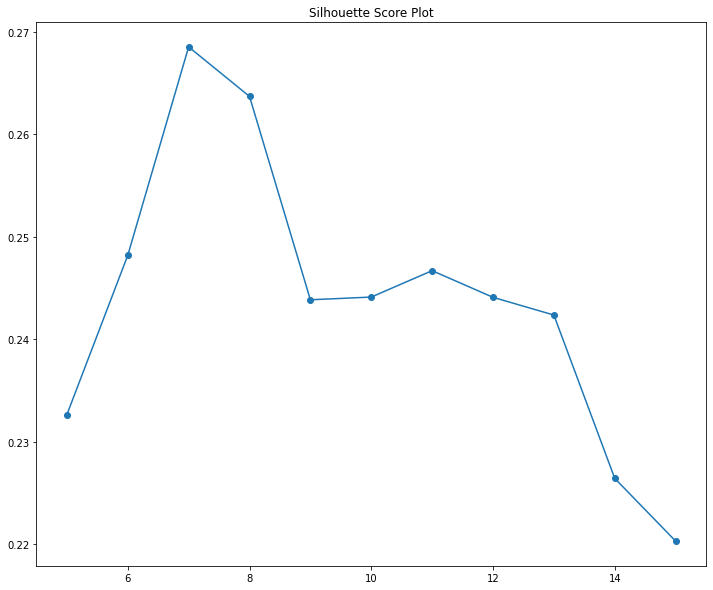

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
sil_score = []
for i in range(5,16):
    k_means = KMeans(n_clusters = i,random_state=1234)
    k_means.fit(data2_num_std)
    clus = k_means.labels_
    sil_score.append(silhouette_score(data2_num_std,labels = clus))
fig,axes = plt.subplots(figsize=(12,10))
plt.plot(range(5,16),sil_score,marker='o')
axes.set_title('Silhouette Score Plot')

In [ ]:
clus_model = KMeans(n_clusters=7,random_state=1234)
clus_model.fit(data2_num_std)
data2['Cluster_labels'] = clus_model.labels_
#data2_q['Cluster_labels'] = clus_model.labels_

data2['Cluster_labels'] = data2['Cluster_labels'].map({0:'Cluster-1',1:'Cluster-2',2:'Cluster-3',3:'Cluster-4',4:'Cluster-5',5:'Cluster-6',6:'Cluster-7'})
#data2_q['Cluster_labels'] = data2_q['Cluster_labels'].map({0:'Cluster-1',1:'Cluster-2',2:'Cluster-3',3:'Cluster-4',4:'Cluster-5',5:'Cluster-6',6:'Cluster-7'})

In [ ]:
#data2_q['Cluster_labels'].unique()

Text(0.5, 1.0, 'Size of the Clusters')

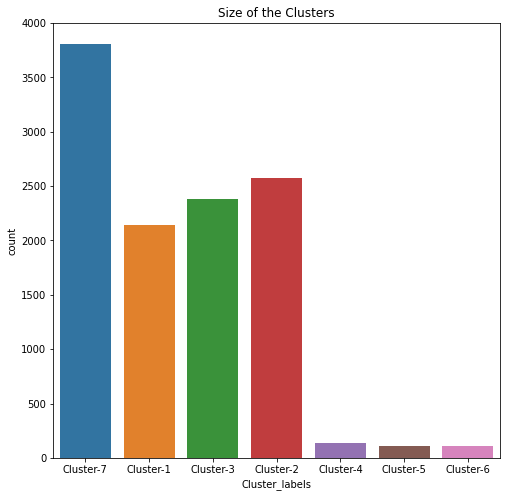

In [ ]:
fig,axes = plt.subplots(figsize=(8,8))
sns.countplot(x = 'Cluster_labels',data = data2)
axes.set_title('Size of the Clusters')

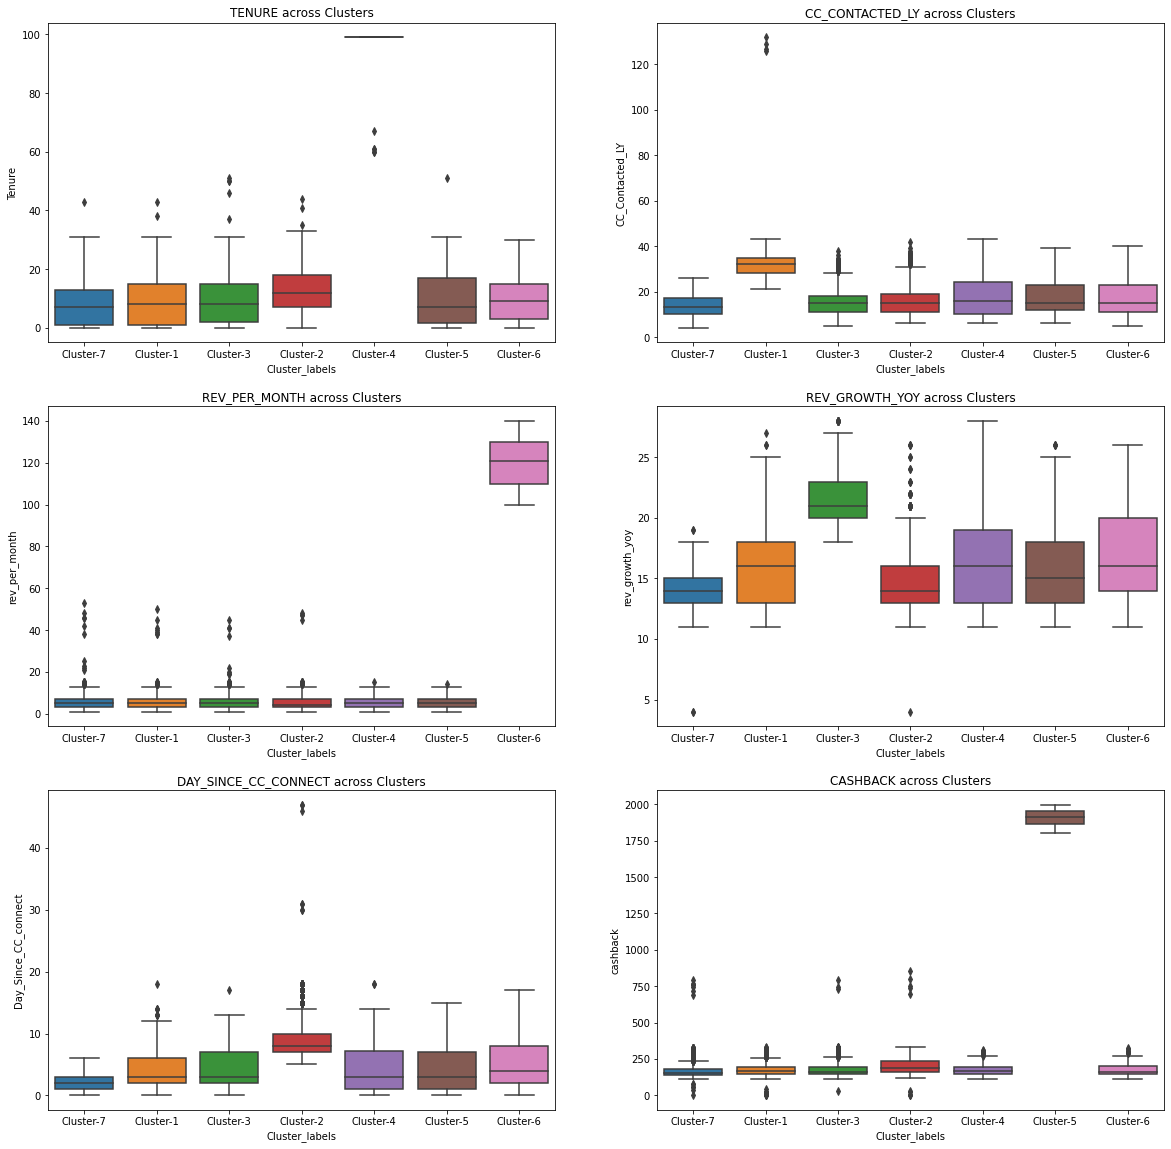

In [ ]:
# Looking at the clusters behaviour across the numeric variables - boxplot
fig,axes = plt.subplots(3,2,figsize=(20,20))
#plt.subplots_adjust(wspace=0.2,hspace=0.2)
for i,j in zip(col_list,axes.flatten()):
    sns.boxplot(x = 'Cluster_labels',y = i,data = data2,ax = j)
    j.set_title('{} across Clusters'.format(i.upper()))

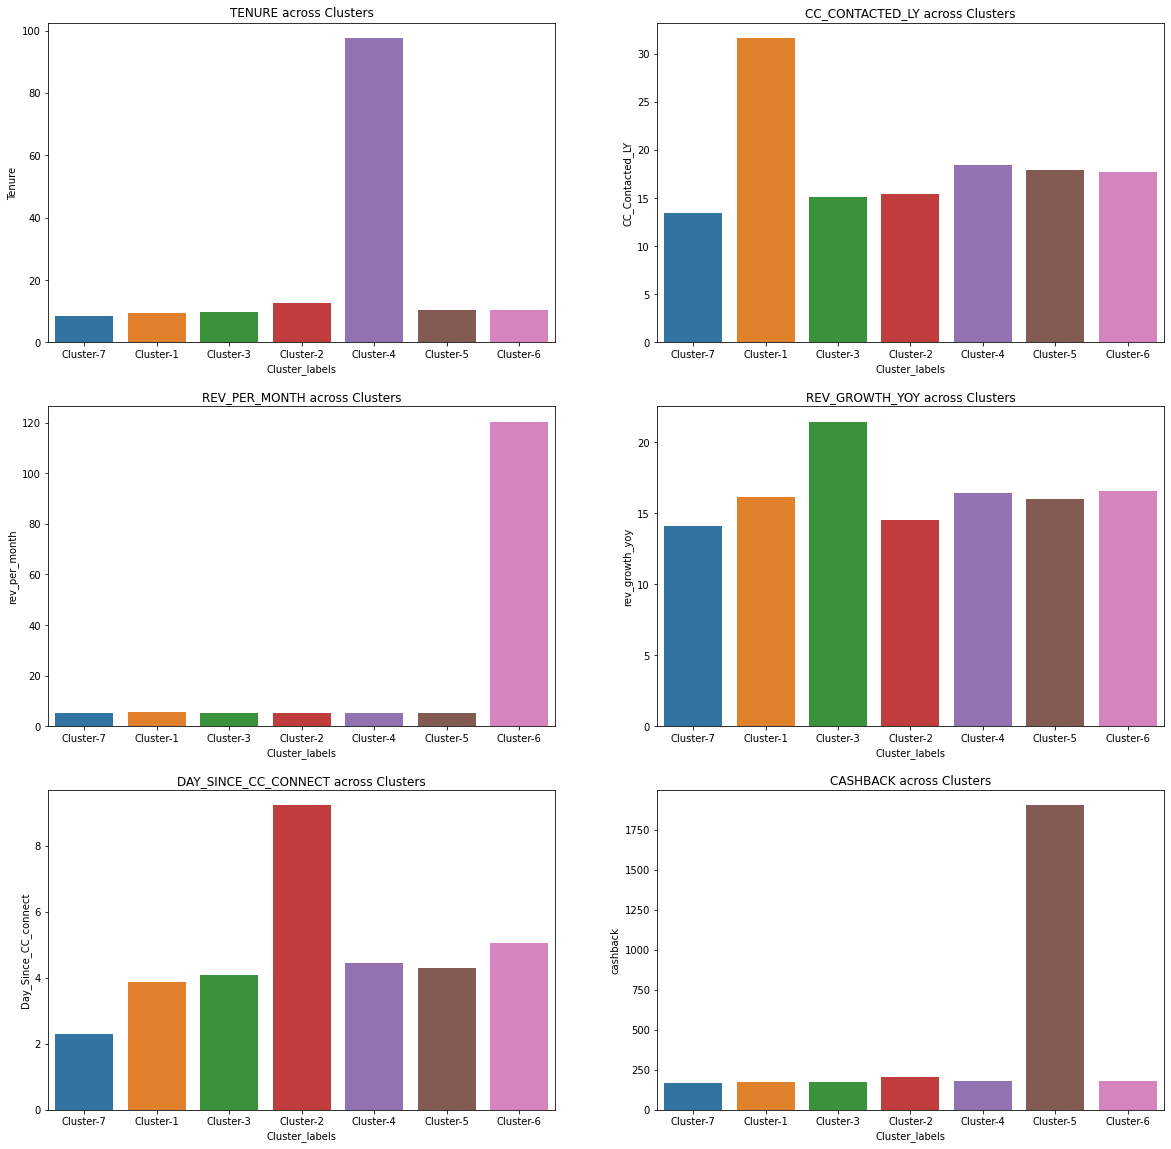

In [ ]:
# Looking at the clusters behaviour across the numeric variables - barplot
fig,axes = plt.subplots(3,2,figsize=(20,20))
#plt.subplots_adjust(wspace=0.2,hspace=0.2)
for i,j in zip(col_list,axes.flatten()):
    sns.barplot(x = 'Cluster_labels',y = i,data = data2,ax = j,ci=None)
    j.set_title('{} across Clusters'.format(i.upper()))

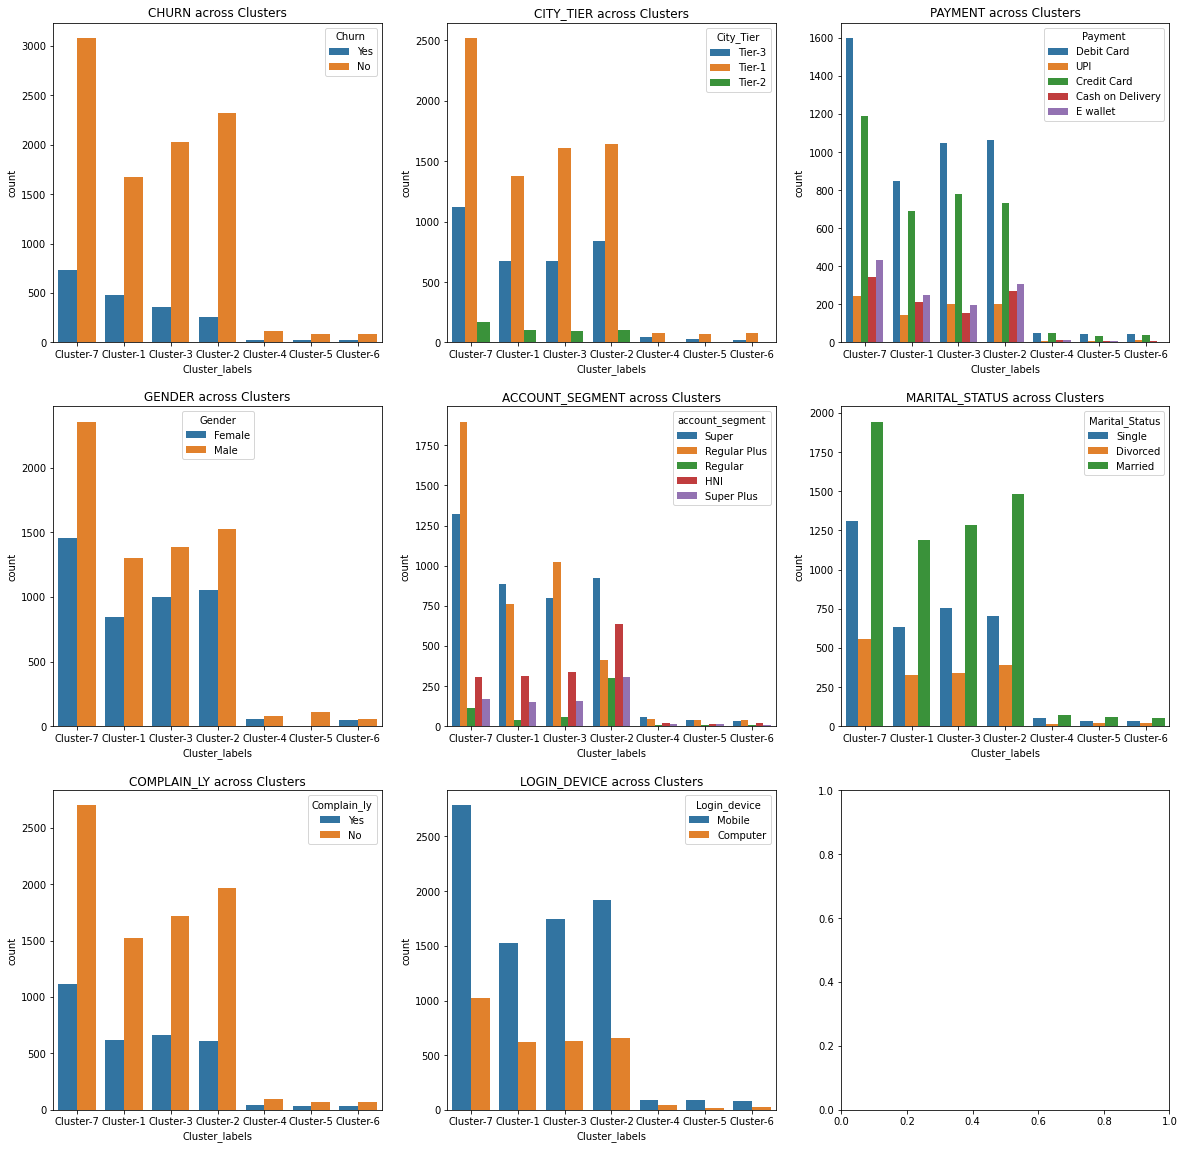

In [ ]:
# Count analysis with clusters - across service parmaeters
fig,axes = plt.subplots(3,3,figsize=(20,20))
#plt.subplots_adjust(wspace=0.2,hspace=0.2)
for i,j in zip(cat,axes.flatten()):
    sns.countplot(x = 'Cluster_labels',data = data2,ax = j,hue = i)
    j.set_title('{} across Clusters'.format(i.upper()))

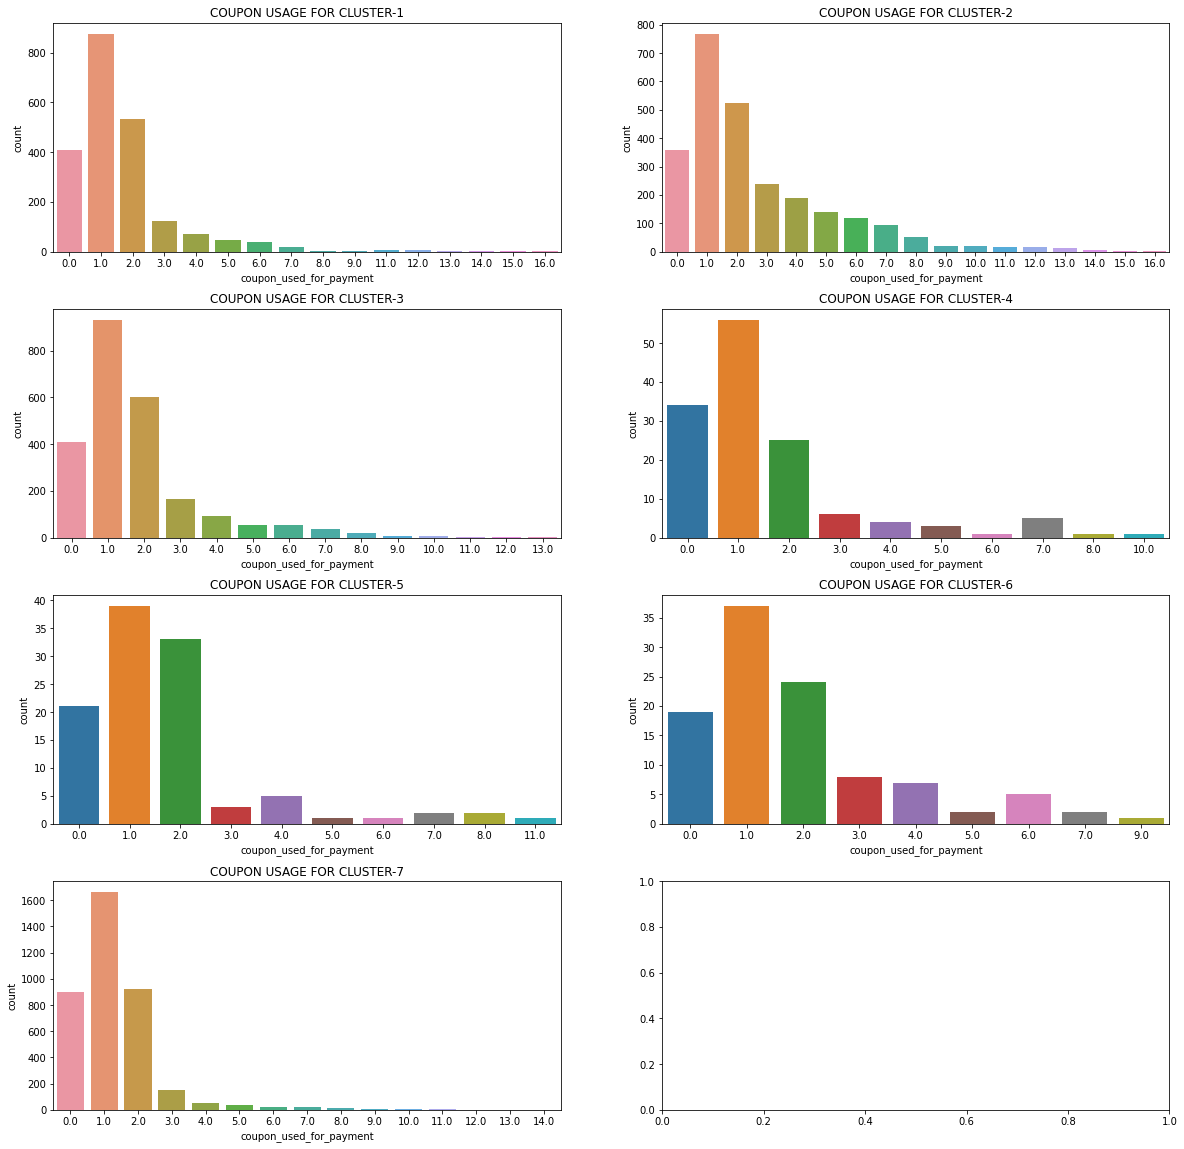

In [ ]:
# Which Clusters uses Coupons
clusts = ['Cluster-1','Cluster-2','Cluster-3','Cluster-4','Cluster-5','Cluster-6','Cluster-7']
fig,axes = plt.subplots(4,2,figsize=(20,20))
plt.subplots_adjust(hspace=0.25)
for i,j in zip(clusts,axes.flatten()):
    sns.countplot(x = 'coupon_used_for_payment',data = data2[data2['Cluster_labels'] == i],ax=j)
    j.set_title('COUPON USAGE FOR {}'.format(i.upper()))

In [ ]:
data3 = data2.copy()
data3.drop('Cluster_labels',axis=1,inplace=True)
data3.head()

Tenure  CC_Contacted_LY  ...  Complain_ly  Login_device
0     4.0              6.0  ...          Yes        Mobile
1     0.0              8.0  ...          Yes        Mobile
2     0.0             30.0  ...          Yes        Mobile
3     0.0             15.0  ...           No        Mobile
4     0.0             12.0  ...           No        Mobile

[5 rows x 18 columns]

In [ ]:
# Encoding the Dataset
data3['Churn'] = data2['Churn'].map({'Yes':1,'No':0})
data3['City_Tier'] = data2['City_Tier'].map({'Tier-1':3,'Tier-2':2,'Tier-3':1})
data3['Gender'] = data2['Gender'].map({'Male':1,'Female':0})
data3['account_segment'] = data2['account_segment'].map({'Regular':1,'Regular Plus':2,'HNI':3,'Super':4,'Super Plus':5})
data3['Complain_ly'] = data2['Complain_ly'].map({'No':0,'Yes':1})

In [ ]:
# Dummification of listed variables
data3 = pd.get_dummies(data3,columns = ['Payment','Marital_Status','Login_device'],drop_first=True)
data3.shape

(11260, 22)

In [ ]:
data3.head()

Tenure  CC_Contacted_LY  ...  Marital_Status_Single  Login_device_Mobile
0     4.0              6.0  ...                      1                    1
1     0.0              8.0  ...                      1                    1
2     0.0             30.0  ...                      1                    1
3     0.0             15.0  ...                      1                    1
4     0.0             12.0  ...                      1                    1

[5 rows x 22 columns]

In [ ]:
X = data3.drop('Churn',axis=1)
y = data3['Churn']

In [ ]:
import statsmodels.api as sm
logit_mod = sm.Logit(y,X)
result = logit_mod.fit()
coef_summary = pd.DataFrame(result.params,columns=['Coef'])
coef_summary['Pvalue'] = result.pvalues
coef_summary['Odds'] = np.exp(coef_summary['Coef'])
coef_summary['Prob_churn'] = coef_summary['Odds']/(coef_summary['Odds']+1)
coef_summary

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Optimization terminated successfully.
         Current function value: 0.320933
         Iterations 7


Coef         Pvalue      Odds  Prob_churn
Tenure                  -0.113653  2.250985e-116  0.892567    0.471617
CC_Contacted_LY          0.031134   1.374950e-21  1.031623    0.507783
Service_Score           -0.106451   1.626342e-02  0.899019    0.473412
Account_user_count       0.316499   4.913294e-23  1.372314    0.578471
CC_Agent_Score           0.256725   7.386063e-32  1.292690    0.563831
rev_per_month            0.008836   1.113974e-04  1.008875    0.502209
rev_growth_yoy          -0.032270   2.276965e-05  0.968245    0.491933
coupon_used_for_payment  0.126390   7.155372e-13  1.134725    0.531556
Day_Since_CC_connect    -0.090671   5.095055e-17  0.913318    0.477348
cashback                 0.000075   6.557341e-01  1.000075    0.500019
City_Tier               -0.391849   1.312435e-28  0.675806    0.403272
Gender                   0.256872   3.528126e-05  1.292880    0.563867
account_segment         -0.551589   4.863000e-67  0.576034    0.365496
Complain_ly              1.583913  6.500797e-141  4.873991    0.829758
Payment_Credit Card     -0.693272   1.802097e-11  0.499938    0.333306
Payment_Debit Card      -0.553333   2.209799e-08  0.575030    0.365091
Payment_E wallet        -0.240980   5.788310e-02  0.785857    0.440045
Payment_UPI             -0.672410   1.683699e-06  0.510477    0.337957
Marital_Status_Married  -0.312078   3.811034e-04  0.731924    0.422608
Marital_Status_Single    0.664409   4.112361e-14  1.943341    0.660250
Login_device_Mobile     -0.414729   1.741200e-10  0.660519    0.397779

In [ ]:
# Log reg analysis on Cluster-1
data3_Clus1 = data3[data2['Cluster_labels'] == 'Cluster-1']
data3_Clus1.head()

Tenure  CC_Contacted_LY  ...  Marital_Status_Single  Login_device_Mobile
2      0.0             30.0  ...                      1                    1
9      0.0             31.0  ...                      1                    1
21    20.0             29.0  ...                      0                    1
22     0.0             28.0  ...                      1                    1
23     0.0             26.0  ...                      0                    1

[5 rows x 22 columns]

In [ ]:
X = data3_Clus1.drop('Churn',axis=1)
y = data3_Clus1['Churn']
logit_mod = sm.Logit(y,X)
result = logit_mod.fit()
coef_summary = pd.DataFrame(result.params,columns=['Coef'])
coef_summary['Pvalue'] = result.pvalues
coef_summary['Odds'] = np.exp(coef_summary['Coef'])
coef_summary['Prob_churn'] = coef_summary['Odds']/(coef_summary['Odds']+1)
coef_summary[coef_summary['Pvalue']<=0.05]

Optimization terminated successfully.
         Current function value: 0.301490
         Iterations 8


Coef        Pvalue       Odds  Prob_churn
Tenure                  -0.218383  4.662713e-43   0.803818    0.445620
Account_user_count       0.210178  3.393122e-03   1.233897    0.552352
CC_Agent_Score           0.388266  1.910228e-11   1.474421    0.595865
coupon_used_for_payment  0.220743  3.385309e-05   1.247003    0.554963
Day_Since_CC_connect    -0.132715  5.889382e-06   0.875715    0.466870
City_Tier               -0.378995  2.232745e-05   0.684549    0.406369
Gender                   0.403912  7.401591e-03   1.497673    0.599627
account_segment         -0.506176  1.611448e-08   0.602797    0.376090
Complain_ly              2.410886  4.161733e-49  11.143829    0.917654
Payment_E wallet         0.939909  4.819730e-03   2.559747    0.719081
Marital_Status_Single    0.835201  1.018776e-04   2.305278    0.697454
Login_device_Mobile     -0.886874  2.794608e-08   0.411941    0.291755

In [ ]:
CData = pd.read_excel('drive/MyDrive/Great_Learning/Capstone/ReData.xlsx')

In [ ]:
CData.head()

Unnamed: 0  AccountID  Tenure  ...  Marital_Status  Complain_ly  Login_device
0           0      20000       4  ...          Single          Yes        Mobile
1           1      20001       0  ...          Single          Yes        Mobile
2           2      20002       0  ...          Single          Yes        Mobile
3           3      20003       0  ...          Single           No        Mobile
4           4      20004       0  ...          Single           No        Mobile

[5 rows x 20 columns]

In [ ]:
CData.drop(['Unnamed: 0','AccountID'],axis=1,inplace=True)
CData.head()

Tenure  CC_Contacted_LY  ...  Complain_ly  Login_device
0       4                6  ...          Yes        Mobile
1       0                8  ...          Yes        Mobile
2       0               30  ...          Yes        Mobile
3       0               15  ...           No        Mobile
4       0               12  ...           No        Mobile

[5 rows x 18 columns]

In [ ]:
def calculate_limit(col):
    sorted(col)
    Q1,Q3 = col.quantile([0.25,0.75])
    IQR = Q3-Q1
    lower_limit = Q1 - (1.5*IQR)
    upper_limit = Q3 + (1.5*IQR)
    return lower_limit, upper_limit

In [ ]:
ll_Tenure ,ul_Tenure = calculate_limit(CData['Tenure'])
ll_CC_Contacted_LY ,ul_CC_Contacted_LY = calculate_limit(CData['CC_Contacted_LY'])
ll_Service_Score ,ul_Service_Score = calculate_limit(CData['Service_Score'])
ll_Account_user_count ,ul_Account_user_count = calculate_limit(CData['Account_user_count'])
ll_rev_per_month ,ul_rev_per_month = calculate_limit(CData['rev_per_month'])
ll_coupon_used_for_payment ,ul_coupon_used_for_payment = calculate_limit(CData['coupon_used_for_payment'])
ll_Day_Since_CC_connect ,ul_Day_Since_CC_connect = calculate_limit(CData['Day_Since_CC_connect'])
ll_cashback ,ul_cashback = calculate_limit(CData['cashback'])

In [ ]:
CData['Tenure']=np.where(CData['Tenure']<ll_Tenure, ll_Tenure, CData['Tenure'])
CData['Tenure']=np.where(CData['Tenure']>ul_Tenure, ul_Tenure, CData['Tenure'])
CData['CC_Contacted_LY']=np.where(CData['CC_Contacted_LY']<ll_CC_Contacted_LY, ll_CC_Contacted_LY, CData['CC_Contacted_LY'])
CData['CC_Contacted_LY']=np.where(CData['CC_Contacted_LY']>ul_CC_Contacted_LY, ul_CC_Contacted_LY, CData['CC_Contacted_LY'])
CData['Service_Score']=np.where(CData['Service_Score']<ll_Service_Score, ll_Service_Score, CData['Service_Score'])
CData['Service_Score']=np.where(CData['Service_Score']>ul_Service_Score, ul_Service_Score, CData['Service_Score'])
CData['Account_user_count']=np.where(CData['Account_user_count']<ll_Account_user_count, ll_Account_user_count, CData['Account_user_count'])
CData['Account_user_count']=np.where(CData['Account_user_count']>ul_Account_user_count, ul_Account_user_count, CData['Account_user_count'])
CData['rev_per_month']=np.where(CData['rev_per_month']<ll_rev_per_month, ll_rev_per_month, CData['rev_per_month'])
CData['rev_per_month']=np.where(CData['rev_per_month']>ul_rev_per_month, ul_rev_per_month, CData['rev_per_month'])
CData['coupon_used_for_payment']=np.where(CData['coupon_used_for_payment']<ll_coupon_used_for_payment, ll_coupon_used_for_payment, CData['coupon_used_for_payment'])
CData['coupon_used_for_payment']=np.where(CData['coupon_used_for_payment']>ul_coupon_used_for_payment, ul_coupon_used_for_payment, CData['coupon_used_for_payment'])
CData['Day_Since_CC_connect']=np.where(CData['Day_Since_CC_connect']<ll_Day_Since_CC_connect, ll_Day_Since_CC_connect, CData['Day_Since_CC_connect'])
CData['Day_Since_CC_connect']=np.where(CData['Day_Since_CC_connect']>ul_Day_Since_CC_connect, ul_Day_Since_CC_connect, CData['Day_Since_CC_connect'])
CData['cashback']=np.where(CData['cashback']<ll_cashback, ll_cashback, CData['cashback'])
CData['cashback']=np.where(CData['cashback']>ul_cashback, ul_cashback, CData['cashback'])

In [ ]:
Mdata = CData.copy()
Mdata['Churn'] = CData['Churn'].map({'Yes':1,'No':0})
Mdata['City_Tier'] = CData['City_Tier'].map({'Tier-1':3,'Tier-2':2,'Tier-3':1})
Mdata['Gender'] = CData['Gender'].map({'Male':1,'Female':0})
Mdata['account_segment'] = CData['account_segment'].map({'Regular':1,'Regular Plus':2,'HNI':3,'Super':4,'Super Plus':5})
Mdata['Complain_ly'] = CData['Complain_ly'].map({'No':0,'Yes':1})
Mdata.head()

Tenure  CC_Contacted_LY  ...  Complain_ly  Login_device
0     4.0              6.0  ...            1        Mobile
1     0.0              8.0  ...            1        Mobile
2     0.0             30.0  ...            1        Mobile
3     0.0             15.0  ...            0        Mobile
4     0.0             12.0  ...            0        Mobile

[5 rows x 18 columns]

In [ ]:
Mdata = pd.get_dummies(Mdata,columns = ['Payment','Marital_Status','Login_device'],drop_first=True)
Mdata.head()

Tenure  CC_Contacted_LY  ...  Marital_Status_Single  Login_device_Mobile
0     4.0              6.0  ...                      1                    1
1     0.0              8.0  ...                      1                    1
2     0.0             30.0  ...                      1                    1
3     0.0             15.0  ...                      1                    1
4     0.0             12.0  ...                      1                    1

[5 rows x 22 columns]

In [ ]:
# Separating the data into dependent and independent variables
X = Mdata.drop('Churn',axis=1)
y = Mdata['Churn']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1,stratify = y)

In [ ]:
# Naive Bayes Model
from sklearn.naive_bayes import GaussianNB
NB_model = GaussianNB()
NB_model.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
# Predictions and metrics(Train & Test)
import sklearn.metrics as metrics
pred_train_NB_model = NB_model.predict(X_train)
pred_test_NB_model = NB_model.predict(X_test)
print('Train Accuracy: {}'.format(NB_model.score(X_train,y_train)))
print('Test Accuracy: {}'.format(NB_model.score(X_test,y_test)))
print()
print('Classification Report Train')
print(metrics.classification_report(y_train, pred_train_NB_model))
print()
print('Classification Report Test')
print(metrics.classification_report(y_test, pred_test_NB_model))

Train Accuracy: 0.8494037046434915
Test Accuracy: 0.8454706927175843

Classification Report Train
              precision    recall  f1-score   support

           0       0.92      0.90      0.91      6555
           1       0.55      0.60      0.57      1327

    accuracy                           0.85      7882
   macro avg       0.73      0.75      0.74      7882
weighted avg       0.86      0.85      0.85      7882


Classification Report Test
              precision    recall  f1-score   support

           0       0.91      0.90      0.91      2809
           1       0.54      0.57      0.56       569

    accuracy                           0.85      3378
   macro avg       0.73      0.74      0.73      3378
weighted avg       0.85      0.85      0.85      3378



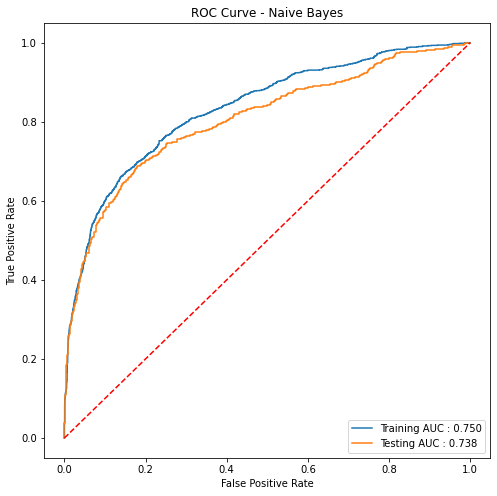

In [ ]:
# Plotting the ROC Curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
y_pred_prob_tr = NB_model.predict_proba(X_train)[:,1]
y_pred_prob_te = NB_model.predict_proba(X_test)[:,1]

fpr_tr, tpr_tr, thresholds_tr = roc_curve(y_train,y_pred_prob_tr)
fpr_te, tpr_te, thresholds_te = roc_curve(y_test,y_pred_prob_te)

fig,axes = plt.subplots(figsize=(8,8))
plt.plot(fpr_tr,tpr_tr,label = 'Training AUC : {:.3f}'.format(roc_auc_score(y_train,pred_train_NB_model)))
plt.plot(fpr_te,tpr_te,label = 'Testing AUC : {:.3f}'.format(roc_auc_score(y_test,pred_test_NB_model)))
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Naive Bayes')
plt.legend(loc="lower right")

In [ ]:
# Basic Logreg Model
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
grid_LR = {'solver':['newton-cg','lbfgs','sag','saga']}
model_LR = LogisticRegression(max_iter=10000,n_jobs=-1,penalty = 'none')
grid_search_LR = GridSearchCV(estimator = model_LR, param_grid = grid_LR, cv = 10,n_jobs=-1,scoring='accuracy',verbose=2)
grid_search_LR.fit(X_train, y_train.values.ravel())
LR_model = grid_search_LR.best_estimator_
grid_search_LR.best_params_

Fitting 10 folds for each of 4 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   54.9s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  1.0min finished


{'solver': 'newton-cg'}

In [ ]:
# Predictions and metrics(Train & Test)
import sklearn.metrics as metrics
pred_train_LR_model = LR_model.predict(X_train)
pred_test_LR_model = LR_model.predict(X_test)
print('Train Accuracy: {}'.format(LR_model.score(X_train,y_train)))
print('Test Accuracy: {}'.format(LR_model.score(X_test,y_test)))
print()
print('Classification Report Train')
print(metrics.classification_report(y_train, pred_train_LR_model))
print()
print('Classification Report Test')
print(metrics.classification_report(y_test, pred_test_LR_model))

Train Accuracy: 0.8892413093123572
Test Accuracy: 0.8904677323860273

Classification Report Train
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      6555
           1       0.76      0.50      0.60      1327

    accuracy                           0.89      7882
   macro avg       0.83      0.73      0.77      7882
weighted avg       0.88      0.89      0.88      7882


Classification Report Test
              precision    recall  f1-score   support

           0       0.90      0.97      0.94      2809
           1       0.78      0.49      0.60       569

    accuracy                           0.89      3378
   macro avg       0.84      0.73      0.77      3378
weighted avg       0.88      0.89      0.88      3378



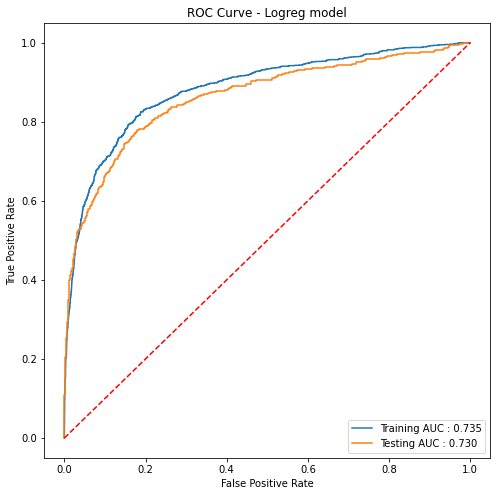

In [ ]:
# Plotting the ROC Curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
y_pred_prob_tr = LR_model.predict_proba(X_train)[:,1]
y_pred_prob_te = LR_model.predict_proba(X_test)[:,1]

fpr_tr, tpr_tr, thresholds_tr = roc_curve(y_train,y_pred_prob_tr)
fpr_te, tpr_te, thresholds_te = roc_curve(y_test,y_pred_prob_te)

fig,axes = plt.subplots(figsize=(8,8))
plt.plot(fpr_tr,tpr_tr,label = 'Training AUC : {:.3f}'.format(roc_auc_score(y_train,pred_train_LR_model)))
plt.plot(fpr_te,tpr_te,label = 'Testing AUC : {:.3f}'.format(roc_auc_score(y_test,pred_test_LR_model)))
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logreg model')
plt.legend(loc="lower right")

In [ ]:
# Decision Tree Model
from sklearn.tree import DecisionTreeClassifier
model_DT = DecisionTreeClassifier()
params_DT = {'criterion':['gini','entropy'],
         'max_depth':list(range(438,501)),
         'min_samples_split':list(range(101,201)),
         'min_samples_leaf':list(range(16,20)),
         'min_impurity_decrease':list(np.random.normal(0.00045,0.00048,500))}
grid_search_DT = RandomizedSearchCV(estimator = model_DT, param_distributions = params_DT, cv = 10,n_jobs=-1,verbose=2,random_state = 1)
grid_search_DT.fit(X_train,y_train)
DT_model = grid_search_DT.best_estimator_
grid_search_DT.best_params_

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    2.2s finished


{'criterion': 'entropy',
 'max_depth': 442,
 'min_impurity_decrease': 0.0004968138296463369,
 'min_samples_leaf': 18,
 'min_samples_split': 102}

In [ ]:
# Predictions and metrics(Train & Test)
import sklearn.metrics as metrics
pred_train_DT_model = DT_model.predict(X_train)
pred_test_DT_model = DT_model.predict(X_test)
print('Train Accuracy: {:.2f}'.format(DT_model.score(X_train,y_train)))
print('Test Accuracy: {:.2f}'.format(DT_model.score(X_test,y_test)))
print()
print('Classification Report Train')
print(metrics.classification_report(y_train, pred_train_DT_model))
print()
print('Classification Report Test')
print(metrics.classification_report(y_test, pred_test_DT_model))

Train Accuracy: 0.91
Test Accuracy: 0.89

Classification Report Train
              precision    recall  f1-score   support

           0       0.94      0.95      0.94      6555
           1       0.74      0.69      0.71      1327

    accuracy                           0.91      7882
   macro avg       0.84      0.82      0.83      7882
weighted avg       0.90      0.91      0.91      7882


Classification Report Test
              precision    recall  f1-score   support

           0       0.93      0.94      0.94      2809
           1       0.70      0.65      0.67       569

    accuracy                           0.89      3378
   macro avg       0.81      0.80      0.80      3378
weighted avg       0.89      0.89      0.89      3378



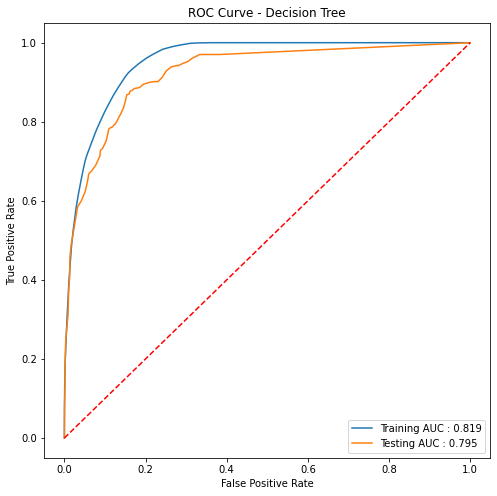

In [ ]:
# Plotting the ROC Curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
y_pred_prob_tr = DT_model.predict_proba(X_train)[:,1]
y_pred_prob_te = DT_model.predict_proba(X_test)[:,1]

fpr_tr, tpr_tr, thresholds_tr = roc_curve(y_train,y_pred_prob_tr)
fpr_te, tpr_te, thresholds_te = roc_curve(y_test,y_pred_prob_te)

fig,axes = plt.subplots(figsize=(8,8))
plt.plot(fpr_tr,tpr_tr,label = 'Training AUC : {:.3f}'.format(roc_auc_score(y_train,pred_train_DT_model)))
plt.plot(fpr_te,tpr_te,label = 'Testing AUC : {:.3f}'.format(roc_auc_score(y_test,pred_test_DT_model)))
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Decision Tree')
plt.legend(loc="lower right")

In [ ]:
# Random Forest Model
from sklearn.ensemble import RandomForestClassifier
model_RF = RandomForestClassifier(random_state=1)
params_RF = {'criterion':['gini','entropy'],
         'n_estimators':list(range(821,852,2)),
         'min_samples_leaf':list(range(1,5)),
         'max_features':list(range(1,5)),
         'max_samples':list(np.arange(0.7,1,0.05))}
grid_search_RF = RandomizedSearchCV(estimator = model_RF, param_distributions = params_RF, cv = 10,n_jobs=-1,verbose=2,random_state=1)
grid_search_RF.fit(X_train,y_train)
RF_model = grid_search_RF.best_estimator_
grid_search_RF.best_params_

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  6.3min finished


{'criterion': 'entropy',
 'max_features': 3,
 'max_samples': 0.8500000000000001,
 'min_samples_leaf': 1,
 'n_estimators': 851}

In [ ]:
# Predictions and metrics(Train & Test)
pred_train_RF_model = RF_model.predict(X_train)
pred_test_RF_model = RF_model.predict(X_test)
print('Train Accuracy: {:.2f}'.format(RF_model.score(X_train,y_train)))
print('Test Accuracy: {:.2f}'.format(RF_model.score(X_test,y_test)))
print()
print('Classification Report Train')
print(metrics.classification_report(y_train, pred_train_RF_model))
print()
print('Classification Report Test')
print(metrics.classification_report(y_test, pred_test_RF_model))

Train Accuracy: 1.00
Test Accuracy: 0.97

Classification Report Train
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6555
           1       1.00      1.00      1.00      1327

    accuracy                           1.00      7882
   macro avg       1.00      1.00      1.00      7882
weighted avg       1.00      1.00      1.00      7882


Classification Report Test
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      2809
           1       0.99      0.82      0.90       569

    accuracy                           0.97      3378
   macro avg       0.98      0.91      0.94      3378
weighted avg       0.97      0.97      0.97      3378



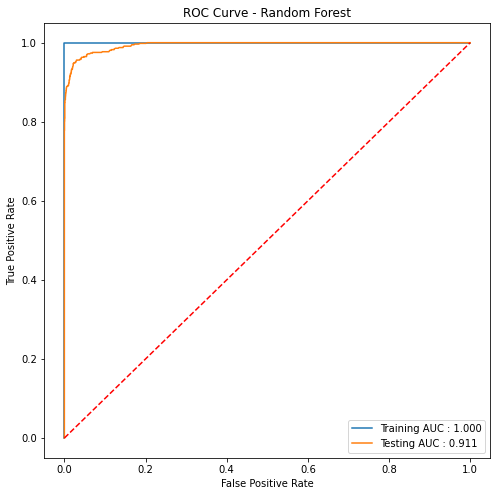

In [ ]:
# Plotting the ROC Curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
y_pred_prob_tr = RF_model.predict_proba(X_train)[:,1]
y_pred_prob_te = RF_model.predict_proba(X_test)[:,1]

fpr_tr, tpr_tr, thresholds_tr = roc_curve(y_train,y_pred_prob_tr)
fpr_te, tpr_te, thresholds_te = roc_curve(y_test,y_pred_prob_te)

fig,axes = plt.subplots(figsize=(8,8))
plt.plot(fpr_tr,tpr_tr,label = 'Training AUC : {:.3f}'.format(roc_auc_score(y_train,pred_train_RF_model)))
plt.plot(fpr_te,tpr_te,label = 'Testing AUC : {:.3f}'.format(roc_auc_score(y_test,pred_test_RF_model)))
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend(loc="lower right")

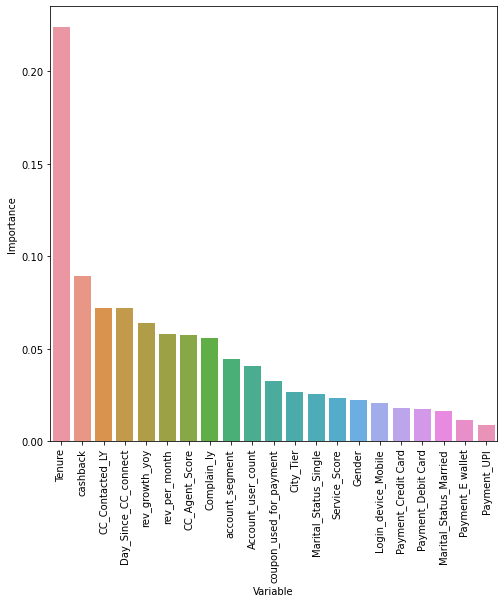

In [ ]:
# Random forest feature importances
importance = pd.DataFrame({'Variable':X_train.columns,'Importance':RF_model.feature_importances_})
importance = importance.sort_values(by = 'Importance',ascending=False)
fig,axes = plt.subplots(figsize=(8,8))
sns.barplot(x='Variable',y='Importance',data = importance,ci=0)
axes.set_xticklabels(importance['Variable'],rotation=90)
plt.show()

In [ ]:
# KNN model
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
std_scaler = StandardScaler()
model_KNN = KNeighborsClassifier()
pipeline_KNN = Pipeline(steps = [('std_scaler',std_scaler),
                            ('model_KNN',model_KNN)])
params_KNN = {'model_KNN__n_neighbors':list(range(3,21,2)),
         'model_KNN__weights':['uniform','distance'],
         'model_KNN__metric':['euclidean','chebyshev','manhattan']}
grid_search_KNN = GridSearchCV(pipeline_KNN,param_grid = params_KNN,cv=10,n_jobs=-1)
grid_search_KNN.fit(X_train,y_train)
KNN_model = grid_search_KNN.best_estimator_
grid_search_KNN.best_params_

{'model_KNN__metric': 'manhattan',
 'model_KNN__n_neighbors': 3,
 'model_KNN__weights': 'distance'}

In [ ]:
# Predictions and metrics(Train & Test)
pred_train_KNN_model = KNN_model.predict(X_train)
pred_test_KNN_model = KNN_model.predict(X_test)
print('Train Accuracy: {:.2f}'.format(KNN_model.score(X_train,y_train)))
print('Test Accuracy: {:.2f}'.format(KNN_model.score(X_test,y_test)))
print()
print('Classification Report Train')
print(metrics.classification_report(y_train, pred_train_KNN_model))
print()
print('Classification Report Test')
print(metrics.classification_report(y_test, pred_test_KNN_model))

Train Accuracy: 1.00
Test Accuracy: 0.98

Classification Report Train
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6555
           1       1.00      1.00      1.00      1327

    accuracy                           1.00      7882
   macro avg       1.00      1.00      1.00      7882
weighted avg       1.00      1.00      1.00      7882


Classification Report Test
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2809
           1       0.95      0.93      0.94       569

    accuracy                           0.98      3378
   macro avg       0.97      0.96      0.96      3378
weighted avg       0.98      0.98      0.98      3378



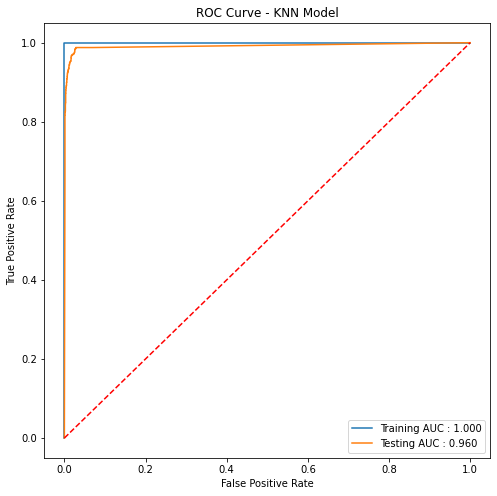

In [ ]:
# Plotting the ROC Curve
y_pred_prob_tr = KNN_model.predict_proba(X_train)[:,1]
y_pred_prob_te = KNN_model.predict_proba(X_test)[:,1]

fpr_tr, tpr_tr, thresholds_tr = roc_curve(y_train,y_pred_prob_tr)
fpr_te, tpr_te, thresholds_te = roc_curve(y_test,y_pred_prob_te)

fig,axes = plt.subplots(figsize=(8,8))
plt.plot(fpr_tr,tpr_tr,label = 'Training AUC : {:.3f}'.format(roc_auc_score(y_train,pred_train_KNN_model)))
plt.plot(fpr_te,tpr_te,label = 'Testing AUC : {:.3f}'.format(roc_auc_score(y_test,pred_test_KNN_model)))
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - KNN Model')
plt.legend(loc="lower right")

In [ ]:
# KNN with Minkowski
model_KNNM = KNeighborsClassifier(metric='minkowski')
pipeline_KNNM = Pipeline(steps = [('std_scaler',std_scaler),
                            ('model_KNNM',model_KNNM)])
params_KNNM = {'model_KNNM__n_neighbors':list(range(3,50,2)),
         'model_KNNM__weights':['uniform','distance'],
         'model_KNNM__p':list(np.arange(3,10,0.1))}
grid_search_KNNM = RandomizedSearchCV(pipeline_KNNM,param_distributions = params_KNNM,cv=3,n_jobs=-1,verbose=2,random_state=1234)
grid_search_KNNM.fit(X_train,y_train)
KNNM_model = grid_search_KNNM.best_estimator_
grid_search_KNNM.best_params_

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  5.2min finished


{'model_KNNM__n_neighbors': 5,
 'model_KNNM__p': 9.900000000000006,
 'model_KNNM__weights': 'distance'}

In [ ]:
# Predictions and metrics(Train & Test)
pred_train_KNNM_model = KNNM_model.predict(X_train)
pred_test_KNNM_model = KNNM_model.predict(X_test)
print('Train Accuracy: {:.2f}'.format(KNNM_model.score(X_train,y_train)))
print('Test Accuracy: {:.2f}'.format(KNNM_model.score(X_test,y_test)))
print()
print('Classification Report Train')
print(metrics.classification_report(y_train, pred_train_KNNM_model))
print()
print('Classification Report Test')
print(metrics.classification_report(y_test, pred_test_KNNM_model))

Train Accuracy: 1.00
Test Accuracy: 0.94

Classification Report Train
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6555
           1       1.00      1.00      1.00      1327

    accuracy                           1.00      7882
   macro avg       1.00      1.00      1.00      7882
weighted avg       1.00      1.00      1.00      7882


Classification Report Test
              precision    recall  f1-score   support

           0       0.95      0.98      0.97      2809
           1       0.88      0.77      0.82       569

    accuracy                           0.94      3378
   macro avg       0.92      0.88      0.89      3378
weighted avg       0.94      0.94      0.94      3378



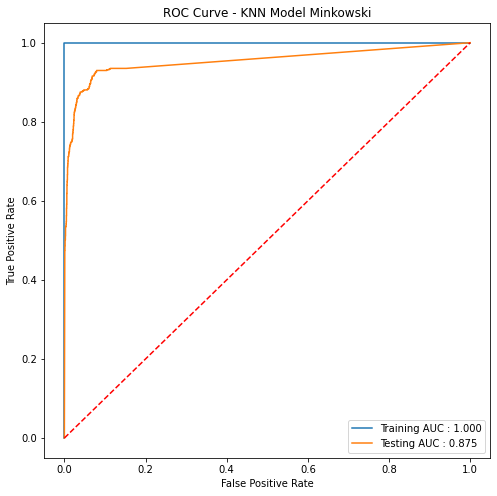

In [ ]:
# Plotting the ROC Curve
y_pred_prob_tr = KNNM_model.predict_proba(X_train)[:,1]
y_pred_prob_te = KNNM_model.predict_proba(X_test)[:,1]

fpr_tr, tpr_tr, thresholds_tr = roc_curve(y_train,y_pred_prob_tr)
fpr_te, tpr_te, thresholds_te = roc_curve(y_test,y_pred_prob_te)

fig,axes = plt.subplots(figsize=(8,8))
plt.plot(fpr_tr,tpr_tr,label = 'Training AUC : {:.3f}'.format(roc_auc_score(y_train,pred_train_KNNM_model)))
plt.plot(fpr_te,tpr_te,label = 'Testing AUC : {:.3f}'.format(roc_auc_score(y_test,pred_test_KNNM_model)))
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - KNN Model Minkowski')
plt.legend(loc="lower right")

In [ ]:
# Linear Discriminant analysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
model_LDA= LinearDiscriminantAnalysis()
params_LDA = {'solver':['svd','eigen','lsqr']}
grid_search_LDA = GridSearchCV(estimator = model_LDA, param_grid = params_LDA, cv = 3,n_jobs=-1,verbose=2)
grid_search_LDA.fit(X_train, y_train)
LDA_model = grid_search_LDA.best_estimator_
grid_search_LDA.best_params_

Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   9 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:    0.2s finished


{'solver': 'svd'}

In [ ]:
#Predictions and metrics(Train & Test)
pred_train_LDA_model = LDA_model.predict(X_train)
pred_test_LDA_model = LDA_model.predict(X_test)
print('Train Accuracy: {:.2f}'.format(LDA_model.score(X_train,y_train)))
print('Test Accuracy: {:.2f}'.format(LDA_model.score(X_test,y_test)))
print()
print('Classification Report Train')
print(metrics.classification_report(y_train, pred_train_LDA_model))
print()
print('Classification Report Test')
print(metrics.classification_report(y_test, pred_test_LDA_model))

Train Accuracy: 0.89
Test Accuracy: 0.88

Classification Report Train
              precision    recall  f1-score   support

           0       0.90      0.97      0.93      6555
           1       0.77      0.46      0.57      1327

    accuracy                           0.89      7882
   macro avg       0.83      0.71      0.75      7882
weighted avg       0.88      0.89      0.87      7882


Classification Report Test
              precision    recall  f1-score   support

           0       0.89      0.98      0.93      2809
           1       0.78      0.43      0.56       569

    accuracy                           0.88      3378
   macro avg       0.84      0.70      0.75      3378
weighted avg       0.88      0.88      0.87      3378



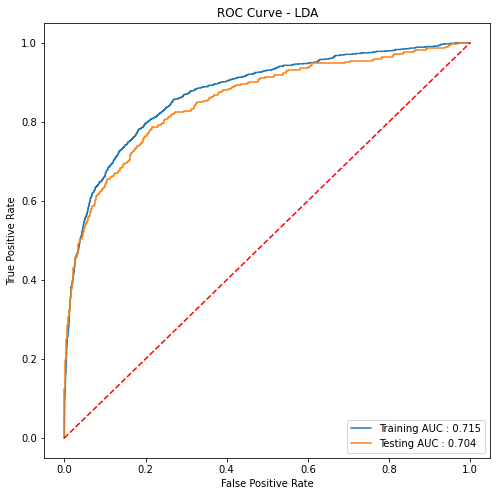

In [ ]:
# Plotting the ROC Curve
y_pred_prob_tr = LDA_model.predict_proba(X_train)[:,1]
y_pred_prob_te = LDA_model.predict_proba(X_test)[:,1]

fpr_tr, tpr_tr, thresholds_tr = roc_curve(y_train,y_pred_prob_tr)
fpr_te, tpr_te, thresholds_te = roc_curve(y_test,y_pred_prob_te)

fig,axes = plt.subplots(figsize=(8,8))
plt.plot(fpr_tr,tpr_tr,label = 'Training AUC : {:.3f}'.format(roc_auc_score(y_train,pred_train_LDA_model)))
plt.plot(fpr_te,tpr_te,label = 'Testing AUC : {:.3f}'.format(roc_auc_score(y_test,pred_test_LDA_model)))
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - LDA')
plt.legend(loc="lower right")

In [ ]:
# Adaptive Boosting
from sklearn.ensemble import AdaBoostClassifier
model_ADA = AdaBoostClassifier(random_state=1234)
params_ADA = {'n_estimators':list(np.arange(441,502,2)),
             'learning_rate':list(np.arange(0.11,0.2,0.000001))}
grid_search_ADA = RandomizedSearchCV(estimator = model_ADA, param_distributions = params_ADA, cv = 10,n_jobs=-1,verbose=2,random_state=1234)
grid_search_ADA.fit(X_train,y_train)
ADA_model = grid_search_ADA.best_estimator_
grid_search_ADA.best_params_

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  4.8min finished


{'learning_rate': 0.11532700000000533, 'n_estimators': 483}

In [ ]:
#Predictions and metrics(Train & Test)
pred_train_ADA_model = ADA_model.predict(X_train)
pred_test_ADA_model = ADA_model.predict(X_test)
print('Train Accuracy: {:.2f}'.format(ADA_model.score(X_train,y_train)))
print('Test Accuracy: {:.2f}'.format(ADA_model.score(X_test,y_test)))
print()
print('Classification Report Train')
print(metrics.classification_report(y_train, pred_train_ADA_model))
print()
print('Classification Report Test')
print(metrics.classification_report(y_test, pred_test_ADA_model))

Train Accuracy: 0.90
Test Accuracy: 0.90

Classification Report Train
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      6555
           1       0.76      0.57      0.65      1327

    accuracy                           0.90      7882
   macro avg       0.84      0.77      0.80      7882
weighted avg       0.89      0.90      0.89      7882


Classification Report Test
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      2809
           1       0.78      0.57      0.66       569

    accuracy                           0.90      3378
   macro avg       0.85      0.77      0.80      3378
weighted avg       0.89      0.90      0.89      3378



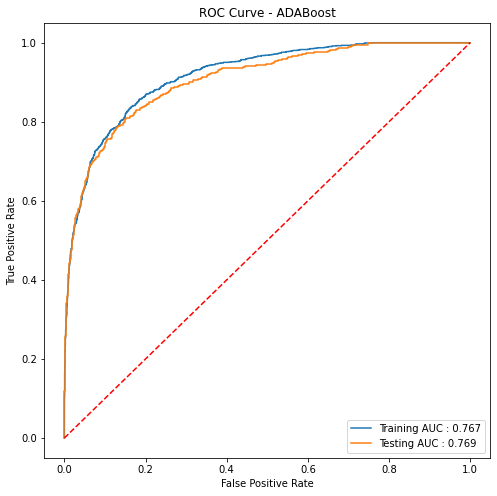

In [ ]:
# Plotting the ROC Curve
y_pred_prob_tr = ADA_model.predict_proba(X_train)[:,1]
y_pred_prob_te = ADA_model.predict_proba(X_test)[:,1]

fpr_tr, tpr_tr, thresholds_tr = roc_curve(y_train,y_pred_prob_tr)
fpr_te, tpr_te, thresholds_te = roc_curve(y_test,y_pred_prob_te)

fig,axes = plt.subplots(figsize=(8,8))
plt.plot(fpr_tr,tpr_tr,label = 'Training AUC : {:.3f}'.format(roc_auc_score(y_train,pred_train_ADA_model)))
plt.plot(fpr_te,tpr_te,label = 'Testing AUC : {:.3f}'.format(roc_auc_score(y_test,pred_test_ADA_model)))
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - ADABoost')
plt.legend(loc="lower right")

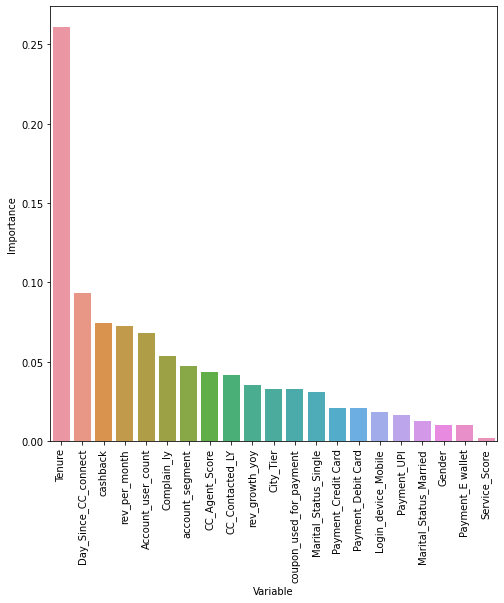

In [ ]:
# Adaptive Boosting feature importances
importance = pd.DataFrame({'Variable':X_train.columns,'Importance':ADA_model.feature_importances_})
importance = importance.sort_values(by = 'Importance',ascending=False)
fig,axes = plt.subplots(figsize=(8,8))
sns.barplot(x='Variable',y='Importance',data = importance,ci=0)
axes.set_xticklabels(importance['Variable'],rotation=90)
plt.show()

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
model_XGB = GradientBoostingClassifier(random_state=1234)
params_XGB = {'learning_rate':list(np.arange(0.01,0.02,0.0000001)),
             'n_estimators':list(np.arange(121,140,2)),
             'subsample':list(np.arange(.21,.25,0.01)),
             'min_samples_split':list(np.arange(4,10)),
             'min_samples_leaf':list(np.arange(1,10))}
grid_search_XGB = RandomizedSearchCV(estimator = model_XGB, param_distributions = params_XGB, cv = 10,n_jobs=-1,verbose=2,random_state=1)
grid_search_XGB.fit(X_train,y_train)
XGB_model=grid_search_XGB.best_estimator_
grid_search_XGB.best_params_

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   19.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   50.4s finished


{'learning_rate': 0.019155799999945627,
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 133,
 'subsample': 0.25}

In [ ]:
#Predictions and metrics(Train & Test)
pred_train_XGB_model = XGB_model.predict(X_train)
pred_test_XGB_model = XGB_model.predict(X_test)
print('Train Accuracy: {:.2f}'.format(XGB_model.score(X_train,y_train)))
print('Test Accuracy: {:.2f}'.format(XGB_model.score(X_test,y_test)))
print()
print('Classification Report Train')
print(metrics.classification_report(y_train, pred_train_XGB_model))
print()
print('Classification Report Test')
print(metrics.classification_report(y_test, pred_test_XGB_model))

Train Accuracy: 0.90
Test Accuracy: 0.90

Classification Report Train
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      6555
           1       0.81      0.52      0.63      1327

    accuracy                           0.90      7882
   macro avg       0.86      0.75      0.79      7882
weighted avg       0.89      0.90      0.89      7882


Classification Report Test
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      2809
           1       0.81      0.50      0.62       569

    accuracy                           0.90      3378
   macro avg       0.86      0.74      0.78      3378
weighted avg       0.89      0.90      0.89      3378



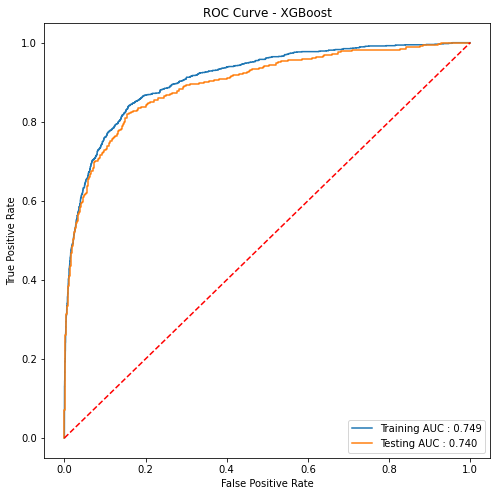

In [ ]:
# Plotting the ROC Curve
y_pred_prob_tr = XGB_model.predict_proba(X_train)[:,1]
y_pred_prob_te = XGB_model.predict_proba(X_test)[:,1]

fpr_tr, tpr_tr, thresholds_tr = roc_curve(y_train,y_pred_prob_tr)
fpr_te, tpr_te, thresholds_te = roc_curve(y_test,y_pred_prob_te)

fig,axes = plt.subplots(figsize=(8,8))
plt.plot(fpr_tr,tpr_tr,label = 'Training AUC : {:.3f}'.format(roc_auc_score(y_train,pred_train_XGB_model)))
plt.plot(fpr_te,tpr_te,label = 'Testing AUC : {:.3f}'.format(roc_auc_score(y_test,pred_test_XGB_model)))
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - XGBoost')
plt.legend(loc="lower right")

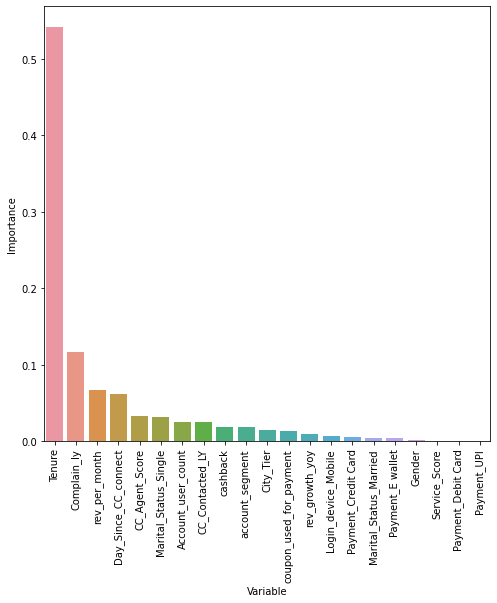

In [ ]:
# XG Boosting feature importances
importance = pd.DataFrame({'Variable':X_train.columns,'Importance':XGB_model.feature_importances_})
importance = importance.sort_values(by = 'Importance',ascending=False)
fig,axes = plt.subplots(figsize=(8,8))
sns.barplot(x='Variable',y='Importance',data = importance,ci=0)
axes.set_xticklabels(importance['Variable'],rotation=90)
plt.show()

In [ ]:
from sklearn.svm import SVC
model_SVC = SVC(probability=True)
pipeline_SVC = Pipeline(steps = [('std_scaler',std_scaler),
                            ('model_SVC',model_SVC)])
params_SVC = {'model_SVC__kernel':['linear','rbf','sigmoid'],
             'model_SVC__C':list(np.arange(1,1.2,0.00001))}
grid_search_SVC = RandomizedSearchCV(pipeline_SVC,param_distributions = params_SVC,cv=3,n_jobs=-1,verbose=2,random_state=1234)
grid_search_SVC.fit(X_train,y_train)
SVC_model = grid_search_SVC.best_estimator_
grid_search_SVC.best_params_

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.4min finished


{'model_SVC__C': 1.1374600000009005, 'model_SVC__kernel': 'rbf'}

In [ ]:
#Predictions and metrics(Train & Test)
pred_train_SVC_model = SVC_model.predict(X_train)
pred_test_SVC_model = SVC_model.predict(X_test)
print('Train Accuracy: {:.2f}'.format(SVC_model.score(X_train,y_train)))
print('Test Accuracy: {:.2f}'.format(SVC_model.score(X_test,y_test)))
print()
print('Classification Report Train')
print(metrics.classification_report(y_train, pred_train_SVC_model))
print()
print('Classification Report Test')
print(metrics.classification_report(y_test, pred_test_SVC_model))

Train Accuracy: 0.95
Test Accuracy: 0.93

Classification Report Train
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      6555
           1       0.95      0.73      0.83      1327

    accuracy                           0.95      7882
   macro avg       0.95      0.86      0.90      7882
weighted avg       0.95      0.95      0.95      7882


Classification Report Test
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      2809
           1       0.94      0.64      0.76       569

    accuracy                           0.93      3378
   macro avg       0.93      0.81      0.86      3378
weighted avg       0.93      0.93      0.93      3378



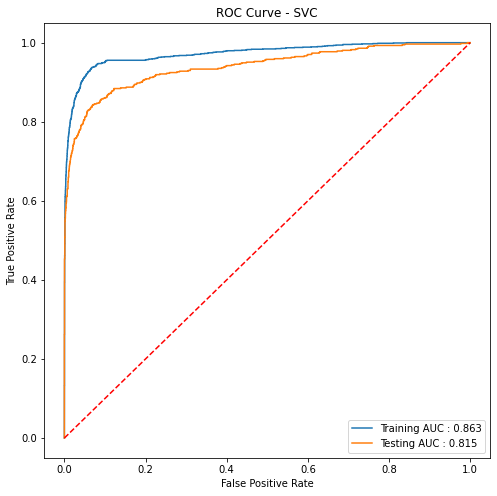

In [ ]:
# Plotting the ROC Curve
y_pred_prob_tr = SVC_model.predict_proba(X_train)[:,1]
y_pred_prob_te = SVC_model.predict_proba(X_test)[:,1]

fpr_tr, tpr_tr, thresholds_tr = roc_curve(y_train,y_pred_prob_tr)
fpr_te, tpr_te, thresholds_te = roc_curve(y_test,y_pred_prob_te)

fig,axes = plt.subplots(figsize=(8,8))
plt.plot(fpr_tr,tpr_tr,label = 'Training AUC : {:.3f}'.format(roc_auc_score(y_train,pred_train_SVC_model)))
plt.plot(fpr_te,tpr_te,label = 'Testing AUC : {:.3f}'.format(roc_auc_score(y_test,pred_test_SVC_model)))
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - SVC')
plt.legend(loc="lower right")

In [ ]:
from sklearn.ensemble import VotingClassifier
estim_list = [('DT_model',DT_model),('RF_model',RF_model),('KNN_model',KNN_model),('KNNM_model',KNNM_model),('ADA_model',ADA_model),('XGB_model',XGB_model),('SVC_model',SVC_model)]
VOTW_model = VotingClassifier(estimators = estim_list,voting = 'soft',weights = [16,16,16,15,11,12,14])
VOTW_model.fit(X_train,y_train)

VotingClassifier(estimators=[('DT_model',
                              DecisionTreeClassifier(ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='entropy',
                                                     max_depth=442,
                                                     max_features=None,
                                                     max_leaf_nodes=None,
                                                     min_impurity_decrease=0.0004968138296463369,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=18,
                                                     min_samples_split=102,
                                                     min_weight_fraction_leaf=0.0,
                                                     presort='deprecated',
                                              

In [ ]:
#Predictions and metrics(Train & Test)
pred_train_VOTW_model = VOTW_model.predict(X_train)
pred_test_VOTW_model = VOTW_model.predict(X_test)
print('Train Accuracy: {:.2f}'.format(VOTW_model.score(X_train,y_train)))
print('Test Accuracy: {:.2f}'.format(VOTW_model.score(X_test,y_test)))
print()
print('Classification Report Train')
print(metrics.classification_report(y_train, pred_train_VOTW_model))
print()
print('Classification Report Test')
print(metrics.classification_report(y_test, pred_test_VOTW_model))

Train Accuracy: 1.00
Test Accuracy: 0.96

Classification Report Train
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6555
           1       1.00      0.99      0.99      1327

    accuracy                           1.00      7882
   macro avg       1.00      0.99      1.00      7882
weighted avg       1.00      1.00      1.00      7882


Classification Report Test
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      2809
           1       0.98      0.79      0.88       569

    accuracy                           0.96      3378
   macro avg       0.97      0.90      0.93      3378
weighted avg       0.96      0.96      0.96      3378



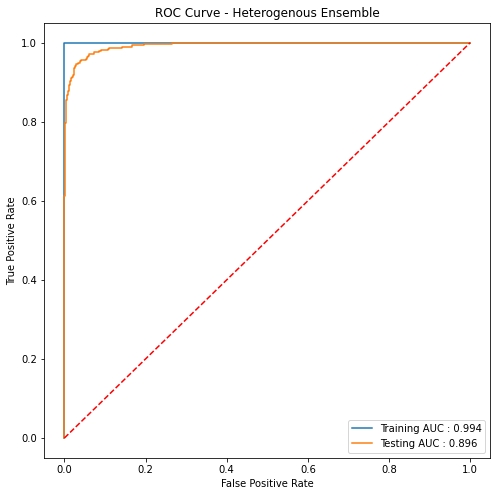

In [ ]:
# Plotting the ROC Curve
y_pred_prob_tr = VOTW_model.predict_proba(X_train)[:,1]
y_pred_prob_te = VOTW_model.predict_proba(X_test)[:,1]

fpr_tr, tpr_tr, thresholds_tr = roc_curve(y_train,y_pred_prob_tr)
fpr_te, tpr_te, thresholds_te = roc_curve(y_test,y_pred_prob_te)

fig,axes = plt.subplots(figsize=(8,8))
plt.plot(fpr_tr,tpr_tr,label = 'Training AUC : {:.3f}'.format(roc_auc_score(y_train,pred_train_VOTW_model)))
plt.plot(fpr_te,tpr_te,label = 'Testing AUC : {:.3f}'.format(roc_auc_score(y_test,pred_test_VOTW_model)))
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Heterogenous Ensemble')
plt.legend(loc="lower right")

In [ ]:
from sklearn.ensemble import StackingClassifier
stacker = LogisticRegression()
STA_model = StackingClassifier(estimators=estim_list,final_estimator = stacker,n_jobs=-1)
STA_model.fit(X_train,y_train)

StackingClassifier(cv=None,
                   estimators=[('DT_model',
                                DecisionTreeClassifier(ccp_alpha=0.0,
                                                       class_weight=None,
                                                       criterion='entropy',
                                                       max_depth=442,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0004968138296463369,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=18,
                                                       min_samples_split=102,
                                                       min_weight_fraction_leaf=0.0,
                                                       presort='depre

In [ ]:
#Predictions and metrics(Train & Test)
pred_train_STA_model = STA_model.predict(X_train)
pred_test_STA_model = STA_model.predict(X_test)
print('Train Accuracy: {:.2f}'.format(STA_model.score(X_train,y_train)))
print('Test Accuracy: {:.2f}'.format(STA_model.score(X_test,y_test)))
print()
print('Classification Report Train')
print(metrics.classification_report(y_train, pred_train_STA_model))
print()
print('Classification Report Test')
print(metrics.classification_report(y_test, pred_test_STA_model))

Train Accuracy: 1.00
Test Accuracy: 0.99

Classification Report Train
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6555
           1       1.00      1.00      1.00      1327

    accuracy                           1.00      7882
   macro avg       1.00      1.00      1.00      7882
weighted avg       1.00      1.00      1.00      7882


Classification Report Test
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2809
           1       0.98      0.94      0.96       569

    accuracy                           0.99      3378
   macro avg       0.98      0.97      0.98      3378
weighted avg       0.99      0.99      0.99      3378



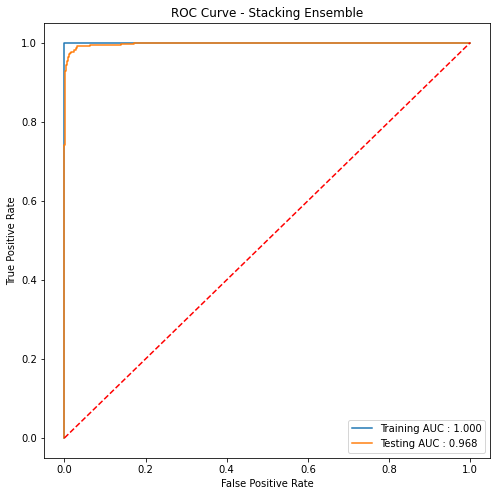

In [ ]:
# Plotting the ROC Curve
y_pred_prob_tr = STA_model.predict_proba(X_train)[:,1]
y_pred_prob_te = STA_model.predict_proba(X_test)[:,1]

fpr_tr, tpr_tr, thresholds_tr = roc_curve(y_train,y_pred_prob_tr)
fpr_te, tpr_te, thresholds_te = roc_curve(y_test,y_pred_prob_te)

fig,axes = plt.subplots(figsize=(8,8))
plt.plot(fpr_tr,tpr_tr,label = 'Training AUC : {:.3f}'.format(roc_auc_score(y_train,pred_train_STA_model)))
plt.plot(fpr_te,tpr_te,label = 'Testing AUC : {:.3f}'.format(roc_auc_score(y_test,pred_test_STA_model)))
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Stacking Ensemble')
plt.legend(loc="lower right")

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
mod = ['NB','LogReg','Dtree','RF','KNN','KNNM','LDA','ADAB','XGB','SVC','HetEns','Stack']
acc=[]
pre=[]
rec=[]
f1=[]
test_pred = [pred_test_NB_model,pred_test_LR_model,pred_test_DT_model,
             pred_test_RF_model,pred_test_KNN_model,pred_test_KNNM_model,
             pred_test_LDA_model,pred_test_ADA_model,pred_test_XGB_model,
             pred_test_SVC_model,pred_test_VOTW_model,pred_test_STA_model]
for i in test_pred:
    acc.append(accuracy_score(y_test,i))
    pre.append(precision_score(y_test,i,zero_division=0))
    rec.append(recall_score(y_test,i))
    f1.append(f1_score(y_test,i))

metric_df_test = pd.DataFrame({'Model':mod,'Accuracy':acc,'Precision':pre,'Recall':rec,'F1_Score':f1})
metric_df_test

Model  Accuracy  Precision    Recall  F1_Score
0       NB  0.845471   0.538715  0.574692  0.556122
1   LogReg  0.890468   0.780282  0.486819  0.599567
2    Dtree  0.893428   0.698292  0.646749  0.671533
3       RF  0.969213   0.993631  0.822496  0.900000
4      KNN  0.980462   0.953153  0.929701  0.941281
5     KNNM  0.944050   0.881526  0.771529  0.822868
6      LDA  0.884251   0.783439  0.432337  0.557191
7     ADAB  0.900533   0.780723  0.569420  0.658537
8      XGB  0.896980   0.814815  0.502636  0.621739
9      SVC  0.931616   0.935567  0.637961  0.758621
10  HetEns  0.963292   0.984749  0.794376  0.879377
11   Stack  0.986382   0.978062  0.940246  0.958781

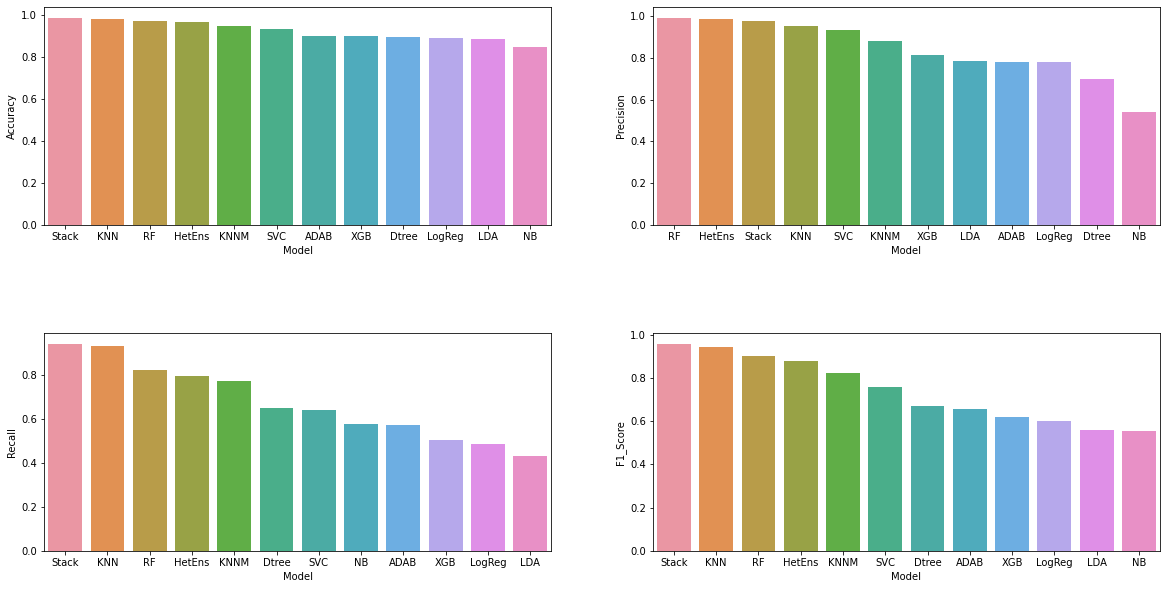

In [ ]:
# Visualizing the model performance
fig,axes = plt.subplots(2,2,figsize=(20,10))
plt.subplots_adjust(hspace=0.5)
cols = list(metric_df_test.columns)[1:]
for i,j in zip(cols,axes.flatten()):
    sns.barplot(x='Model',y=i,data=metric_df_test.sort_values(by = i,ascending=False),ax=j)

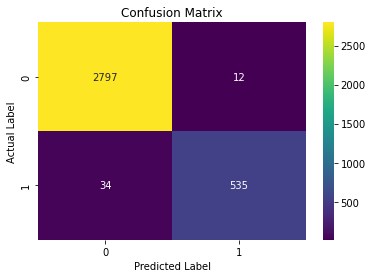

In [ ]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test,pred_test_STA_model),annot=True,fmt='d',cmap='viridis')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
PP_test_STA_model = STA_model.predict_proba(X_test)[:,1]
cut_off = list(np.arange(0,1,0.005))
acc = []
pre = []
rec = []
for i in cut_off:
    pred = np.where(PP_test_STA_model>i,1,0)
    acc.append(accuracy_score(y_test,pred))
    pre.append(precision_score(y_test,pred,zero_division = 0))
    rec.append(recall_score(y_test,pred,zero_division =0))
cut_off_analysis = pd.DataFrame({'Cut_off':cut_off,'Accuracy':acc,'Precision':pre,'Recall':rec})

Text(0.5, 1.0, 'Cut-off Analysis')

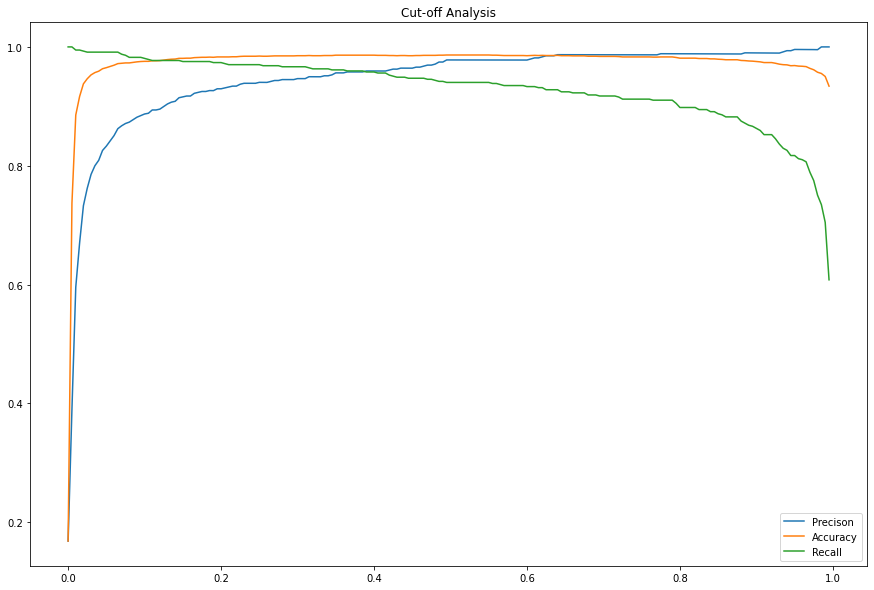

In [ ]:
fig,axes = plt.subplots(figsize = (15,10))
plt.plot(cut_off,cut_off_analysis['Precision'],label='Precison')
plt.plot(cut_off,cut_off_analysis['Accuracy'],label='Accuracy')
plt.plot(cut_off,cut_off_analysis['Recall'],label='Recall')
plt.legend()
plt.title('Cut-off Analysis')

### Findings and Thoughts

1. Tenure is the most important feature, increasing tenure will have a decrease in churn  rate. For this focus should be on customers.

2. Increasing the customer service score to 4 or 5 will decrease the churn rate.

3. Account user count i.e., number of customers associated to a single account is mostly 4 but goes up to 6 and this needs to be reduced in or der to have less churn rate.

4. Increasing the Customer Care agent Score decrease the churn rate.

5. Coupons does not seem to have any major impact on churners but increasing them will marginally decrease the churn rate.

6. Debit Card is the most widely used mode of payment, but this need to be changed and offers should be made on other payment methods to decrease churn rate.

7. Customers are having complaints registered, this needs to be looked upon and brought down to zero complaints.

8. Focus should be on Male Customers and customers with married and single status to have more revenue per month.